In [1]:
DATASET="rec.mu2e.CRV_wideband_cosmics.CRVWB-000-008-000.root"

In [2]:
import time
import os
import numpy as np
import gc
from mu2etools import *
from mu2etools import wideband
import math
from scipy.optimize import curve_fit
import hist
from hist import Hist

hep.style.use('ATLAS')

In [3]:
runs = [2070]
processor = wideband.DataProcessor(treename='run', runlist=runs, userunlist=True, remove=False,fixtimes=True)
filelist = processor.getFilelist(DATASET, root_schema=True)
filelist = ["{}{}".format(i, ":run") for i in filelist]

In [4]:
def Gaussian(x, A, B, C):
    return A*np.exp(-(x-B)**2/(2*C**2))

Filter for air showers to understand time offset on both ends

In [5]:
varlist = ['PEs','time','fitStatus','LEtime',
           'subrunNumber','spillNumber','eventNumber']

ht1 = Hist(hist.axis.Regular(bins=200, start=-100, stop=100, name="time difference"))
ht2 = Hist(hist.axis.Regular(bins=200, start=-100, stop=100, name="time difference"))
ht3 = Hist(hist.axis.Regular(bins=200, start=-100, stop=100, name="time difference"))
ht4 = Hist(hist.axis.Regular(bins=200, start=-100, stop=100, name="time difference"))
ht5 = Hist(hist.axis.Regular(bins=200, start=-100, stop=100, name="time difference"))
ht6 = Hist(hist.axis.Regular(bins=200, start=-100, stop=100, name="time difference"))
ht7 = Hist(hist.axis.Regular(bins=200, start=-100, stop=100, name="time difference"))
ht8 = Hist(hist.axis.Regular(bins=200, start=-100, stop=100, name="time difference"))

for idx, filename in enumerate(filelist):
    print(filename)
    try:
        with uproot.open(filename) as file:
            for ar in file.iterate(step_size="10MB", 
                                   filter_name=varlist, 
                                   report=False, library='ak'):
                ar['PEs'] = ak.where(ar['PEs'] >= 20, ar['PEs'], 0) # much more strict cut
                ar['hits'] = ak.where(ar['PEs'] > 0, 1, 0)
                ar = ar[(ak.sum(ar['hits'][:,0,0:64], axis=-1) == 64)]# & (ak.sum(ar['hits'][:,4,0:64], axis=-1) == 64)]
                FEB = 0
                for chan in range(64):
                    FitStatusCut = (ar['fitStatus'][:,FEB,chan] == 1) & (ar['fitStatus'][:,FEB+4,chan] == 1)
                    ar_chan = ar[FitStatusCut]
                    ar_chan['timediff'] = (ar_chan['time'][:,FEB+4,chan] - ar_chan['time'][:,FEB,chan])
                    
                    if chan >= 0 and chan < 8:
                        ht1.fill(ar_chan['timediff'])
                    if chan >= 8 and chan < 16:
                        ht2.fill(ar_chan['timediff'])
                    if chan >= 16 and chan < 24:
                        ht3.fill(ar_chan['timediff'])
                    if chan >= 24 and chan < 32:
                        ht4.fill(ar_chan['timediff'])
                    if chan >= 32 and chan < 40:
                        ht5.fill(ar_chan['timediff'])
                    if chan >= 40 and chan < 48:
                        ht6.fill(ar_chan['timediff'])
                    if chan >= 48 and chan < 56:
                        ht7.fill(ar_chan['timediff'])
                    if chan >= 56 and chan < 64:
                        ht8.fill(ar_chan['timediff'])
    except:
        continue

root://fndcadoor.fnal.gov:1094/mu2e/tape/phy-rec/rec/mu2e/CRV_wideband_cosmics/CRVWB-000-008-000/root/8e/6d/rec.mu2e.CRV_wideband_cosmics.CRVWB-000-008-000.002070_000.root:run
root://fndcadoor.fnal.gov:1094/mu2e/tape/phy-rec/rec/mu2e/CRV_wideband_cosmics/CRVWB-000-008-000/root/7c/4f/rec.mu2e.CRV_wideband_cosmics.CRVWB-000-008-000.002070_001.root:run
root://fndcadoor.fnal.gov:1094/mu2e/tape/phy-rec/rec/mu2e/CRV_wideband_cosmics/CRVWB-000-008-000/root/1e/da/rec.mu2e.CRV_wideband_cosmics.CRVWB-000-008-000.002070_002.root:run
root://fndcadoor.fnal.gov:1094/mu2e/tape/phy-rec/rec/mu2e/CRV_wideband_cosmics/CRVWB-000-008-000/root/bc/ec/rec.mu2e.CRV_wideband_cosmics.CRVWB-000-008-000.002070_003.root:run
root://fndcadoor.fnal.gov:1094/mu2e/tape/phy-rec/rec/mu2e/CRV_wideband_cosmics/CRVWB-000-008-000/root/6d/35/rec.mu2e.CRV_wideband_cosmics.CRVWB-000-008-000.002070_004.root:run


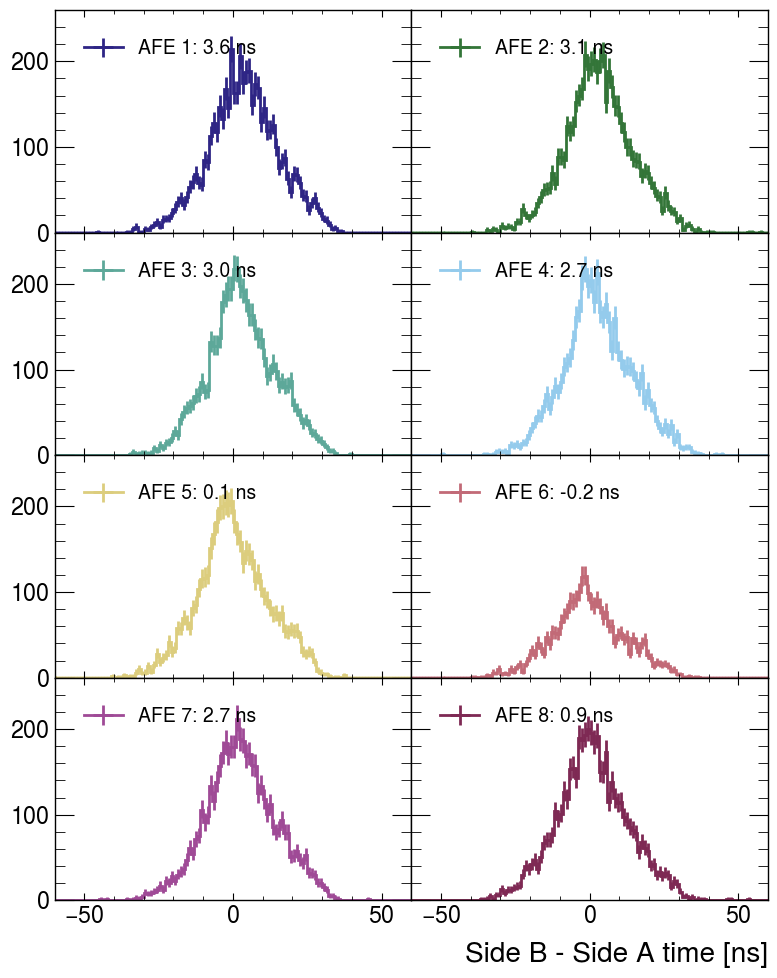

In [8]:
fig, ax = plt.subplots(4,2,sharex=True, sharey=True)

pars, cov = curve_fit(Gaussian, ht1.axes[0].centers, ht1.values(), p0 = [100, 0, 10])
fitB = pars[1]
fitB = 0
for i in range(len(ht1.axes[0].centers)):
    fitB += ht1.axes[0].centers[i]*ht1.values()[i]
fitB = fitB/ht1.sum()
ht1.plot1d(linewidth=2.0,ax=ax[0,0], color='#2E2585', label='AFE 1: {0} ns'.format(round(fitB, 1)))
pars, cov = curve_fit(Gaussian, ht1.axes[0].centers, ht2.values(), p0 = [100, 0, 10])
fitB = pars[1]
fitB = 0
for i in range(len(ht1.axes[0].centers)):
    fitB += ht1.axes[0].centers[i]*ht2.values()[i]
fitB = fitB/ht1.sum()
ht2.plot1d(linewidth=2.0,ax=ax[0,1], color='#337538', label='AFE 2: {0} ns'.format(round(fitB, 1)))
pars, cov = curve_fit(Gaussian, ht1.axes[0].centers, ht3.values(), p0 = [100, 0, 10])
fitB = pars[1]
fitB = 0
for i in range(len(ht1.axes[0].centers)):
    fitB += ht1.axes[0].centers[i]*ht3.values()[i]
fitB = fitB/ht1.sum()
ht3.plot1d(linewidth=2.0,ax=ax[1,0], color='#5DA899', label='AFE 3: {0} ns'.format(round(fitB, 1)))
pars, cov = curve_fit(Gaussian, ht1.axes[0].centers, ht4.values(), p0 = [100, 0, 10])
fitB = pars[1]
fitB = 0
for i in range(len(ht1.axes[0].centers)):
    fitB += ht1.axes[0].centers[i]*ht4.values()[i]
fitB = fitB/ht1.sum()
ht4.plot1d(linewidth=2.0,ax=ax[1,1], color='#94CBEC', label='AFE 4: {0} ns'.format(round(fitB, 1)))
pars, cov = curve_fit(Gaussian, ht1.axes[0].centers, ht5.values(), p0 = [100, 0, 10])
fitB = pars[1]
fitB = 0
for i in range(len(ht1.axes[0].centers)):
    fitB += ht1.axes[0].centers[i]*ht5.values()[i]
fitB = fitB/ht1.sum()
ht5.plot1d(linewidth=2.0,ax=ax[2,0], color='#DCCD7D', label='AFE 5: {0} ns'.format(round(fitB, 1)))
pars, cov = curve_fit(Gaussian, ht1.axes[0].centers, ht6.values(), p0 = [100, 0, 10])
fitB = pars[1]
fitB = 0
for i in range(len(ht1.axes[0].centers)):
    fitB += ht1.axes[0].centers[i]*ht6.values()[i]
fitB = fitB/ht1.sum()
ht6.plot1d(linewidth=2.0,ax=ax[2,1], color='#C26A77', label='AFE 6: {0} ns'.format(round(fitB, 1)))
pars, cov = curve_fit(Gaussian, ht1.axes[0].centers, ht7.values(), p0 = [100, 0, 10])
fitB = pars[1]
fitB = 0
for i in range(len(ht1.axes[0].centers)):
    fitB += ht1.axes[0].centers[i]*ht7.values()[i]
fitB = fitB/ht1.sum()
ht7.plot1d(linewidth=2.0,ax=ax[3,0], color='#9F4A96', label='AFE 7: {0} ns'.format(round(fitB, 1)))
pars, cov = curve_fit(Gaussian, ht1.axes[0].centers, ht8.values(), p0 = [100, 0, 10])
fitB = pars[1]
fitB = 0
for i in range(len(ht1.axes[0].centers)):
    fitB += ht1.axes[0].centers[i]*ht8.values()[i]
fitB = fitB/ht1.sum()
ht8.plot1d(linewidth=2.0,ax=ax[3,1], color='#7E2954', label='AFE 8: {0} ns'.format(round(fitB, 1)))
#ax.set_xlabel('Time difference')

ax[0,0].set_xlim(-60,60)
ax[0,0].set_ylim(0,260)

for i in range(len(ax)):
    for j in range(len(ax[i])):
        ax[i,j].legend(loc='upper left')

ax[3,0].set_xlabel(' ')
ax[3,1].set_xlabel('Side B - Side A time [ns]')

fig.set_figheight(10)
fig.set_figwidth(8)

fig.tight_layout()
fig.subplots_adjust(hspace=0, wspace=0)
fig.savefig('/exp/mu2e/data/users/thoroho/afe-offset-1.pdf', dpi=300)
plt.show()

In [ ]:
varlist = ['PEs','time','fitStatus','LEtime',
           'subrunNumber','spillNumber','eventNumber']

ht1 = Hist(hist.axis.Regular(bins=200, start=-100, stop=100, name="time difference"))
ht2 = Hist(hist.axis.Regular(bins=200, start=-100, stop=100, name="time difference"))
ht3 = Hist(hist.axis.Regular(bins=200, start=-100, stop=100, name="time difference"))
ht4 = Hist(hist.axis.Regular(bins=200, start=-100, stop=100, name="time difference"))
ht5 = Hist(hist.axis.Regular(bins=200, start=-100, stop=100, name="time difference"))
ht6 = Hist(hist.axis.Regular(bins=200, start=-100, stop=100, name="time difference"))
ht7 = Hist(hist.axis.Regular(bins=200, start=-100, stop=100, name="time difference"))
ht8 = Hist(hist.axis.Regular(bins=200, start=-100, stop=100, name="time difference"))

for idx, filename in enumerate(filelist):
    print(filename)
    try:
        with uproot.open(filename) as file:
            for ar in file.iterate(step_size="10MB", 
                                   filter_name=varlist, 
                                   report=False, library='ak'):
                ar['PEs'] = ak.where(ar['PEs'] >= 20, ar['PEs'], 0) # much more strict cut
                ar['hits'] = ak.where(ar['PEs'] > 0, 1, 0)
                ar = ar[(ak.sum(ar['hits'][:,1,0:64], axis=-1) == 64)]# & (ak.sum(ar['hits'][:,4,0:64], axis=-1) == 64)]
                FEB = 1
                for chan in range(64):
                    FitStatusCut = (ar['fitStatus'][:,FEB,chan] == 1) & (ar['fitStatus'][:,FEB+4,chan] == 1)
                    ar_chan = ar[FitStatusCut]
                    ar_chan['timediff'] = (ar_chan['time'][:,FEB+4,chan] - ar_chan['time'][:,FEB,chan])
                    
                    if chan >= 0 and chan < 8:
                        ht1.fill(ar_chan['timediff'])
                    if chan >= 8 and chan < 16:
                        ht2.fill(ar_chan['timediff'])
                    if chan >= 16 and chan < 24:
                        ht3.fill(ar_chan['timediff'])
                    if chan >= 24 and chan < 32:
                        ht4.fill(ar_chan['timediff'])
                    if chan >= 32 and chan < 40:
                        ht5.fill(ar_chan['timediff'])
                    if chan >= 40 and chan < 48:
                        ht6.fill(ar_chan['timediff'])
                    if chan >= 48 and chan < 56:
                        ht7.fill(ar_chan['timediff'])
                    if chan >= 56 and chan < 64:
                        ht8.fill(ar_chan['timediff'])
    except:
        continue

root://fndcadoor.fnal.gov:1094/mu2e/tape/phy-rec/rec/mu2e/CRV_wideband_cosmics/CRVWB-000-008-000/root/8e/6d/rec.mu2e.CRV_wideband_cosmics.CRVWB-000-008-000.002070_000.root:run
root://fndcadoor.fnal.gov:1094/mu2e/tape/phy-rec/rec/mu2e/CRV_wideband_cosmics/CRVWB-000-008-000/root/7c/4f/rec.mu2e.CRV_wideband_cosmics.CRVWB-000-008-000.002070_001.root:run
root://fndcadoor.fnal.gov:1094/mu2e/tape/phy-rec/rec/mu2e/CRV_wideband_cosmics/CRVWB-000-008-000/root/1e/da/rec.mu2e.CRV_wideband_cosmics.CRVWB-000-008-000.002070_002.root:run
root://fndcadoor.fnal.gov:1094/mu2e/tape/phy-rec/rec/mu2e/CRV_wideband_cosmics/CRVWB-000-008-000/root/bc/ec/rec.mu2e.CRV_wideband_cosmics.CRVWB-000-008-000.002070_003.root:run
root://fndcadoor.fnal.gov:1094/mu2e/tape/phy-rec/rec/mu2e/CRV_wideband_cosmics/CRVWB-000-008-000/root/6d/35/rec.mu2e.CRV_wideband_cosmics.CRVWB-000-008-000.002070_004.root:run


In [ ]:
fig, ax = plt.subplots(4,2,sharex=True, sharey=True)

pars, cov = curve_fit(Gaussian, ht1.axes[0].centers, ht1.values(), p0 = [100, 0, 10])
fitB = pars[1]
ht1.plot1d(linewidth=2.0,ax=ax[0,0], color='#2E2585', label='AFE 1: {0} ns'.format(round(fitB, 1)))
pars, cov = curve_fit(Gaussian, ht1.axes[0].centers, ht2.values(), p0 = [100, 0, 10])
fitB = pars[1]
ht2.plot1d(linewidth=2.0,ax=ax[0,1], color='#337538', label='AFE 2: {0} ns'.format(round(fitB, 1)))
pars, cov = curve_fit(Gaussian, ht1.axes[0].centers, ht3.values(), p0 = [100, 0, 10])
fitB = pars[1]
ht3.plot1d(linewidth=2.0,ax=ax[1,0], color='#5DA899', label='AFE 3: {0} ns'.format(round(fitB, 1)))
pars, cov = curve_fit(Gaussian, ht1.axes[0].centers, ht4.values(), p0 = [100, 0, 10])
fitB = pars[1]
ht4.plot1d(linewidth=2.0,ax=ax[1,1], color='#94CBEC', label='AFE 4: {0} ns'.format(round(fitB, 1)))
pars, cov = curve_fit(Gaussian, ht1.axes[0].centers, ht5.values(), p0 = [100, 0, 10])
fitB = pars[1]
ht5.plot1d(linewidth=2.0,ax=ax[2,0], color='#DCCD7D', label='AFE 5: {0} ns'.format(round(fitB, 1)))
pars, cov = curve_fit(Gaussian, ht1.axes[0].centers, ht6.values(), p0 = [100, 0, 10])
fitB = pars[1]
ht6.plot1d(linewidth=2.0,ax=ax[2,1], color='#C26A77', label='AFE 6: {0} ns'.format(round(fitB, 1)))
pars, cov = curve_fit(Gaussian, ht1.axes[0].centers, ht7.values(), p0 = [100, 0, 10])
fitB = pars[1]
ht7.plot1d(linewidth=2.0,ax=ax[3,0], color='#9F4A96', label='AFE 7: {0} ns'.format(round(fitB, 1)))
pars, cov = curve_fit(Gaussian, ht1.axes[0].centers, ht8.values(), p0 = [100, 0, 10])
fitB = pars[1]
ht8.plot1d(linewidth=2.0,ax=ax[3,1], color='#7E2954', label='AFE 8: {0} ns'.format(round(fitB, 1)))
#ax.set_xlabel('Time difference')

ax[0,0].set_xlim(-60,60)
ax[0,0].set_ylim(0,180)

for i in range(len(ax)):
    for j in range(len(ax[i])):
        ax[i,j].legend(loc='upper left')

ax[3,0].set_xlabel(' ')
ax[3,1].set_xlabel('Side B - Side A time [ns]')

fig.set_figheight(10)
fig.set_figwidth(8)

fig.tight_layout()
fig.subplots_adjust(hspace=0, wspace=0)
fig.savefig('/exp/mu2e/data/users/thoroho/afe-offset-2.pdf', dpi=300)
plt.show()

In [9]:
varlist = ['PEs','time','fitStatus','LEtime',
           'subrunNumber','spillNumber','eventNumber']

timeoffsets = [[+3.3, +2.8, +2.9, +2.6, -0.5, -0.7, +2.5, +1.0],
               [-1.9, +0.1, -0.4, -1.5, +2.7, +1.4, -0.7, -0.8]]

hda = Hist(hist.axis.Regular(bins=600, start=0, stop=600, name="position"))
hdc = Hist(hist.axis.Regular(bins=600, start=0, stop=600, name="position"))
hta = Hist(hist.axis.Regular(bins=200, start=-100, stop=100, name="time difference"))
htc = Hist(hist.axis.Regular(bins=200, start=-100, stop=100, name="time difference"))
ht0 = Hist(hist.axis.Regular(bins=200, start=-100, stop=100, name="time difference"))

hist2d = Hist(hist.axis.Regular(200, -100, 100), hist.axis.Regular(40, -50, 150))

for idx, filename in enumerate(filelist):
    print(filename)
    try:
        with uproot.open(filename) as file:
            for ar in file.iterate(step_size="10MB", 
                                   filter_name=varlist, 
                                   report=False, library='ak'):
                ar['PEs'] = ak.where(ar['PEs'] >= 20, ar['PEs'], 0)
                #ar['PEs'] = ak.where(ar['PEs'] >= 40, ar['PEs'], 0) # much more strict cut
                ar['hits'] = ak.where(ar['PEs'] > 0, 1, 0)
                for FEB in range(2):
                    for chan in range(16):
                        PEsCutA = (ar['PEs'][:,FEB,2*chan] > 0) & (ar['PEs'][:,FEB+4,2*chan] > 0)
                        FitStatusCutA = (ar['fitStatus'][:,FEB,2*chan] == 1) & (ar['fitStatus'][:,FEB+4,2*chan] == 1)
                        PEsCutB = (ar['PEs'][:,FEB,2*chan+1] > 0) & (ar['PEs'][:,FEB+4,2*chan+1] > 0)
                        FitStatusCutB = (ar['fitStatus'][:,FEB,2*chan+1] == 1) & (ar['fitStatus'][:,FEB+4,2*chan+1] == 1)
                        HitsCut = (ak.sum(ar['hits'][:,FEB,0:32], axis=-1) == 2) & (ak.sum(ar['hits'][:,FEB+4,0:32], axis=-1) == 2)
                        ar_chan = ar[PEsCutA & FitStatusCutA & PEsCutB & FitStatusCutB & HitsCut]
                        ar_chan['timediffA'] = (ar_chan['time'][:,FEB+4,2*chan] - ar_chan['time'][:,FEB,2*chan]) - timeoffsets[FEB][math.floor((2*chan)%8)]
                        ar_chan['timediffB'] = (ar_chan['time'][:,FEB+4,2*chan+1] - ar_chan['time'][:,FEB,2*chan+1]) - timeoffsets[FEB][math.floor((2*chan+1)%8)]
                        hdc.fill(300 - 17.3*ar_chan['timediffA']/2)
                        htc.fill(ar_chan['timediffA'])
                        hdc.fill(300 - 17.3*ar_chan['timediffB']/2)
                        htc.fill(ar_chan['timediffB'])
    
                        ar_chan['timediffAvg'] = (ar_chan['timediffA'] + ar_chan['timediffA'])/2
                        hda.fill(300 - 17.3*ar_chan['timediffAvg']/2)
                        #hda.fill(300 - 16.6*ar_chan['timediffAvg']/2)
                        hta.fill(ar_chan['timediffAvg'])
                        if FEB == 0 and chan == 0:
                            ht0.fill(ar_chan['timediffA'])
                        PEsCutA = (ar['PEs'][:,FEB,2*chan+32] > 0) & (ar['PEs'][:,FEB+4,2*chan+32] > 0)
                        FitStatusCutA = (ar['fitStatus'][:,FEB,2*chan+32] == 1) & (ar['fitStatus'][:,FEB+4,2*chan+32] == 1)
                        PEsCutB = (ar['PEs'][:,FEB,2*chan+32] > 0) & (ar['PEs'][:,FEB+4,2*chan+32] > 0)
                        FitStatusCutB = (ar['fitStatus'][:,FEB,2*chan+33] == 1) & (ar['fitStatus'][:,FEB+4,2*chan+33] == 1)
                        HitsCut = (ak.sum(ar['hits'][:,FEB,32:64], axis=-1) == 2) & (ak.sum(ar['hits'][:,FEB+4,32:64], axis=-1) == 2)
                        ar_chan = ar[PEsCutA & FitStatusCutA & PEsCutB & FitStatusCutB & HitsCut]
                        ar_chan['timediffA'] = (ar_chan['time'][:,FEB+4,2*chan+32] - ar_chan['time'][:,FEB,2*chan+32]) - timeoffsets[FEB][math.floor((2*chan+32)%8)]
                        ar_chan['timediffB'] = (ar_chan['time'][:,FEB+4,2*chan+33] - ar_chan['time'][:,FEB,2*chan+33]) - timeoffsets[FEB][math.floor((2*chan+33)%8)]
                        hdc.fill(300 - 17.3*ar_chan['timediffA']/2)
                        htc.fill(ar_chan['timediffA'])
                        hdc.fill(300 - 17.3*ar_chan['timediffB']/2)
                        htc.fill(ar_chan['timediffB'])
    
                        ar_chan['timediffAvg'] = (ar_chan['timediffA'] + ar_chan['timediffA'])/2
                        hda.fill(300 - 17.3*ar_chan['timediffAvg']/2)
                        #hda.fill(300 - 16.6*ar_chan['timediffAvg']/2)
                        hta.fill(ar_chan['timediffAvg'])
    except:
        continue

root://fndcadoor.fnal.gov:1094/mu2e/tape/phy-rec/rec/mu2e/CRV_wideband_cosmics/CRVWB-000-008-000/root/8e/6d/rec.mu2e.CRV_wideband_cosmics.CRVWB-000-008-000.002070_000.root:run
root://fndcadoor.fnal.gov:1094/mu2e/tape/phy-rec/rec/mu2e/CRV_wideband_cosmics/CRVWB-000-008-000/root/7c/4f/rec.mu2e.CRV_wideband_cosmics.CRVWB-000-008-000.002070_001.root:run
root://fndcadoor.fnal.gov:1094/mu2e/tape/phy-rec/rec/mu2e/CRV_wideband_cosmics/CRVWB-000-008-000/root/1e/da/rec.mu2e.CRV_wideband_cosmics.CRVWB-000-008-000.002070_002.root:run
root://fndcadoor.fnal.gov:1094/mu2e/tape/phy-rec/rec/mu2e/CRV_wideband_cosmics/CRVWB-000-008-000/root/bc/ec/rec.mu2e.CRV_wideband_cosmics.CRVWB-000-008-000.002070_003.root:run
root://fndcadoor.fnal.gov:1094/mu2e/tape/phy-rec/rec/mu2e/CRV_wideband_cosmics/CRVWB-000-008-000/root/6d/35/rec.mu2e.CRV_wideband_cosmics.CRVWB-000-008-000.002070_004.root:run


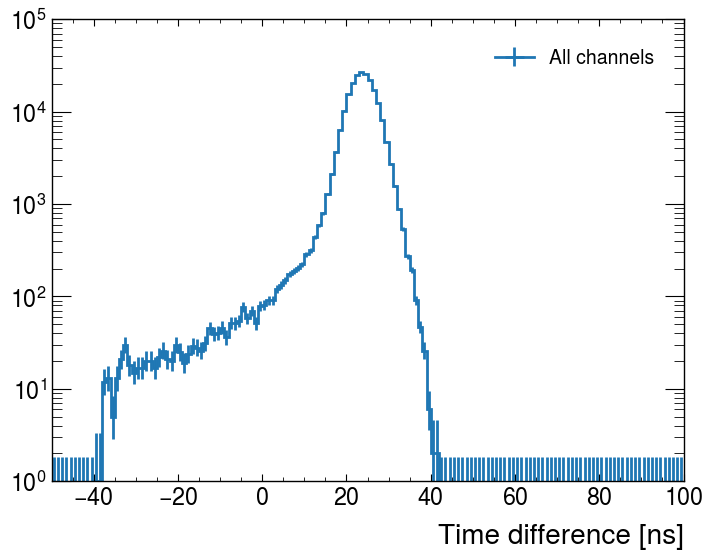

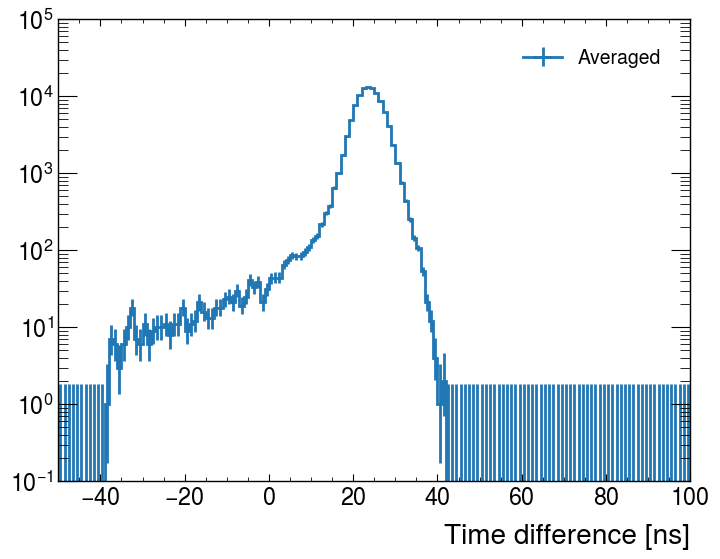

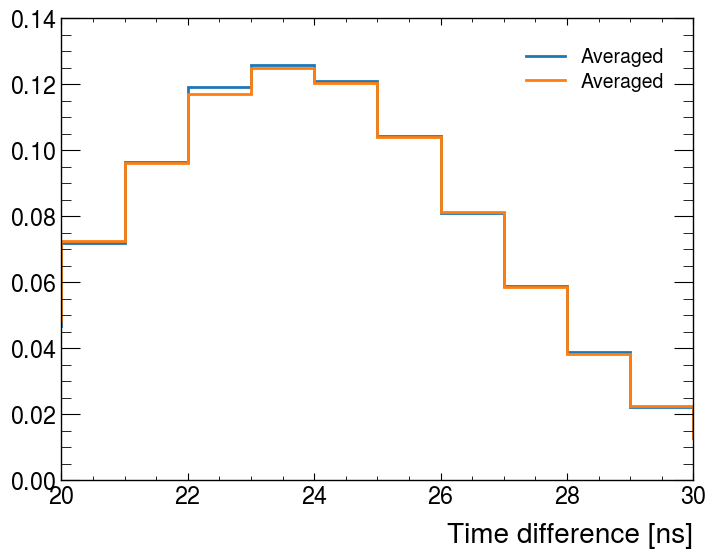

In [71]:
fig, ax = plt.subplots()
htc.plot1d(linewidth=2.0, label='All channels')
#ax.plot(x, 27000*np.exp(-(x-24)**2/20), color='red')
ax.set_xlabel('Time difference [ns]')
ax.set_xlim(-50, 100)
ax.set_ylim(1, 100000)
ax.set_yscale('log')
ax.legend()
plt.show()

fig, ax = plt.subplots()
hta.plot1d(linewidth=2.0, label='Averaged')
#ht0.plot1d(linewidth=2.0, label='Channel 0')
ax.set_xlabel('Time difference [ns]')
ax.set_xlim(-50, 100)
ax.set_yscale('log')
ax.legend()
plt.show()

htcnorm = htc/htc.sum()
htanorm = hta/hta.sum()
fig, ax = plt.subplots()
htanorm.plot1d(linewidth=2.0, label='Averaged')
htcnorm.plot1d(linewidth=2.0, label='Averaged')
#ht0.plot1d(linewidth=2.0, label='Channel 0')
ax.set_xlabel('Time difference [ns]')
ax.set_xlim(20, 30)
#ax.set_yscale('log')
ax.legend()
plt.show()

[19367.00772215   101.61210313    32.51803304]
[398.179376645359, 0.001607183937303998, 0.002646580867350587]


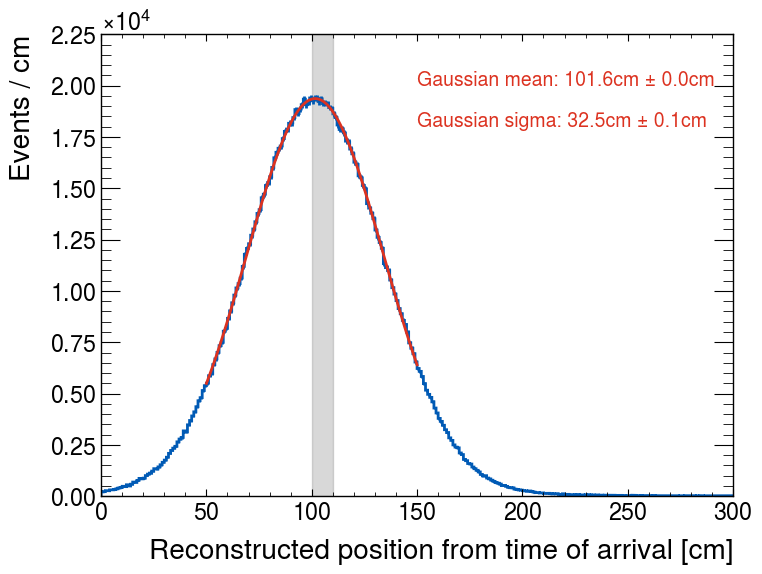

In [11]:
pos = hda.axes[0].centers
posskim = []
contskim = []
for i, val in enumerate(hda.values()):
    if pos[i] > 50 and pos[i] < 150:
        posskim.append(pos[i])
        contskim.append(val)

pars, cov = curve_fit(Gaussian, posskim, contskim, p0 = [1500, 90, 20])
print(pars)
print([cov[0][0], cov[1][1], cov[2][2]])
fitA = pars[0]
fitB = pars[1]
fitC = pars[2]

stdC = math.sqrt(cov[2][2])
stdB = math.sqrt(cov[1][1])

x = np.linspace(50, 150, 100)

fig, ax = plt.subplots()
hda.plot1d(linewidth=2.0, color='#005AB5')
ax.plot(x, Gaussian(x, fitA, fitB, fitC), color='#DC3220')
ax.set_xlabel('Reconstructed position from time of arrival [cm]')
ax.set_ylabel('Events / cm')
ax.set_xlim(0, 300)
ax.axvspan(100, 110, alpha=0.3, color='grey')
#ax.set_yscale('log')
ax.text(150, 20000, 'Gaussian mean: {0}cm ± {1}cm'.format(round(fitB,1),round(stdB, 1)), color='#DC3220')
ax.text(150, 18000, 'Gaussian sigma: {0}cm ± {1}cm'.format(round(fitC,1),round(stdC, 1)), color='#DC3220')
fig.savefig('/exp/mu2e/data/users/thoroho/position-resolution.pdf',dpi=300)
plt.show()

In [27]:
varlist = ['PEs','time','fitStatus','LEtime',
           'subrunNumber','spillNumber','eventNumber']

hd = Hist(hist.axis.Regular(bins=200, start=0, stop=200, name="position"))

for idx, filename in enumerate(filelist):
    print(filename)
    with uproot.open(filename) as file:
        for ar in file.iterate(step_size="10MB", 
                               filter_name=varlist, 
                               report=False, library='ak'):
            ar['PEs'] = ak.where(ar['PEs'] >= 20, ar['PEs'], 0) # much more strict cut
            FEB = 0
            ar['timediff'] = (ar['time'][:,FEB+4,:] - ar['time'][:,FEB,:])/4
            print(np.nanmean(ar['timediff'], axis=-1))
            hd.fill(17.3*np.nanmean(ar['timediff'], axis=-1))

root://fndcadoor.fnal.gov:1094/mu2e/tape/phy-rec/rec/mu2e/CRV_wideband_cosmics/CRVWB-000-008-000/root/8e/6d/rec.mu2e.CRV_wideband_cosmics.CRVWB-000-008-000.002070_000.root:run
[None, 6.32, -22.6, 29.2, 6.17, None, ..., None, -109, 5.69, 31.2, 6.62, 5.76]


ValueError: while calling

    numpy.asarray(
        <Array [None, 109, -391, ..., 541, 114, 99.6] type='6448 * ?float64'>
    )

Error details: ak.to_numpy cannot convert 'None' values to np.ma.MaskedArray unless the 'allow_missing' parameter is set to True

In [ ]:
varlist = ['PEs','time','fitStatus','LEtime',
           'subrunNumber','spillNumber','eventNumber']

hc1 = Hist(hist.axis.Regular(bins=200, start=0, stop=1, name="speed of light"))
hc2 = Hist(hist.axis.Regular(bins=200, start=0, stop=1, name="speed of light"))
hist2d = Hist(hist.axis.Regular(200, 0, 2,), hist.axis.Regular(20, 0, 100))
counter = 0

#hist2dA = Hist(hist.axis.Regular(200, 0, 2), hist.axis.Regular(20, 10, 30))
#hist2dB = Hist(hist.axis.Regular(200, 0, 2), hist.axis.Regular(20, 10, 30))

for idx, filename in enumerate(filelist):
    print(filename)
    with uproot.open(filename) as file:
        for ar in file.iterate(step_size="10MB", 
                               filter_name=varlist, 
                               report=False, library='ak'):
            ar['PEs'] = ak.where(ar['PEs'] >= 20, ar['PEs'], 0) # much more strict cut
            ar['hits'] = ak.where(ar['PEs'] > 0, 1, 0)
            for chan in range(64):
                for FEB in range(2):
                    PEsCut = (ar['PEs'][:,FEB,chan] > 0) & (ar['PEs'][:,FEB+4,chan] > 0)
                    FitStatusCut = (ar['fitStatus'][:,FEB,chan] == 1) & (ar['fitStatus'][:,FEB+4,chan] == 1)
                    HitsCut = (ak.sum(ar['hits'][:,FEB,0:64], axis=-1) < 5) & (ak.sum(ar['hits'][:,FEB+4,0:64], axis=-1) < 5)
                    ar_chan = ar[PEsCut & FitStatusCut & HitsCut]
                    ar_chan['c'] = 4/((ar_chan['time'][:,FEB+4,chan] - ar_chan['time'][:,FEB,chan])*0.299792458)
                    hc1.fill(ar_chan['c'])
                    hist2d.fill(ar_chan['c'], abs(ar_chan['PEs'][:,FEB+4,chan] - ar_chan['PEs'][:,FEB,chan]))

                    superluminal = (ar_chan['c'] > 0.5) & (ar_chan['c'] < 0.6)
                    if len(ar_chan['eventNumber'][superluminal]) > 0 and counter < 10:
                        for i in range(len(ar_chan['eventNumber'][superluminal])):
                            print("FEB", FEB, "Channel", chan, "speed of light", ar_chan['c'][superluminal][i], "side A time", ar_chan['LEtime'][superluminal][i,FEB,chan], "side B time", ar_chan['LEtime'][superluminal][i,FEB+4,chan], "spillNumber", ar_chan['spillNumber'][superluminal][i], "eventNumber", ar_chan['eventNumber'][superluminal][i])
                        counter += 1

                    PEsCut = (ar['PEs'][:,FEB+2,chan] > 0) & (ar['PEs'][:,FEB+6,chan] > 0)
                    FitStatusCut = (ar['fitStatus'][:,FEB+2,chan] == 1) & (ar['fitStatus'][:,FEB+6,chan] == 1)
                    HitsCut = (ak.sum(ar['hits'][:,FEB+2,0:64], axis=-1) < 5) & (ak.sum(ar['hits'][:,FEB+6,0:64], axis=-1) < 5)
                    ar_chan = ar[PEsCut & FitStatusCut & HitsCut]
                    #ar_chan = ar[(ar['PEs'][:,FEB+2,chan] > 0) & (ar['PEs'][:,FEB+6,chan] > 0) & (ar['fitStatus'][:,FEB+2,chan] == 1) & (ar['fitStatus'][:,FEB+6,chan] == 1)]
                    ar_chan['c'] = 4/((ar_chan['time'][:,FEB+6,chan] - ar_chan['time'][:,FEB+2,chan])*0.299792458)
                    hc2.fill(ar_chan['c'])
                    hist2d.fill(ar_chan['c'], abs(ar_chan['PEs'][:,FEB+6,chan] - ar_chan['PEs'][:,FEB+2,chan]))


root://fndcadoor.fnal.gov:1094/mu2e/tape/phy-rec/rec/mu2e/CRV_wideband_cosmics/CRVWB-000-008-000/root/7c/4f/rec.mu2e.CRV_wideband_cosmics.CRVWB-000-008-000.002070_001.root:run
FEB 0 Channel 0 speed of light 0.5993895 side A time 837.34875 side B time 857.58575 spillNumber 277 eventNumber 80
FEB 0 Channel 0 speed of light 0.5328803 side A time 854.55774 side B time 880.05963 spillNumber 277 eventNumber 169
FEB 0 Channel 0 speed of light 0.52391493 side A time 841.34076 side B time 866.79913 spillNumber 277 eventNumber 319
FEB 0 Channel 0 speed of light 0.53034 side A time 849.9469 side B time 871.0777 spillNumber 277 eventNumber 352
FEB 0 Channel 0 speed of light 0.5382877 side A time 847.4551 side B time 872.9963 spillNumber 277 eventNumber 459
FEB 0 Channel 0 speed of light 0.5477521 side A time 856.93884 side B time 881.08374 spillNumber 279 eventNumber 149
FEB 0 Channel 0 speed of light 0.5222478 side A time 846.36487 side B time 873.32666 spillNumber 279 eventNumber 192
FEB 0 Chann

In [8]:
bins = np.linspace(0.005, 0.995, 200)

mean1 = 0
std1 = 0
for i, val in enumerate(hc1.values()):
    mean1 += bins[i]*val
mean1 = mean1/hc1.sum()
for i, val in enumerate(hc1.values()):
    std1 += val*(bins[i] - mean1)**2
std1 = np.sqrt(std1/hc1.sum())

mean2 = 0
std2 = 0
for i, val in enumerate(hc2.values()):
    mean2 += bins[i]*val
mean2 = mean2/hc2.sum()
for i, val in enumerate(hc2.values()):
    std2 += val*(bins[i] - mean2)**2
std2 = np.sqrt(std2/hc2.sum())

print("Module 171")
print("----------------------------")
print("Mean:", mean1)
print("Standard deviation:", std1)
print(" ")
print("Module 169")
print("----------------------------")
print("Mean:", mean2)
print("Standard deviation:", std2)

Module 171
----------------------------
Mean: 0.570959204109033
Standard deviation: 0.08767422930150921
 
Module 169
----------------------------
Mean: 0.5162775250397397
Standard deviation: 0.0669689075449522


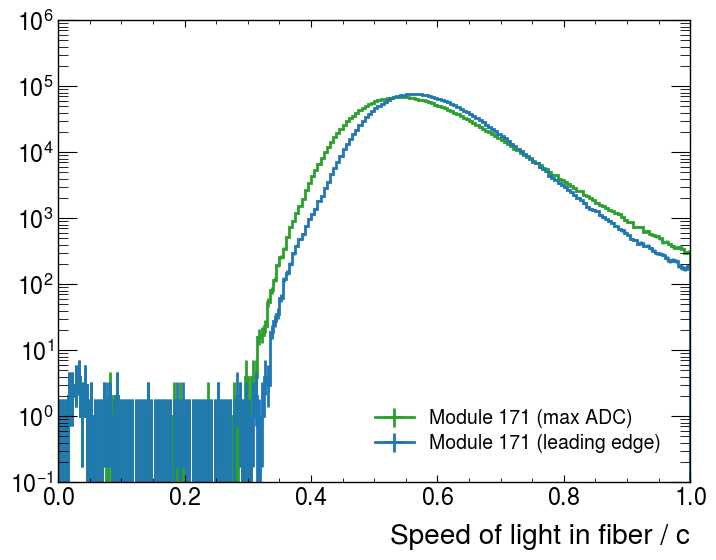

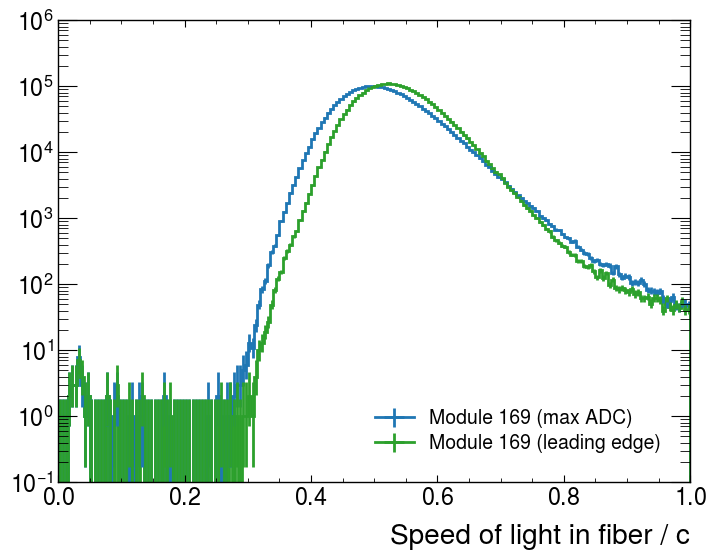

In [10]:
fig, ax = plt.subplots()
hc1.plot1d(color='#2ca02c', linewidth=2.0, label='Module 171 (max ADC)')#: {0}c ± {1}c'.format(round(mean1,3), round(std1,3)))
hcLE1.plot1d(color='#1f77b4', linewidth=2.0, label='Module 171 (leading edge)')#: {0}c ± {1}c'.format(round(mean1,3), round(std1,3)))
ax.set_xlabel('Speed of light in fiber / c')
ax.set_xlim(0, 1)
ax.set_yscale('log')
ax.legend()
plt.show()

fig, ax = plt.subplots()
hc2.plot1d(color='#1f77b4', linewidth=2.0, label='Module 169 (max ADC)')#: {0}c ± {1}c'.format(round(mean2,3), round(std2,3)))
hcLE2.plot1d(color='#2ca02c', linewidth=2.0, label='Module 169 (leading edge)')#: {0}c ± {1}c'.format(round(mean2,3), round(std2,3)))
ax.set_xlabel('Speed of light in fiber / c')
ax.set_xlim(0, 1)
ax.set_yscale('log')
ax.legend()
plt.show()

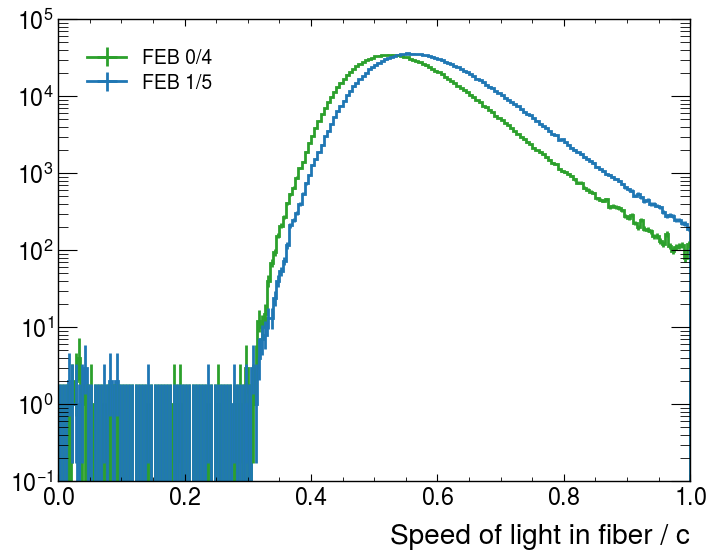

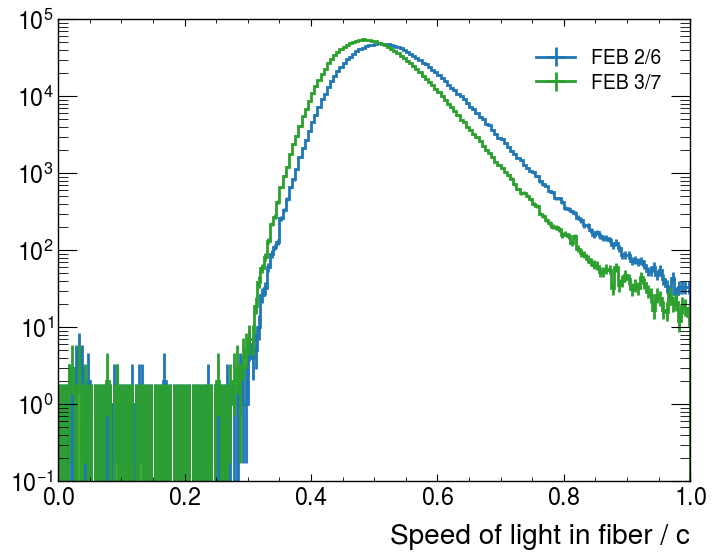

In [6]:
fig, ax = plt.subplots()
hc1.plot1d(color='#2ca02c', linewidth=2.0, label='FEB 0/4')#: {0}c ± {1}c'.format(round(mean1,3), round(std1,3)))
hc2.plot1d(color='#1f77b4', linewidth=2.0, label='FEB 1/5')#: {0}c ± {1}c'.format(round(mean1,3), round(std1,3)))
ax.set_xlabel('Speed of light in fiber / c')
ax.set_xlim(0, 1)
ax.set_yscale('log')
ax.legend()
plt.show()

fig, ax = plt.subplots()
hc3.plot1d(color='#1f77b4', linewidth=2.0, label='FEB 2/6')#: {0}c ± {1}c'.format(round(mean2,3), round(std2,3)))
hc4.plot1d(color='#2ca02c', linewidth=2.0, label='FEB 3/7')#: {0}c ± {1}c'.format(round(mean2,3), round(std2,3)))
ax.set_xlabel('Speed of light in fiber / c')
ax.set_xlim(0, 1)
ax.set_yscale('log')
ax.legend()
plt.show()

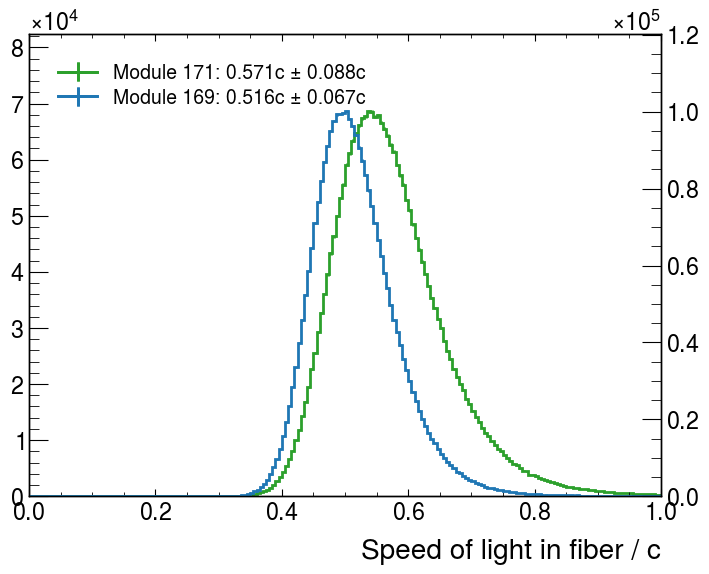

In [7]:
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
module171, = hc1.plot1d(ax=ax1, color='#2ca02c', linewidth=2.0, label='Module 171: {0}c ± {1}c'.format(round(mean1,3), round(std1,3)))
module169, = hc2.plot1d(ax=ax2, color='#1f77b4', linewidth=2.0, label='Module 169: {0}c ± {1}c'.format(round(mean2,3), round(std2,3)))
ax1.set_xlabel('Speed of light in fiber / c')
ax1.set_xlim(0, 1)
ax1.set_ylim(0,1.2*max(hc1.values()))
ax2.set_ylim(0,1.2*max(hc2.values()))

plts = [module171, module169]
labs = ['Module 171: {0}c ± {1}c'.format(round(mean1,3), round(std1,3)), 'Module 169: {0}c ± {1}c'.format(round(mean2,3), round(std2,3))]
ax1.legend(plts, labs, loc='upper left')

plt.show()

/tmp/ipykernel_3811/2571247799.py:3: RuntimeWarning: divide by zero encountered in log10
  mesh = ax.pcolormesh(x, y, np.log10(w.T), cmap='viridis')


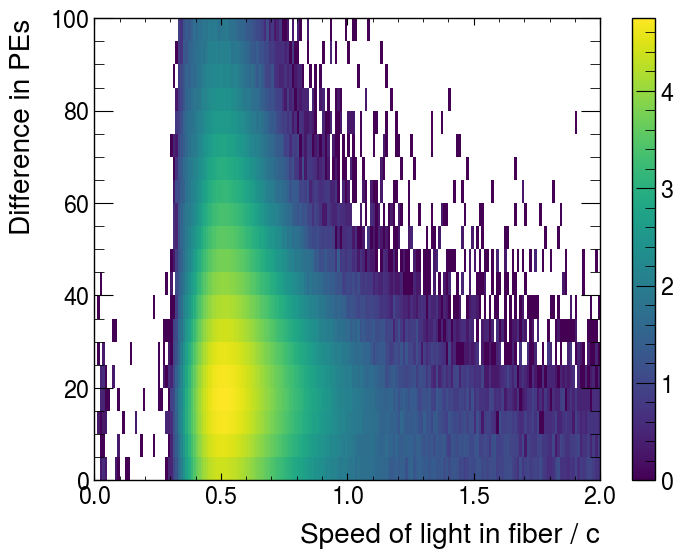

In [19]:
fig, ax = plt.subplots()
w, x, y = hist2d.to_numpy()
mesh = ax.pcolormesh(x, y, np.log10(w.T), cmap='viridis')
ax.set_xlabel("Speed of light in fiber / c")
ax.set_ylabel("Difference in PEs")
fig.colorbar(mesh)
#ax.set_yscale('log')
#ax.set_ylim((100, 20000))
plt.show()

In [49]:
runs = [2070, 2071, 2072, 2073]
processor = wideband.DataProcessor(treename='run', runlist=runs, userunlist=True, remove=False,fixtimes=True)
filelist = processor.getFilelist(DATASET, root_schema=True)
filelist = ["{}{}".format(i, ":run") for i in filelist]

varlist = ['PEs','time','fitStatus','LEtime',
           'subrunNumber','spillNumber','eventNumber']

hd = Hist(hist.axis.Regular(bins=600, start=0, stop=600, name="position"))
ht = Hist(hist.axis.Regular(bins=2000, start=-100, stop=100, name="time"))

d = {}
for chan in range(64):
    d['hist_{0}'.format(chan)] = Hist(hist.axis.Regular(bins=200, start=-100, stop=100, name="time"))

counter = 0

for idx, filename in enumerate(filelist):
    print(filename)
    with uproot.open(filename) as file:
        for ar in file.iterate(step_size="10MB", 
                               filter_name=varlist, 
                               report=False, library='ak'):
            ar['PEs'] = ak.where(ar['PEs'] >= 20, ar['PEs'], 0) # much more strict cut
            ar['hits'] = ak.where(ar['PEs'] > 0, 1, 0)
            ar = ar[(ak.sum(ar['hits'][:,0,0:64], axis=-1) > 50) & (ak.sum(ar['hits'][:,4,0:64], axis=-1) > 50)]
            if counter < 10:
                print(ar['spillNumber'])
                print(ar['eventNumber'])
                print("------------")
                counter += 1
            ar['timediff'] = np.subtract(ar['time'][:,4,:], ar['time'][:,0,:])
            if len(ar['timediff']) > 0:
                for i in range(len(ar['timediff'])):
                    for chan in range(64):
                        if ar['PEs'][i,0,chan] > 0 and ar['PEs'][i,4,chan] > 0:
                            if ar['fitStatus'][i,0,chan] == 1 and ar['fitStatus'][i,4,chan] == 1:
                                d['hist_{0}'.format(chan)].fill(ar['timediff'][i][chan])
                                ht.fill(ar['timediff'][i][chan])
            else:
                continue

root://fndcadoor.fnal.gov:1094/mu2e/tape/phy-rec/rec/mu2e/CRV_wideband_cosmics-noadc/CRVWB-000-008-000/root/c1/0a/rec.mu2e.CRV_wideband_cosmics-noadc.CRVWB-000-008-000.002070_001.root:run
[277, 279, 280, 282, 282, 283, 285, 287]
[576, 196, 553, 131, 622, 430, 345, 39]
------------
[287, 288, 289, 289, 289, 290, 290, 297]
[430, 303, 74, 138, 259, 138, 474, 548]
------------
[299, 300, 300, 304, 304, 304, 304, 306]
[678, 272, 315, 5, 128, 130, 605, 204]
------------
[313, 313, 313, 315, 315, 315, 315, 317, 317, 319, 321, 321, 322]
[154, 200, 534, 73, 282, 353, 639, 636, 639, 352, 22, 475, 338]
------------
[325, 325, 326, 326, 328, 330, 331, 331]
[187, 271, 336, 572, 179, 451, 227, 404]
------------
[332, 333, 334, 334, 335, 335, 336, 337, 339, 341]
[604, 198, 47, 105, 390, 413, 592, 403, 134, 86]
------------
[344, 345, 345, 346, 346, 346, 348, 348]
[308, 68, 595, 151, 334, 532, 123, 463]
------------
[353, 354, 356, 358, 359, 361, 362, 364]
[439, 206, 619, 585, 498, 565, 339, 12]
-----

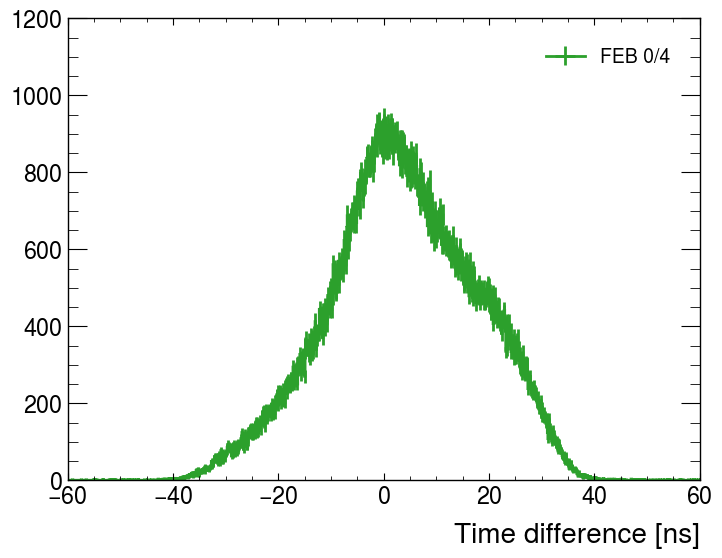

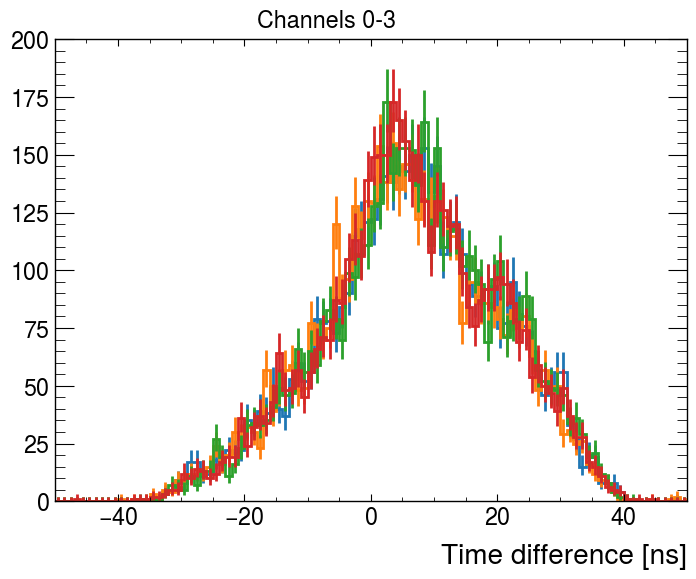

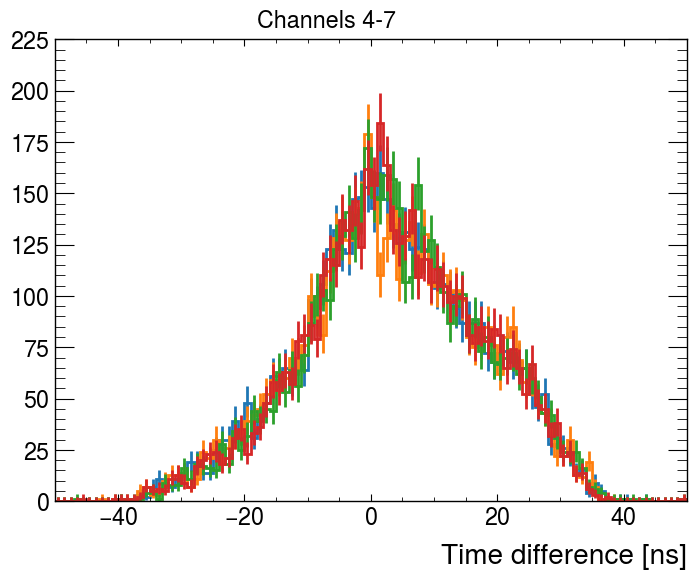

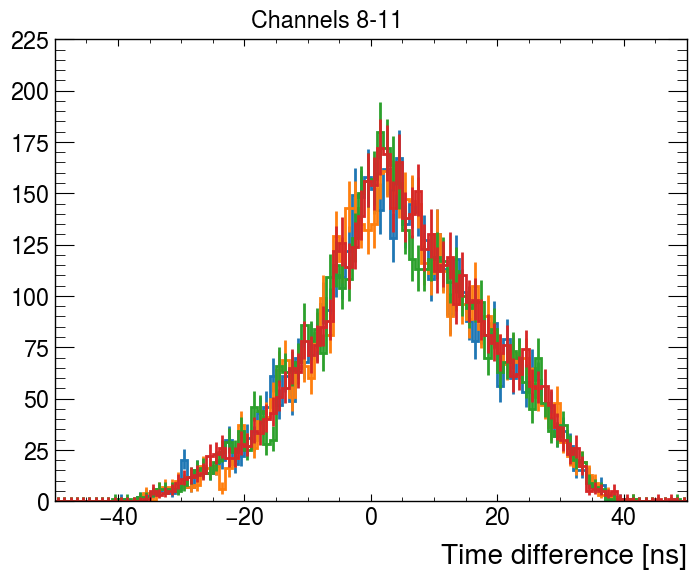

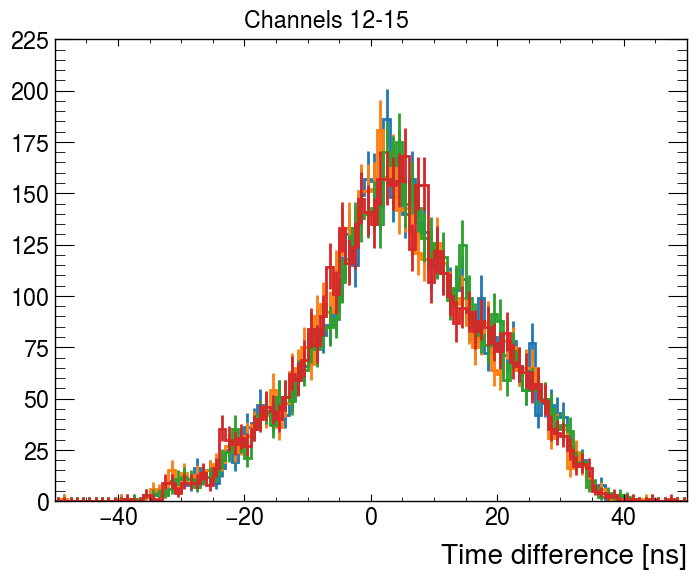

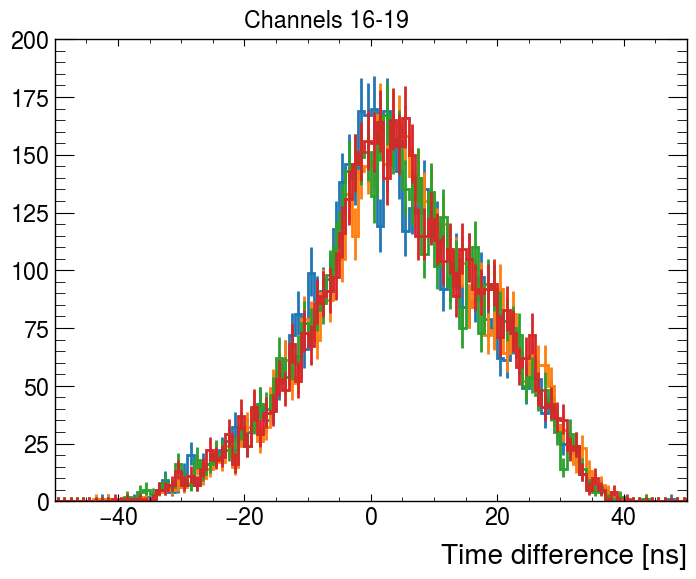

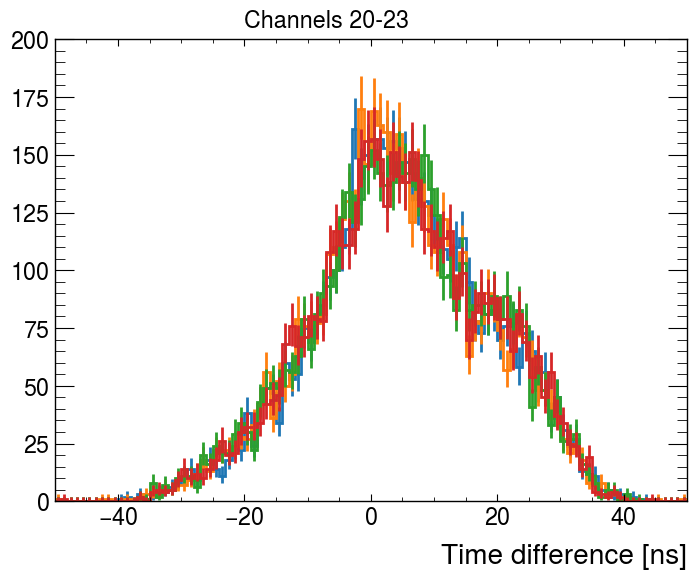

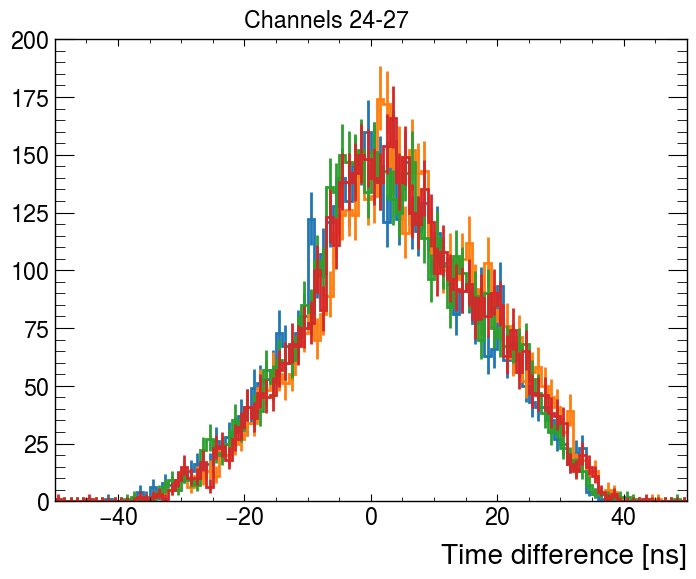

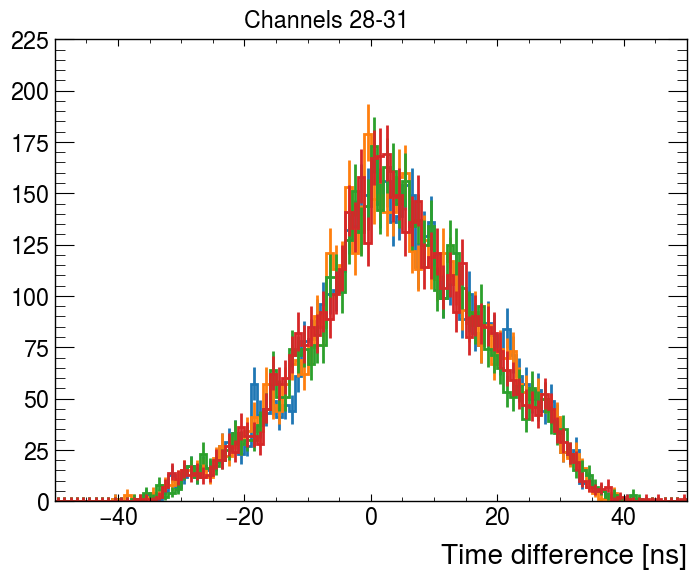

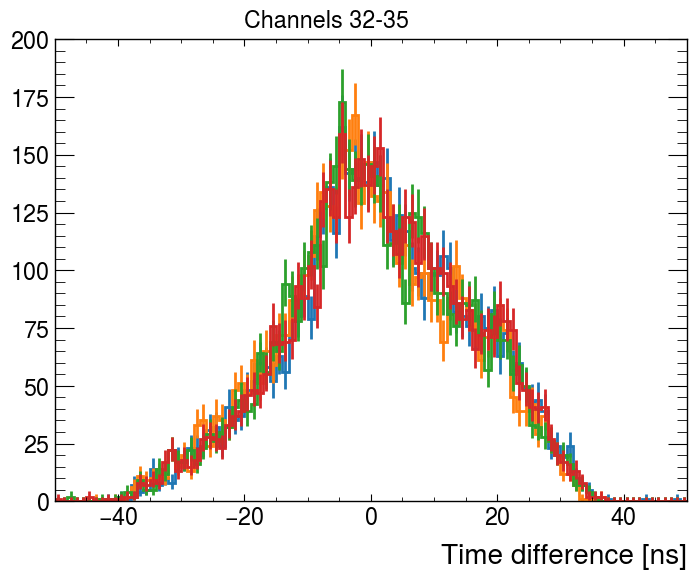

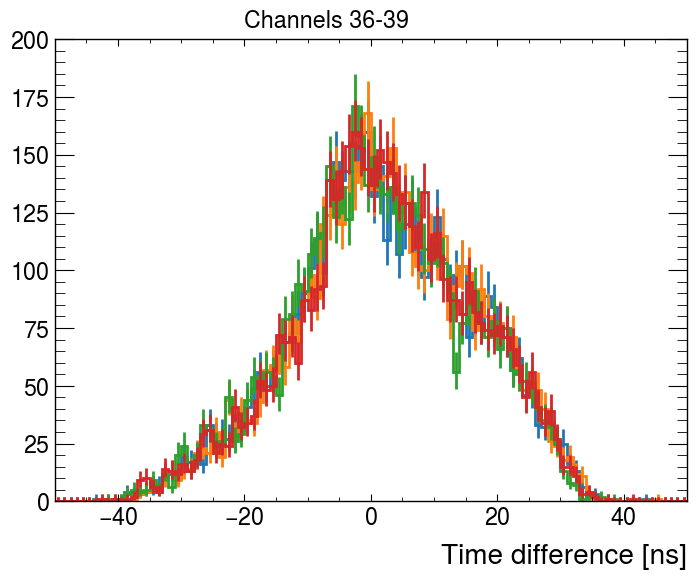

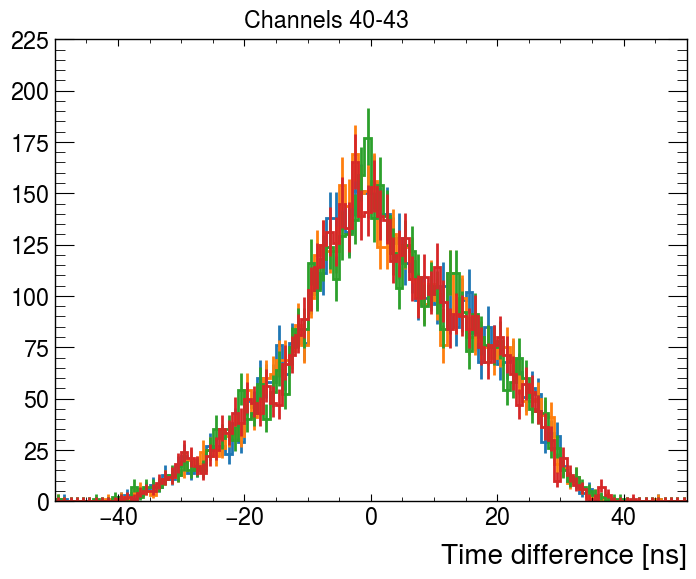

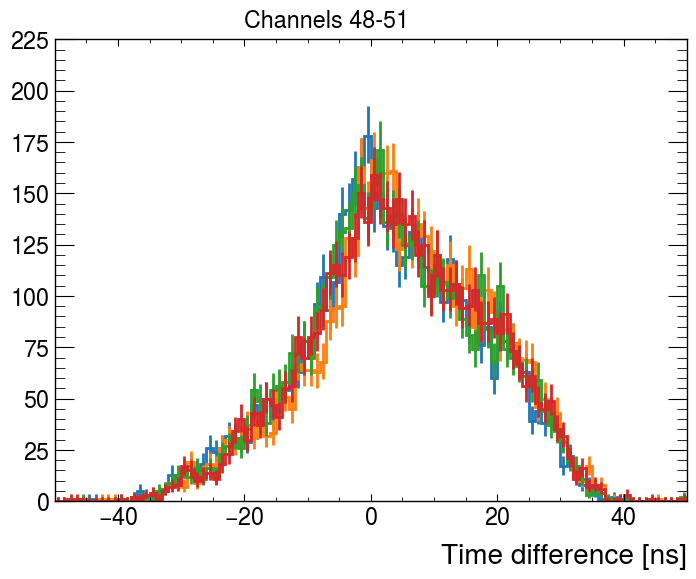

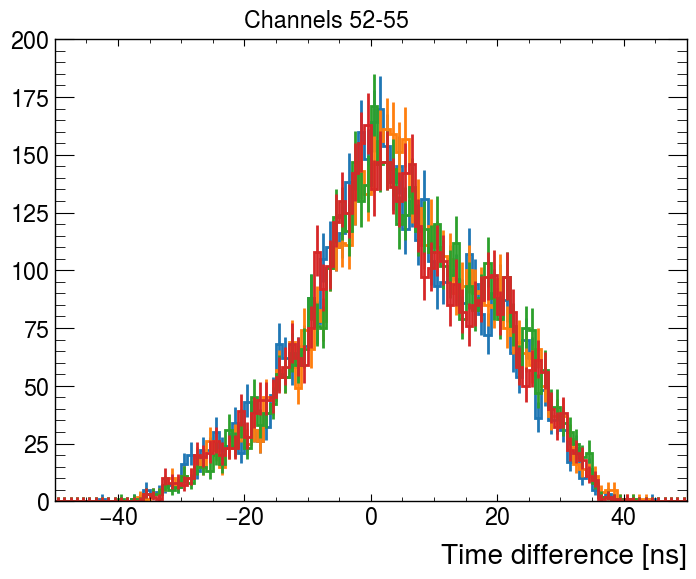

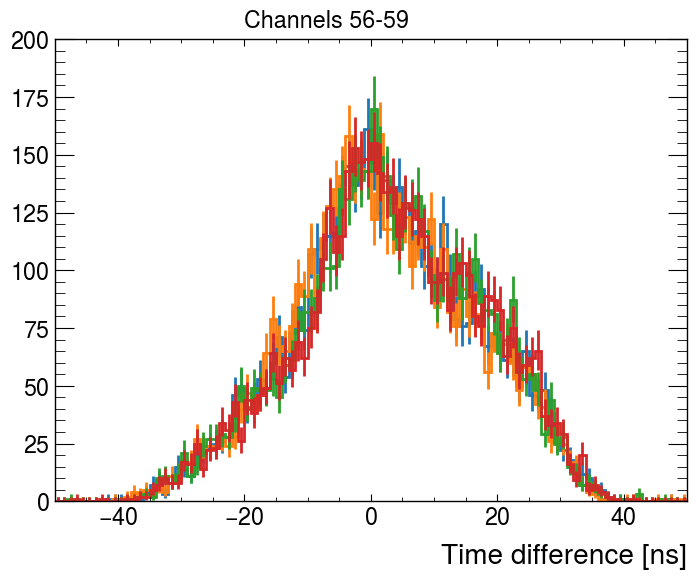

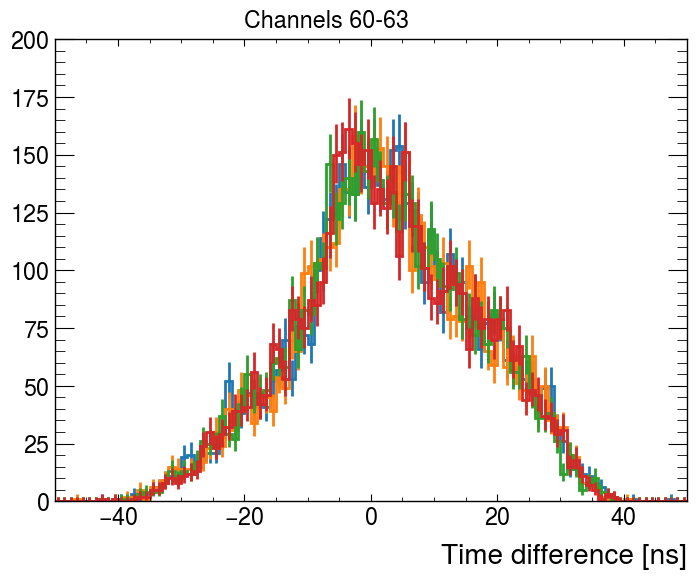

In [50]:
fig, ax = plt.subplots()
ht.plot1d(color='#2ca02c', linewidth=2.0, label='FEB 0/4')#: {0}c ± {1}c'.format(round(mean1,3), round(std1,3)))
ax.set_xlabel('Time difference [ns]')
ax.set_xlim(-60, 60)
#ax.set_yscale('log')
ax.legend()
plt.show()

for chan in range(64):
    if chan == 44 or chan == 45 or chan == 46 or chan == 47:
            continue
    if (chan+1)%4 == 0:
        fig, ax = plt.subplots()
        d['hist_{0}'.format(chan-3)].plot1d(linewidth=2.0, ax=ax)
        d['hist_{0}'.format(chan-2)].plot1d(linewidth=2.0, ax=ax)
        d['hist_{0}'.format(chan-1)].plot1d(linewidth=2.0, ax=ax)
        d['hist_{0}'.format(chan)].plot1d(linewidth=2.0, ax=ax)

        fig.suptitle('Channels {0}-{1}'.format(chan-3, chan))
        ax.set_xlabel('Time difference [ns]')
        ax.set_xlim(-50, 50)
        #ax.set_yscale('log')
        plt.show()

In [39]:
bins = np.linspace(-99.5, 99.5, 200)

for chan in range(64):
    mean = 0
    std = 0
    h = d['hist_{0}'.format(chan)]
    for i, val in enumerate(h.values()):
        mean += bins[i]*val
    mean = mean/h.sum()
    for i, val in enumerate(h.values()):
        std += val*(bins[i] - mean)**2
    std = np.sqrt(std/h.sum())
    print(chan, mean, std)

0 6.383725733168112 14.158785165187696
1 5.699585492227979 14.106279050000161
2 6.716232834597253 13.979231472285916
3 6.198874104401228 13.960992915799359
4 3.01727621741766 14.222304625306098
5 3.2227420667209112 14.351035388724597
6 3.6749847219392953 13.914170217533792
7 3.3669501822600245 13.893621666771748
8 4.330659898477157 13.71430592024907
9 4.597907779809059 13.608799835311451
10 4.215149073327962 13.861982432830722
11 4.610866959648422 13.657161933614972
12 4.892741281427413 13.839467904699731
13 4.20585850395297 13.842780889209088
14 4.927610114192496 13.6836810976821
15 4.456159935051756 13.645237881960186
16 3.678159757330637 13.749073256782895
17 4.989370317878113 13.616981644083257
18 4.125730994152047 13.768879551608553
19 4.680241935483871 13.667382761683761
20 4.823863636363637 13.782408041991447
21 4.313590263691683 13.77776149657327
22 4.647494420775005 13.926798828695402
23 4.667853509664293 13.854163546737903
24 2.76104498688723 13.925695549146917
25 4.822457200

/tmp/ipykernel_1511/2907188178.py:9: RuntimeWarning: invalid value encountered in scalar divide
  mean = mean/h.sum()


In [26]:
runs = [2074]#, 2075]
processor = wideband.DataProcessor(treename='run', runlist=runs, userunlist=True, remove=False,fixtimes=True)
filelist = processor.getFilelist(DATASET, root_schema=True)
filelist = ["{}{}".format(i, ":run") for i in filelist]

varlist = ['PEs','time','fitStatus','LEtime',
           'subrunNumber','spillNumber','eventNumber']

ht0 = Hist(hist.axis.Regular(bins=500, start=700, stop=1700, name="time"))
ht1 = Hist(hist.axis.Regular(bins=500, start=700, stop=1700, name="time"))
ht2 = Hist(hist.axis.Regular(bins=500, start=700, stop=1700, name="time"))
ht3 = Hist(hist.axis.Regular(bins=500, start=700, stop=1700, name="time"))
ht4 = Hist(hist.axis.Regular(bins=500, start=700, stop=1700, name="time"))
ht5 = Hist(hist.axis.Regular(bins=500, start=700, stop=1700, name="time"))
ht6 = Hist(hist.axis.Regular(bins=500, start=700, stop=1700, name="time"))
ht7 = Hist(hist.axis.Regular(bins=500, start=700, stop=1700, name="time"))

hdt0 = Hist(hist.axis.Regular(bins=200, start=-100, stop=100, name="time"))
hdt1 = Hist(hist.axis.Regular(bins=200, start=-100, stop=100, name="time"))
hdt2 = Hist(hist.axis.Regular(bins=200, start=-100, stop=100, name="time"))
hdt3 = Hist(hist.axis.Regular(bins=200, start=-100, stop=100, name="time"))
hdt4 = Hist(hist.axis.Regular(bins=200, start=-100, stop=100, name="time"))
hdt5 = Hist(hist.axis.Regular(bins=200, start=-100, stop=100, name="time"))
hdt6 = Hist(hist.axis.Regular(bins=200, start=-100, stop=100, name="time"))
hdt7 = Hist(hist.axis.Regular(bins=200, start=-100, stop=100, name="time"))

d = {}
for chan in range(64):
    d['hist_{0}'.format(chan)] = Hist(hist.axis.Regular(bins=200, start=-100, stop=100, name="time"))


counter = 0

for idx, filename in enumerate(filelist):
    try:
        print(filename)
        with uproot.open(filename) as file:
            for ar in file.iterate(step_size="10MB", 
                                   filter_name=varlist, 
                                   report=False, library='ak'):
                ar['PEs'] = ak.where(ar['PEs'] >= 20, ar['PEs'], 0) # much more strict cut
                ar['hits'] = ak.where(ar['PEs'] > 0, 1, 0)
                ar = ar[(ak.sum(ar['hits'][:,0,0:64], axis=-1) > 50) & (ak.sum(ar['hits'][:,4,0:64], axis=-1) > 50)]
                for chan in range(64):
                    ht0.fill(ar['time'][:,0,chan])
                    ht1.fill(ar['time'][:,1,chan])
                    ht2.fill(ar['time'][:,2,chan])
                    ht3.fill(ar['time'][:,3,chan])
                    ht4.fill(ar['time'][:,4,chan])
                    ht5.fill(ar['time'][:,5,chan])
                    ht6.fill(ar['time'][:,6,chan])
                    ht7.fill(ar['time'][:,7,chan])
    
                    if chan > 0:
                        hdt0.fill(ar['time'][:,0,chan] - ar['time'][:,0,0])
                        hdt1.fill(ar['time'][:,1,chan] - ar['time'][:,1,0])
                        hdt2.fill(ar['time'][:,2,chan] - ar['time'][:,2,0])
                        hdt3.fill(ar['time'][:,3,chan] - ar['time'][:,3,0])
                        hdt4.fill(ar['time'][:,4,chan] - ar['time'][:,4,0])
                        hdt5.fill(ar['time'][:,5,chan] - ar['time'][:,5,0])
                        hdt6.fill(ar['time'][:,6,chan] - ar['time'][:,6,0])
                        hdt7.fill(ar['time'][:,7,chan] - ar['time'][:,7,0])
    
                        d['hist_{0}'.format(chan)].fill(ar['time'][:,0,chan] - ar['time'][:,0,0])
    except:
        continue

root://fndcadoor.fnal.gov:1094/mu2e/tape/phy-rec/rec/mu2e/CRV_wideband_cosmics/CRVWB-000-008-000/root/1e/fc/rec.mu2e.CRV_wideband_cosmics.CRVWB-000-008-000.002074_000.root:run
root://fndcadoor.fnal.gov:1094/mu2e/tape/phy-rec/rec/mu2e/CRV_wideband_cosmics/CRVWB-000-008-000/root/37/2c/rec.mu2e.CRV_wideband_cosmics.CRVWB-000-008-000.002074_001.root:run
root://fndcadoor.fnal.gov:1094/mu2e/tape/phy-rec/rec/mu2e/CRV_wideband_cosmics/CRVWB-000-008-000/root/e0/27/rec.mu2e.CRV_wideband_cosmics.CRVWB-000-008-000.002074_002.root:run
root://fndcadoor.fnal.gov:1094/mu2e/tape/phy-rec/rec/mu2e/CRV_wideband_cosmics/CRVWB-000-008-000/root/98/07/rec.mu2e.CRV_wideband_cosmics.CRVWB-000-008-000.002074_003.root:run
root://fndcadoor.fnal.gov:1094/mu2e/tape/phy-rec/rec/mu2e/CRV_wideband_cosmics/CRVWB-000-008-000/root/98/42/rec.mu2e.CRV_wideband_cosmics.CRVWB-000-008-000.002074_004.root:run
root://fndcadoor.fnal.gov:1094/mu2e/tape/phy-rec/rec/mu2e/CRV_wideband_cosmics/CRVWB-000-008-000/root/1c/cc/rec.mu2e.CRV

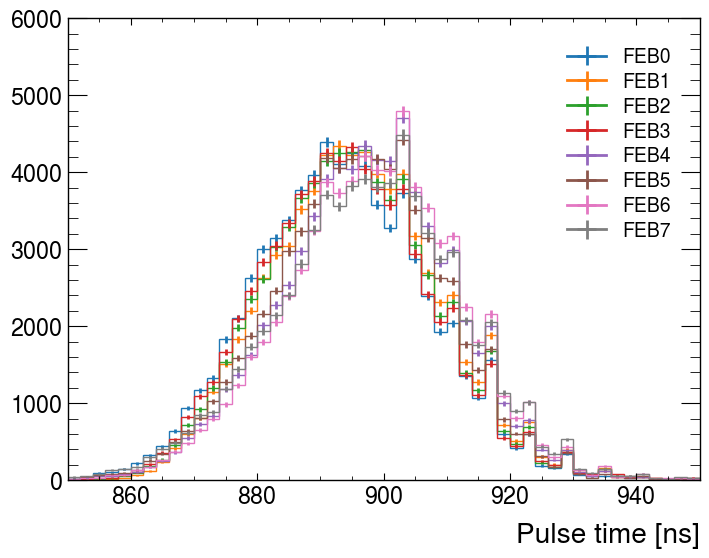

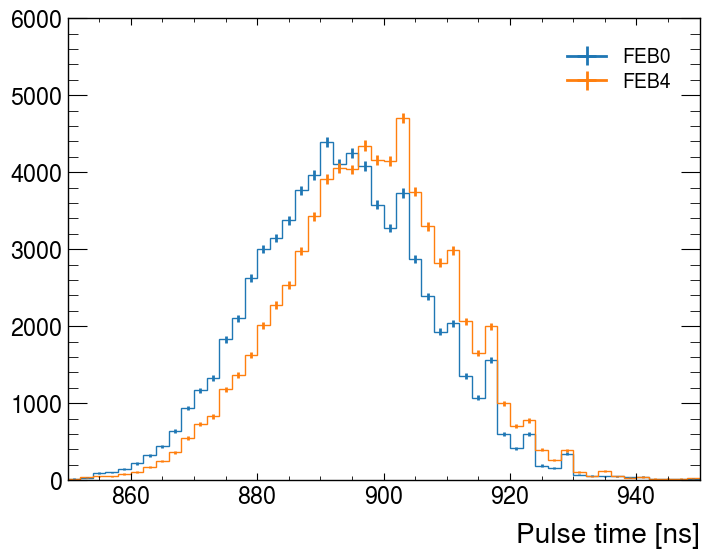

In [17]:
fig, ax = plt.subplots()
ht0.plot1d(label='FEB0')
ht1.plot1d(label='FEB1')
ht2.plot1d(label='FEB2')
ht3.plot1d(label='FEB3')
ht4.plot1d(label='FEB4')
ht5.plot1d(label='FEB5')
ht6.plot1d(label='FEB6')
ht7.plot1d(label='FEB7')
ax.set_xlabel('Pulse time [ns]')
#ax.set_xlim(800, 1000)
ax.set_xlim(850, 950)
#ax.set_yscale('log')
ax.legend()
plt.show()

fig, ax = plt.subplots()
ht0.plot1d(label='FEB0')
ht4.plot1d(label='FEB4')
ax.set_xlabel('Pulse time [ns]')
#ax.set_xlim(800, 1000)
ax.set_xlim(850, 950)
#ax.set_yscale('log')
ax.legend()
plt.show()

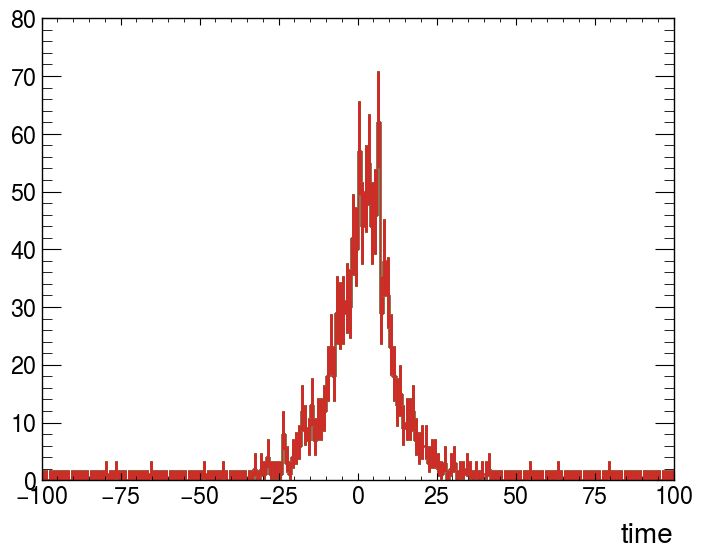

In [27]:
fig, ax = plt.subplots()
for i in range(64):
    d['hist_{0}'.format(chan)].plot1d()

    
#hdt0.plot1d(label='FEB0')
#hdt4.plot1d(label='FEB4')
#ax.set_xlabel('Pulse time difference [ns]')
#ax.set_xlim(800, 1000)
#ax.set_xlim(-50, 50)
#ax.set_yscale('log')
#ax.legend()
plt.show()

In [24]:
runs = [2074]#, 2075]
processor = wideband.DataProcessor(treename='run', runlist=runs, userunlist=True, remove=False,fixtimes=True)
filelist = processor.getFilelist(DATASET, root_schema=True)
filelist = ["{}{}".format(i, ":run") for i in filelist]

varlist = ['PEs','time','fitStatus','LEtime',
           'subrunNumber','spillNumber','eventNumber']

hd = Hist(hist.axis.Regular(bins=600, start=0, stop=600, name="position"))
ht = Hist(hist.axis.Regular(bins=200, start=-100, stop=100, name="time"))

d = {}
for chan in range(64):
    d['hist_{0}'.format(chan)] = Hist(hist.axis.Regular(bins=200, start=-100, stop=100, name="time"))

counter = 0

for idx, filename in enumerate(filelist):
    print(filename)
    with uproot.open(filename) as file:
        for ar in file.iterate(step_size="10MB", 
                               filter_name=varlist, 
                               report=False, library='ak'):
            ar['PEs'] = ak.where(ar['PEs'] >= 20, ar['PEs'], 0) # much more strict cut
            ar['hits'] = ak.where(ar['PEs'] > 0, 1, 0)
            ar = ar[(ak.sum(ar['hits'][:,0,0:64], axis=-1) > 50) & (ak.sum(ar['hits'][:,4,0:64], axis=-1) > 50)]
            ar['timediff'] = np.subtract(ar['time'][:,4,:], ar['time'][:,0,:])
            if len(ar['timediff']) > 0:
                for i in range(len(ar['timediff'])):
                    for chan in range(64):
                        if ar['PEs'][i,0,chan] > 0 and ar['PEs'][i,4,chan] > 0:
                            if ar['fitStatus'][i,0,chan] == 1 and ar['fitStatus'][i,4,chan] == 1:
                                d['hist_{0}'.format(chan)].fill(ar['timediff'][i][chan])
                                ht.fill(ar['timediff'][i][chan])

            else:
                continue

In [45]:
runs = [2072]#4]#, 2075]
processor = wideband.DataProcessor(treename='run', runlist=runs, userunlist=True, remove=False,fixtimes=True)
filelist = processor.getFilelist(DATASET, root_schema=True)
filelist = ["{}{}".format(i, ":run") for i in filelist]

varlist = ['PEs','time','fitStatus','LEtime',
           'subrunNumber','spillNumber','eventNumber']

hd = Hist(hist.axis.Regular(bins=600, start=0, stop=600, name="position"))
ht = Hist(hist.axis.Regular(bins=200, start=-100, stop=100, name="time"))

ht0_2074 = Hist(hist.axis.Regular(bins=250, start=700, stop=1700, name="time"))

d = {}
for FEB in range(8):
    for AFE in range(8):
        d['FEB_{0}_AFE_{1}'.format(FEB, AFE)] = Hist(hist.axis.Regular(bins=200, start=-100, stop=100, name="time"))

counter = 0

for idx, filename in enumerate(filelist):
    print(filename)
    with uproot.open(filename) as file:
        for ar in file.iterate(step_size="10MB", 
                               filter_name=varlist, 
                               report=False, library='ak'):
            ar['PEs'] = ak.where(ar['PEs'] >= 20, ar['PEs'], 0) # much more strict cut
            ar['hits'] = ak.where(ar['PEs'] > 0, 1, 0)
            ar = ar[(ak.sum(ar['hits'][:,0,0:64], axis=-1) > 50) & (ak.sum(ar['hits'][:,4,0:64], axis=-1) > 50)]
            if len(ar['eventNumber']) > 0:
                for i in range(len(ar['eventNumber'])):
                    for chan in range(64):
                        if ar['PEs'][i,0,chan] > 0 and ar['fitStatus'][i,0,chan] == 1:
                            ht0_2074.fill(ar['time'][i,0,chan])
                        if chan == 0:
                            continue
                        if ar['PEs'][i,0,chan] > 0 and ar['PEs'][i,0,0] > 0 and ar['fitStatus'][i,0,chan] == 1 and ar['fitStatus'][i,0,0] == 1:
                            d['FEB_0_AFE_{0}'.format(int(math.floor(chan/8)))].fill(np.subtract(ar['time'][i,0,chan], ar['time'][i,0,0]))
                        if ar['PEs'][i,1,chan] > 0 and ar['PEs'][i,1,0] > 0 and ar['fitStatus'][i,1,chan] == 1 and ar['fitStatus'][i,1,0] == 1:
                            d['FEB_1_AFE_{0}'.format(int(math.floor(chan/8)))].fill(np.subtract(ar['time'][i,1,chan], ar['time'][i,1,0]))
                        if ar['PEs'][i,2,chan] > 0 and ar['PEs'][i,2,0] > 0 and ar['fitStatus'][i,2,chan] == 1 and ar['fitStatus'][i,2,0] == 1:
                            d['FEB_2_AFE_{0}'.format(int(math.floor(chan/8)))].fill(np.subtract(ar['time'][i,2,chan], ar['time'][i,2,0]))
                        if ar['PEs'][i,3,chan] > 0 and ar['PEs'][i,3,0] > 0 and ar['fitStatus'][i,3,chan] == 1 and ar['fitStatus'][i,3,0] == 1:
                            d['FEB_3_AFE_{0}'.format(int(math.floor(chan/8)))].fill(np.subtract(ar['time'][i,3,chan], ar['time'][i,3,0]))
                        if ar['PEs'][i,4,chan] > 0 and ar['PEs'][i,4,0] > 0 and ar['fitStatus'][i,4,chan] == 1 and ar['fitStatus'][i,4,0] == 1:
                            d['FEB_4_AFE_{0}'.format(int(math.floor(chan/8)))].fill(np.subtract(ar['time'][i,4,chan], ar['time'][i,4,0]))
                        if ar['PEs'][i,5,chan] > 0 and ar['PEs'][i,5,0] > 0 and ar['fitStatus'][i,5,chan] == 1 and ar['fitStatus'][i,5,0] == 1:
                            d['FEB_5_AFE_{0}'.format(int(math.floor(chan/8)))].fill(np.subtract(ar['time'][i,5,chan], ar['time'][i,5,0]))
                        if ar['PEs'][i,6,chan] > 0 and ar['PEs'][i,6,0] > 0 and ar['fitStatus'][i,6,chan] == 1 and ar['fitStatus'][i,6,0] == 1:
                            d['FEB_6_AFE_{0}'.format(int(math.floor(chan/8)))].fill(np.subtract(ar['time'][i,6,chan], ar['time'][i,6,0]))
                        if ar['PEs'][i,7,chan] > 0 and ar['PEs'][i,7,0] > 0 and ar['fitStatus'][i,7,chan] == 1 and ar['fitStatus'][i,7,0] == 1:
                            d['FEB_7_AFE_{0}'.format(int(math.floor(chan/8)))].fill(np.subtract(ar['time'][i,7,chan], ar['time'][i,7,0]))

            else:
                continue

root://fndcadoor.fnal.gov:1094/mu2e/tape/phy-rec/rec/mu2e/CRV_wideband_cosmics/CRVWB-000-008-000/root/d0/6e/rec.mu2e.CRV_wideband_cosmics.CRVWB-000-008-000.002072_000.root:run
root://fndcadoor.fnal.gov:1094/mu2e/tape/phy-rec/rec/mu2e/CRV_wideband_cosmics/CRVWB-000-008-000/root/62/c9/rec.mu2e.CRV_wideband_cosmics.CRVWB-000-008-000.002072_001.root:run
root://fndcadoor.fnal.gov:1094/mu2e/tape/phy-rec/rec/mu2e/CRV_wideband_cosmics/CRVWB-000-008-000/root/7f/d8/rec.mu2e.CRV_wideband_cosmics.CRVWB-000-008-000.002072_002.root:run
root://fndcadoor.fnal.gov:1094/mu2e/tape/phy-rec/rec/mu2e/CRV_wideband_cosmics/CRVWB-000-008-000/root/af/2b/rec.mu2e.CRV_wideband_cosmics.CRVWB-000-008-000.002072_003.root:run
root://fndcadoor.fnal.gov:1094/mu2e/tape/phy-rec/rec/mu2e/CRV_wideband_cosmics/CRVWB-000-008-000/root/e0/f4/rec.mu2e.CRV_wideband_cosmics.CRVWB-000-008-000.002072_004.root:run
root://fndcadoor.fnal.gov:1094/mu2e/tape/phy-rec/rec/mu2e/CRV_wideband_cosmics/CRVWB-000-008-000/root/a0/2f/rec.mu2e.CRV

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


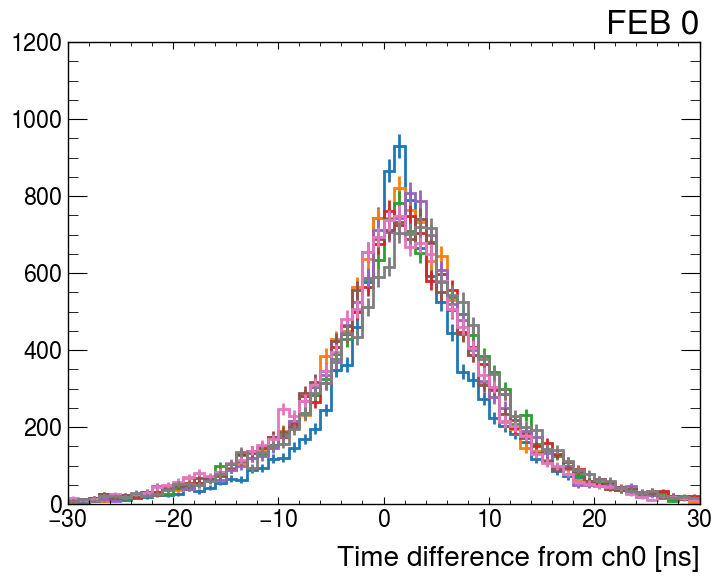

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


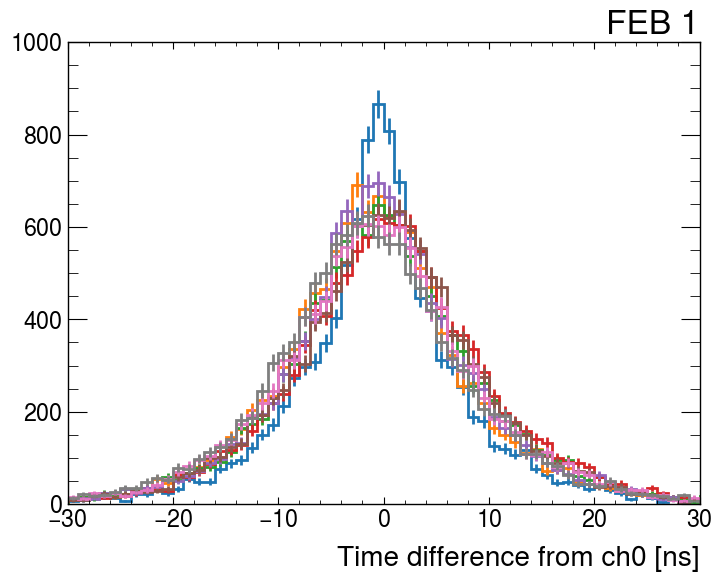

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


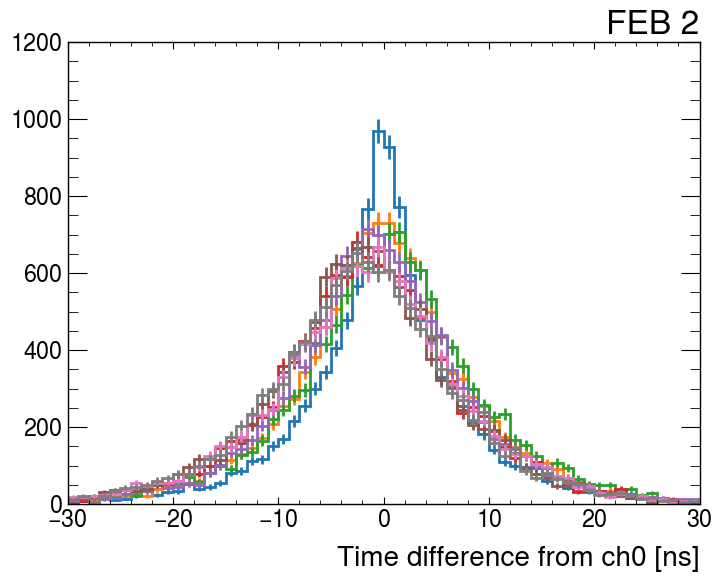

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


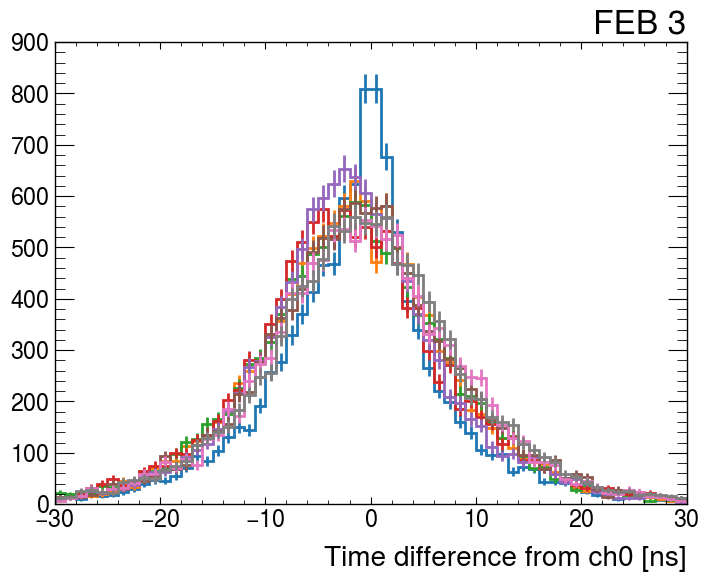

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


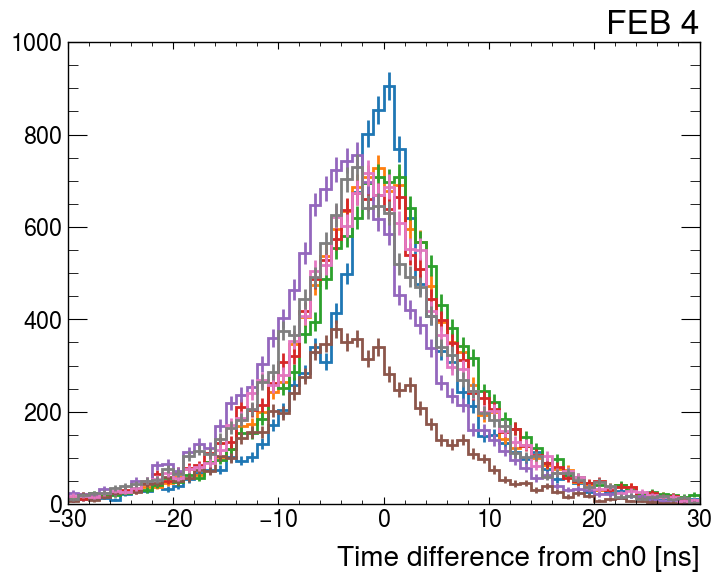

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


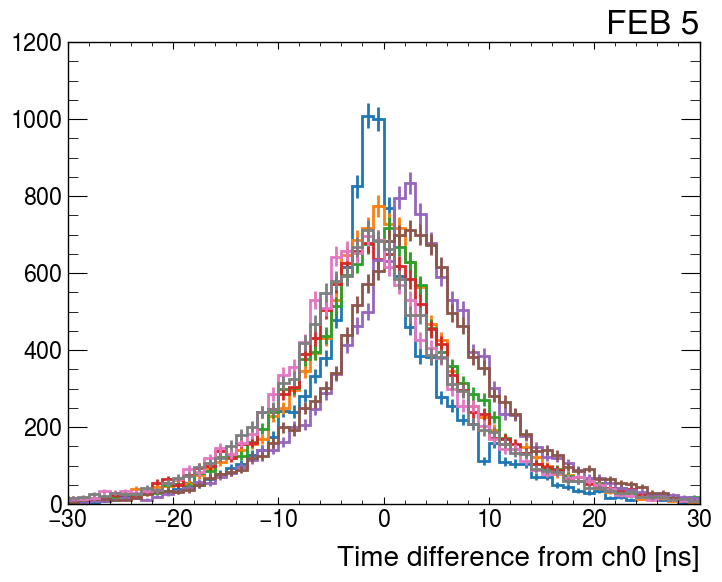

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


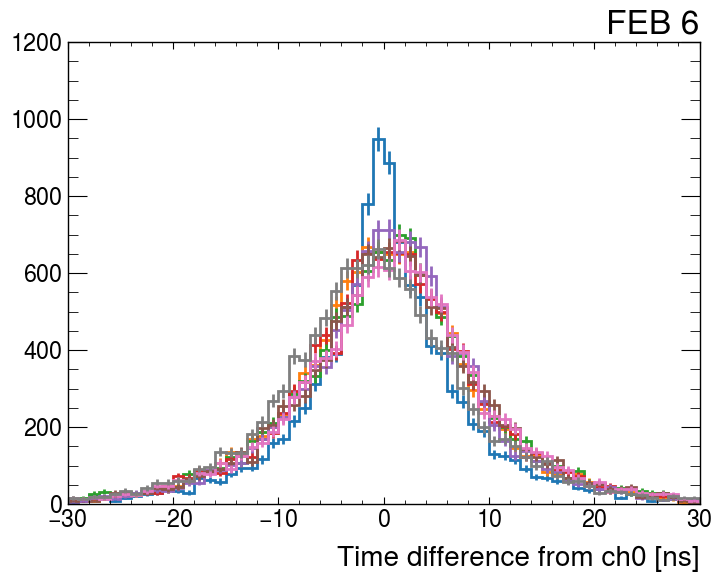

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


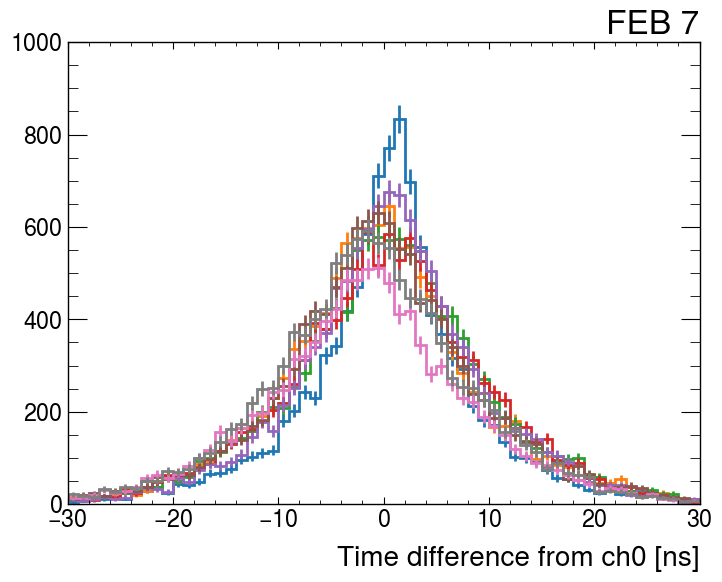

In [46]:
fig, ax = plt.subplots()
for AFE in range(8):
    d['FEB_0_AFE_{0}'.format(AFE)].plot1d(linewidth=2.0)#, label='FEB 0/4')
ax.set_xlabel('Time difference from ch0 [ns]')
ax.set_xlim(-30, 30)
ax.set_title('FEB 0', loc='right')
#ax.set_yscale('log')
ax.legend()
plt.show()

fig, ax = plt.subplots()
for AFE in range(8):
    d['FEB_1_AFE_{0}'.format(AFE)].plot1d(linewidth=2.0)#, label='FEB 0/4')
ax.set_xlabel('Time difference from ch0 [ns]')
ax.set_xlim(-30, 30)
ax.set_title('FEB 1', loc='right')
#ax.set_yscale('log')
ax.legend()
plt.show()

fig, ax = plt.subplots()
for AFE in range(8):
    d['FEB_2_AFE_{0}'.format(AFE)].plot1d(linewidth=2.0)#, label='FEB 0/4')
ax.set_xlabel('Time difference from ch0 [ns]')
ax.set_xlim(-30, 30)
ax.set_title('FEB 2', loc='right')
#ax.set_yscale('log')
ax.legend()
plt.show()

fig, ax = plt.subplots()
for AFE in range(8):
    d['FEB_3_AFE_{0}'.format(AFE)].plot1d(linewidth=2.0)#, label='FEB 0/4')
ax.set_xlabel('Time difference from ch0 [ns]')
ax.set_xlim(-30, 30)
ax.set_title('FEB 3', loc='right')
#ax.set_yscale('log')
ax.legend()
plt.show()

fig, ax = plt.subplots()
for AFE in range(8):
    d['FEB_4_AFE_{0}'.format(AFE)].plot1d(linewidth=2.0)#, label='FEB 0/4')
ax.set_xlabel('Time difference from ch0 [ns]')
ax.set_xlim(-30, 30)
ax.set_title('FEB 4', loc='right')
#ax.set_yscale('log')
ax.legend()
plt.show()

fig, ax = plt.subplots()
for AFE in range(8):
    d['FEB_5_AFE_{0}'.format(AFE)].plot1d(linewidth=2.0)#, label='FEB 0/4')
ax.set_xlabel('Time difference from ch0 [ns]')
ax.set_xlim(-30, 30)
ax.set_title('FEB 5', loc='right')
#ax.set_yscale('log')
ax.legend()
plt.show()

fig, ax = plt.subplots()
for AFE in range(8):
    d['FEB_6_AFE_{0}'.format(AFE)].plot1d(linewidth=2.0)#, label='FEB 0/4')
ax.set_xlabel('Time difference from ch0 [ns]')
ax.set_xlim(-30, 30)
ax.set_title('FEB 6', loc='right')
#ax.set_yscale('log')
ax.legend()
plt.show()

fig, ax = plt.subplots()
for AFE in range(8):
    d['FEB_7_AFE_{0}'.format(AFE)].plot1d(linewidth=2.0)#, label='FEB 0/4')
ax.set_xlabel('Time difference from ch0 [ns]')
ax.set_xlim(-30, 30)
ax.set_title('FEB 7', loc='right')
#ax.set_yscale('log')
ax.legend()
plt.show()

In [41]:
runs = [2072]#, 2075]
processor = wideband.DataProcessor(treename='run', runlist=runs, userunlist=True, remove=False,fixtimes=True)
filelist = processor.getFilelist(DATASET, root_schema=True)
filelist = ["{}{}".format(i, ":run") for i in filelist]

varlist = ['PEs','time','fitStatus','LEtime',
           'subrunNumber','spillNumber','eventNumber']

hd = Hist(hist.axis.Regular(bins=600, start=0, stop=600, name="position"))
ht = Hist(hist.axis.Regular(bins=200, start=-100, stop=100, name="time"))

ht0_2072 = Hist(hist.axis.Regular(bins=250, start=700, stop=1700, name="time"))

counter = 0

for idx, filename in enumerate(filelist):
    print(filename)
    with uproot.open(filename) as file:
        for ar in file.iterate(step_size="10MB", 
                               filter_name=varlist, 
                               report=False, library='ak'):
            ar['PEs'] = ak.where(ar['PEs'] >= 20, ar['PEs'], 0) # much more strict cut
            ar['hits'] = ak.where(ar['PEs'] > 0, 1, 0)
            ar = ar[(ak.sum(ar['hits'][:,0,0:64], axis=-1) > 50) & (ak.sum(ar['hits'][:,4,0:64], axis=-1) > 50)]
            if len(ar['eventNumber']) > 0:
                for i in range(len(ar['eventNumber'])):
                    for chan in range(64):
                        if ar['PEs'][i,0,chan] > 0 and ar['fitStatus'][i,0,chan] == 1:
                            ht0_2072.fill(ar['time'][i,0,chan])

            else:
                continue

root://fndcadoor.fnal.gov:1094/mu2e/tape/phy-rec/rec/mu2e/CRV_wideband_cosmics/CRVWB-000-008-000/root/d0/6e/rec.mu2e.CRV_wideband_cosmics.CRVWB-000-008-000.002072_000.root:run
root://fndcadoor.fnal.gov:1094/mu2e/tape/phy-rec/rec/mu2e/CRV_wideband_cosmics/CRVWB-000-008-000/root/62/c9/rec.mu2e.CRV_wideband_cosmics.CRVWB-000-008-000.002072_001.root:run
root://fndcadoor.fnal.gov:1094/mu2e/tape/phy-rec/rec/mu2e/CRV_wideband_cosmics/CRVWB-000-008-000/root/7f/d8/rec.mu2e.CRV_wideband_cosmics.CRVWB-000-008-000.002072_002.root:run
root://fndcadoor.fnal.gov:1094/mu2e/tape/phy-rec/rec/mu2e/CRV_wideband_cosmics/CRVWB-000-008-000/root/af/2b/rec.mu2e.CRV_wideband_cosmics.CRVWB-000-008-000.002072_003.root:run
root://fndcadoor.fnal.gov:1094/mu2e/tape/phy-rec/rec/mu2e/CRV_wideband_cosmics/CRVWB-000-008-000/root/e0/f4/rec.mu2e.CRV_wideband_cosmics.CRVWB-000-008-000.002072_004.root:run
root://fndcadoor.fnal.gov:1094/mu2e/tape/phy-rec/rec/mu2e/CRV_wideband_cosmics/CRVWB-000-008-000/root/a0/2f/rec.mu2e.CRV

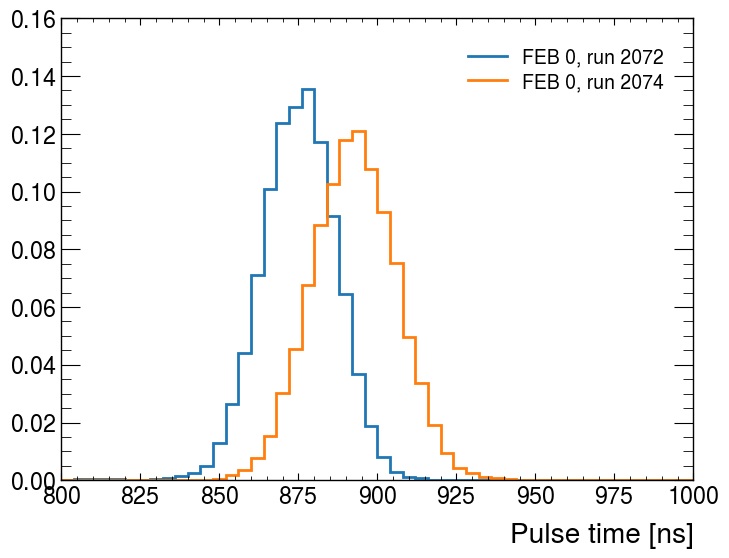

In [44]:
ht0_2072_norm = ht0_2072/ht0_2072.sum()
ht0_2074_norm = ht0_2074/ht0_2074.sum()

fig, ax = plt.subplots()
ht0_2072_norm.plot1d(linewidth=2.0, label='FEB 0, run 2072')
ht0_2074_norm.plot1d(linewidth=2.0, label='FEB 0, run 2074')
ax.set_xlabel('Pulse time [ns]')
ax.set_xlim(800, 1000)
#ax.set_yscale('log')
ax.legend()
plt.show()

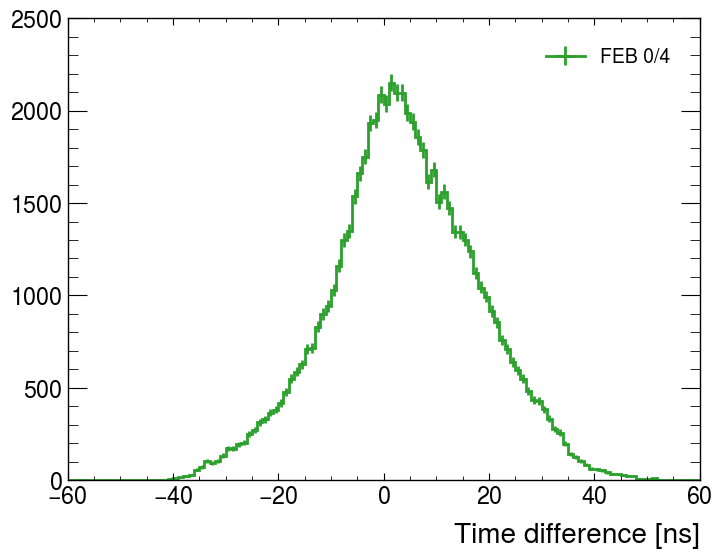

In [9]:
fig, ax = plt.subplots()
ht.plot1d(color='#2ca02c', linewidth=2.0, label='FEB 0/4')#: {0}c ± {1}c'.format(round(mean1,3), round(std1,3)))
ax.set_xlabel('Time difference [ns]')
ax.set_xlim(-60, 60)
#ax.set_yscale('log')
ax.legend()
plt.show()

0 5.25 13.607034148814215
1 4.613352545629203 13.665013292351034
2 5.106237816764133 13.027595545227518
3 4.635790494665374 12.951262416728007
4 2.0489078822412155 13.3655853248926
5 2.4174664107485606 13.335724829521572
6 2.6291866028708135 12.850988449262339
7 2.4145052833813643 12.8063006440803
8 3.4026036644165862 13.334837856014476
9 3.980806142034549 13.258471239884672
10 3.2020250723240116 13.384057851711622
11 3.919479267116683 13.277634943765689
12 4.447519083969466 13.463979140769304
13 3.968659594985535 13.270650160289645
14 4.221153846153846 13.201585518682998
15 3.5095785440613025 13.403690241232498
16 2.4272211720226844 13.003758218948374
17 3.783796740172579 12.893917648818935
18 2.9966248794599806 13.90209734865545
19 3.565196548418025 13.534359054248092
20 3.619431279620853 13.200062891519275
21 3.159695817490494 13.40741279211599
22 3.14922480620155 12.83115679392908
23 3.3554913294797686 12.905702302711983
24 14.756120527306967 13.032276866185866
25 16.94423260247855

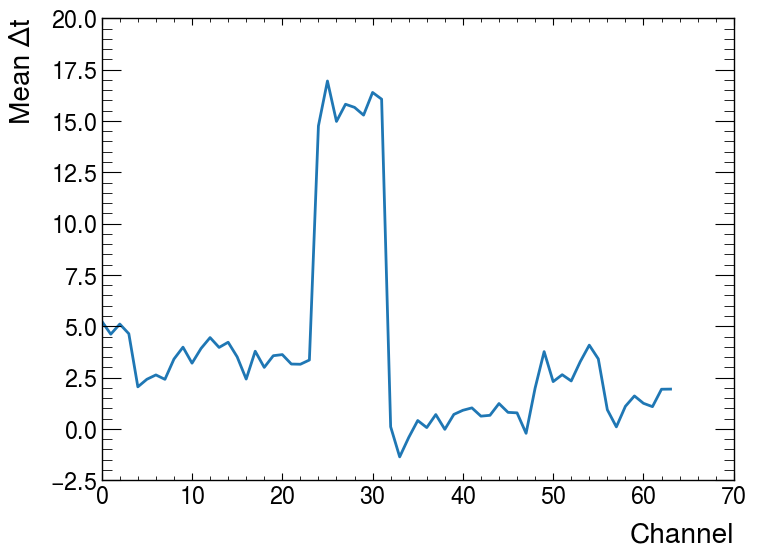

In [5]:
bins = np.linspace(-99.5, 99.5, 200)

chans = []
means = []

for chan in range(64):
    mean = 0
    std = 0
    h = d['hist_{0}'.format(chan)]
    for i, val in enumerate(h.values()):
        mean += bins[i]*val
    mean = mean/h.sum()
    chans.append(chan)
    means.append(mean)
    for i, val in enumerate(h.values()):
        std += val*(bins[i] - mean)**2
    std = np.sqrt(std/h.sum())
    print(chan, mean, std)

fig, ax = plt.subplots()
ax.plot(chans, means)
ax.set_xlabel('Channel')
ax.set_ylabel('Mean Δt')
plt.show()

In [22]:
runs = [2074]#, 2075]
processor = wideband.DataProcessor(treename='run', runlist=runs, userunlist=True, remove=False,fixtimes=True)
filelist = processor.getFilelist(DATASET, root_schema=True)
filelist = ["{}{}".format(i, ":run") for i in filelist]

varlist = ['PEs','time','fitStatus','LEtime',
           'subrunNumber','spillNumber','eventNumber']

ht0 = Hist(hist.axis.Regular(bins=250, start=700, stop=1700, name="time"))
ht02 = Hist(hist.axis.Regular(bins=200, start=800, stop=1000, name="time"))
ht1 = Hist(hist.axis.Regular(bins=250, start=700, stop=1700, name="time"))
ht12 = Hist(hist.axis.Regular(bins=200, start=800, stop=1000, name="time"))
ht2 = Hist(hist.axis.Regular(bins=250, start=700, stop=1700, name="time"))
ht3 = Hist(hist.axis.Regular(bins=250, start=700, stop=1700, name="time"))
ht4 = Hist(hist.axis.Regular(bins=250, start=700, stop=1700, name="time"))
ht5 = Hist(hist.axis.Regular(bins=250, start=700, stop=1700, name="time"))
ht6 = Hist(hist.axis.Regular(bins=250, start=700, stop=1700, name="time"))
ht7 = Hist(hist.axis.Regular(bins=250, start=700, stop=1700, name="time"))

counter = 0

for idx, filename in enumerate(filelist):
    print(filename)
    with uproot.open(filename) as file:
        for ar in file.iterate(step_size="10MB", 
                               filter_name=varlist, 
                               report=False, library='ak'):
            ar['PEs'] = ak.where(ar['PEs'] >= 20, ar['PEs'], 0) # much more strict cut
            ar['hits'] = ak.where(ar['PEs'] > 0, 1, 0)
            ar = ar[(ak.sum(ar['hits'][:,0,0:64], axis=-1) > 50) & (ak.sum(ar['hits'][:,4,0:64], axis=-1) > 50)]
            if len(ar['eventNumber']) > 0:
                for i in range(len(ar['eventNumber'])):
                    for chan in range(64):
                        if ar['PEs'][i,0,chan] > 0 and ar['fitStatus'][i,0,chan] == 1:
                            ht0.fill(ar['time'][i,0,chan])
                            ht02.fill(ar['time'][i,0,chan])
                        if ar['PEs'][i,1,chan] > 0 and ar['fitStatus'][i,1,chan] == 1:
                            ht1.fill(ar['time'][i,1,chan])
                            ht12.fill(ar['time'][i,1,chan])
                        if ar['PEs'][i,2,chan] > 0 and ar['fitStatus'][i,2,chan] == 1:
                            ht2.fill(ar['time'][i,2,chan])
                        if ar['PEs'][i,3,chan] > 0 and ar['fitStatus'][i,3,chan] == 1:
                            ht3.fill(ar['time'][i,3,chan])
                        if ar['PEs'][i,4,chan] > 0 and ar['fitStatus'][i,4,chan] == 1:
                            ht4.fill(ar['time'][i,4,chan])
                        if ar['PEs'][i,5,chan] > 0 and ar['fitStatus'][i,5,chan] == 1:
                            ht5.fill(ar['time'][i,5,chan])
                        if ar['PEs'][i,6,chan] > 0 and ar['fitStatus'][i,6,chan] == 1:
                            ht6.fill(ar['time'][i,6,chan])
                        if ar['PEs'][i,7,chan] > 0 and ar['fitStatus'][i,7,chan] == 1:
                            ht7.fill(ar['time'][i,7,chan])

            else:
                continue

root://fndcadoor.fnal.gov:1094/mu2e/tape/phy-rec/rec/mu2e/CRV_wideband_cosmics/CRVWB-000-008-000/root/1e/fc/rec.mu2e.CRV_wideband_cosmics.CRVWB-000-008-000.002074_000.root:run
root://fndcadoor.fnal.gov:1094/mu2e/tape/phy-rec/rec/mu2e/CRV_wideband_cosmics/CRVWB-000-008-000/root/37/2c/rec.mu2e.CRV_wideband_cosmics.CRVWB-000-008-000.002074_001.root:run
root://fndcadoor.fnal.gov:1094/mu2e/tape/phy-rec/rec/mu2e/CRV_wideband_cosmics/CRVWB-000-008-000/root/e0/27/rec.mu2e.CRV_wideband_cosmics.CRVWB-000-008-000.002074_002.root:run
root://fndcadoor.fnal.gov:1094/mu2e/tape/phy-rec/rec/mu2e/CRV_wideband_cosmics/CRVWB-000-008-000/root/98/07/rec.mu2e.CRV_wideband_cosmics.CRVWB-000-008-000.002074_003.root:run
root://fndcadoor.fnal.gov:1094/mu2e/tape/phy-rec/rec/mu2e/CRV_wideband_cosmics/CRVWB-000-008-000/root/98/42/rec.mu2e.CRV_wideband_cosmics.CRVWB-000-008-000.002074_004.root:run
root://fndcadoor.fnal.gov:1094/mu2e/tape/phy-rec/rec/mu2e/CRV_wideband_cosmics/CRVWB-000-008-000/root/1c/cc/rec.mu2e.CRV

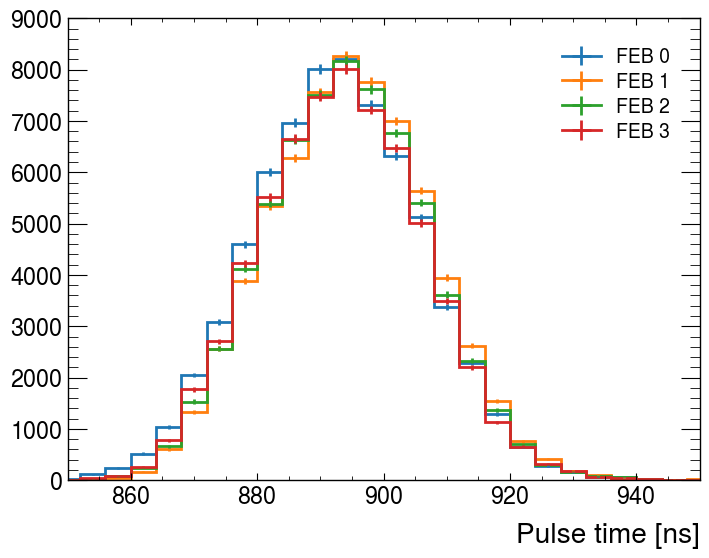

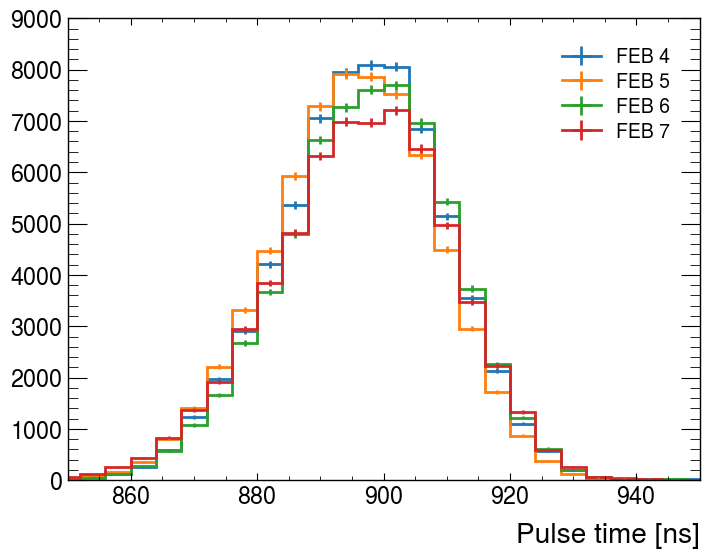

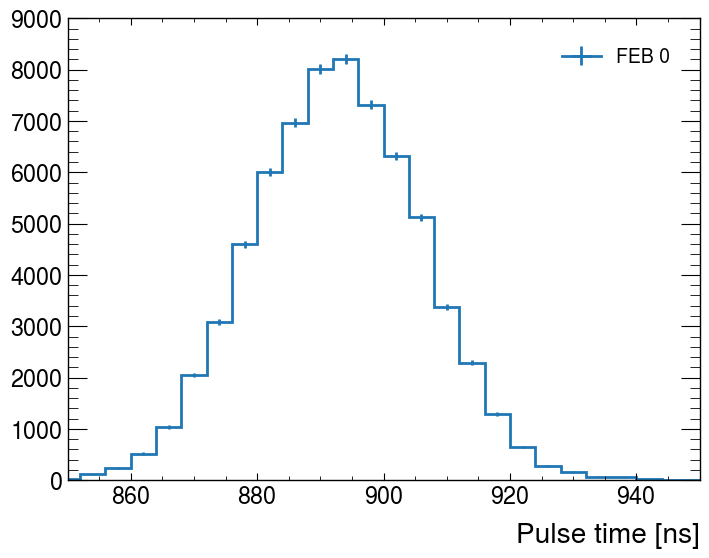

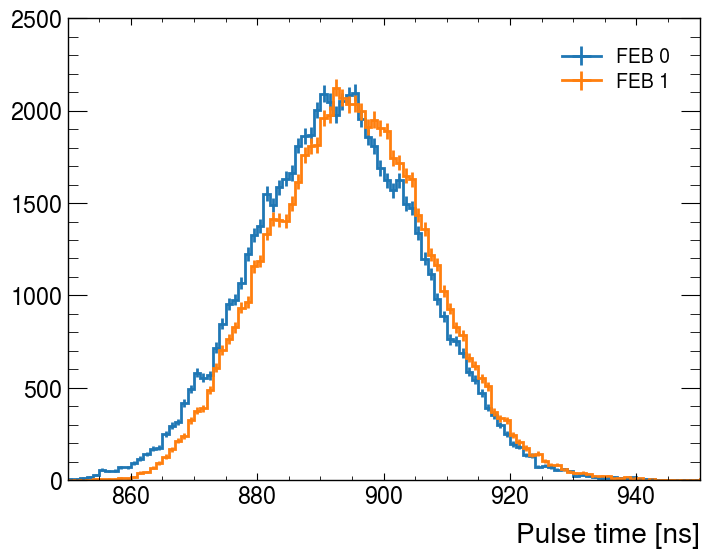

In [23]:
fig, ax = plt.subplots()
ht0.plot1d(linewidth=2.0, label='FEB 0')
ht1.plot1d(linewidth=2.0, label='FEB 1')
ht2.plot1d(linewidth=2.0, label='FEB 2')
ht3.plot1d(linewidth=2.0, label='FEB 3')
#ht4.plot1d(linewidth=2.0, label='FEB 4')
#ht5.plot1d(linewidth=2.0, label='FEB 5')
#ht6.plot1d(linewidth=2.0, label='FEB 6')
#ht7.plot1d(linewidth=2.0, label='FEB 7')
ax.set_xlabel('Pulse time [ns]')
ax.set_xlim(850, 950)
#ax.set_yscale('log')
ax.legend()
plt.show()

fig, ax = plt.subplots()
ht4.plot1d(linewidth=2.0, label='FEB 4')
ht5.plot1d(linewidth=2.0, label='FEB 5')
ht6.plot1d(linewidth=2.0, label='FEB 6')
ht7.plot1d(linewidth=2.0, label='FEB 7')
ax.set_xlabel('Pulse time [ns]')
ax.set_xlim(850, 950)
#ax.set_yscale('log')
ax.legend()
plt.show()

fig, ax = plt.subplots()
ht0.plot1d(linewidth=2.0, label='FEB 0')
#ht1.plot1d(linewidth=2.0, label='FEB 1')
ax.set_xlabel('Pulse time [ns]')
ax.set_xlim(850, 950)
#ax.set_yscale('log')
ax.legend()
plt.show()

fig, ax = plt.subplots()
ht02.plot1d(linewidth=2.0, label='FEB 0')
ht12.plot1d(linewidth=2.0, label='FEB 1')
ax.set_xlabel('Pulse time [ns]')
ax.set_xlim(850, 950)
#ax.set_yscale('log')
ax.legend()
plt.show()

In [7]:
runs = [2074, 2075]
processor = wideband.DataProcessor(treename='run', runlist=runs, userunlist=True, remove=False,fixtimes=True)
filelist = processor.getFilelist(DATASET, root_schema=True)
filelist = ["{}{}".format(i, ":run") for i in filelist]

varlist = ['PEs','time','fitStatus','LEtime',
           'subrunNumber','spillNumber','eventNumber']

ht01 = Hist(hist.axis.Regular(bins=200, start=-100, stop=100, name="time"))
ht02 = Hist(hist.axis.Regular(bins=200, start=-100, stop=100, name="time"))
ht03 = Hist(hist.axis.Regular(bins=200, start=-100, stop=100, name="time"))

d = {}
for chan in range(64):
    d['h01_{0}'.format(chan)] = Hist(hist.axis.Regular(bins=200, start=-100, stop=100, name="time"))
    d['h02_{0}'.format(chan)] = Hist(hist.axis.Regular(bins=200, start=-100, stop=100, name="time"))
    d['h03_{0}'.format(chan)] = Hist(hist.axis.Regular(bins=200, start=-100, stop=100, name="time"))


counter = 0

for idx, filename in enumerate(filelist):
    print(filename)
    with uproot.open(filename) as file:
        for ar in file.iterate(step_size="10MB", 
                               filter_name=varlist, 
                               report=False, library='ak'):
            ar['PEs'] = ak.where(ar['PEs'] >= 20, ar['PEs'], 0) # much more strict cut
            ar['hits'] = ak.where(ar['PEs'] > 0, 1, 0)
            ar = ar[(ak.sum(ar['hits'][:,0,0:64], axis=-1) > 50)]
            ar['timediff01'] = np.subtract(ar['time'][:,1,:], ar['time'][:,0,:])
            ar['timediff02'] = np.subtract(ar['time'][:,2,:], ar['time'][:,0,:])
            ar['timediff03'] = np.subtract(ar['time'][:,3,:], ar['time'][:,0,:])
            if len(ar['timediff01']) > 0:
                for i in range(len(ar['timediff01'])):
                    for chan in range(64):
                        if ar['PEs'][i,0,chan] > 0 and ar['PEs'][i,1,chan] > 0:
                            if ar['fitStatus'][i,0,chan] == 1 and ar['fitStatus'][i,1,chan] == 1:
                                d['h01_{0}'.format(chan)].fill(ar['timediff01'][i][chan])
                                ht01.fill(ar['timediff01'][i][chan])
            if len(ar['timediff02']) > 0:
                for i in range(len(ar['timediff02'])):
                    for chan in range(64):
                        if ar['PEs'][i,0,chan] > 0 and ar['PEs'][i,2,chan] > 0:
                            if ar['fitStatus'][i,0,chan] == 1 and ar['fitStatus'][i,2,chan] == 1:
                                d['h02_{0}'.format(chan)].fill(ar['timediff02'][i][chan])
                                ht02.fill(ar['timediff02'][i][chan])
            if len(ar['timediff03']) > 0:
                for i in range(len(ar['timediff03'])):
                    for chan in range(64):
                        if ar['PEs'][i,0,chan] > 0 and ar['PEs'][i,3,chan] > 0:
                            if ar['fitStatus'][i,0,chan] == 1 and ar['fitStatus'][i,3,chan] == 1:
                                d['h03_{0}'.format(chan)].fill(ar['timediff03'][i][chan])
                                ht03.fill(ar['timediff03'][i][chan])

            else:
                continue

root://fndcadoor.fnal.gov:1094/mu2e/tape/phy-rec/rec/mu2e/CRV_wideband_cosmics/CRVWB-000-008-000/root/1e/fc/rec.mu2e.CRV_wideband_cosmics.CRVWB-000-008-000.002074_000.root:run
root://fndcadoor.fnal.gov:1094/mu2e/tape/phy-rec/rec/mu2e/CRV_wideband_cosmics/CRVWB-000-008-000/root/37/2c/rec.mu2e.CRV_wideband_cosmics.CRVWB-000-008-000.002074_001.root:run
root://fndcadoor.fnal.gov:1094/mu2e/tape/phy-rec/rec/mu2e/CRV_wideband_cosmics/CRVWB-000-008-000/root/e0/27/rec.mu2e.CRV_wideband_cosmics.CRVWB-000-008-000.002074_002.root:run
root://fndcadoor.fnal.gov:1094/mu2e/tape/phy-rec/rec/mu2e/CRV_wideband_cosmics/CRVWB-000-008-000/root/98/07/rec.mu2e.CRV_wideband_cosmics.CRVWB-000-008-000.002074_003.root:run
root://fndcadoor.fnal.gov:1094/mu2e/tape/phy-rec/rec/mu2e/CRV_wideband_cosmics/CRVWB-000-008-000/root/98/42/rec.mu2e.CRV_wideband_cosmics.CRVWB-000-008-000.002074_004.root:run
root://fndcadoor.fnal.gov:1094/mu2e/tape/phy-rec/rec/mu2e/CRV_wideband_cosmics/CRVWB-000-008-000/root/1c/cc/rec.mu2e.CRV

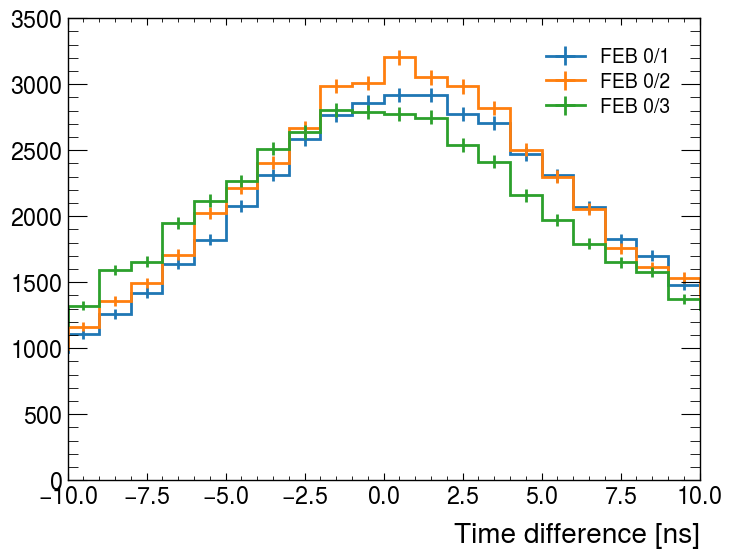

In [9]:
fig, ax = plt.subplots()
ht01.plot1d(linewidth=2.0, label='FEB 0/1')
ht02.plot1d(linewidth=2.0, label='FEB 0/2')
ht03.plot1d(linewidth=2.0, label='FEB 0/3')
ax.set_xlabel('Time difference [ns]')
ax.set_xlim(-10, 10)
ax.legend()
plt.show()

root://fndcadoor.fnal.gov:1094/mu2e/tape/phy-rec/rec/mu2e/CRV_wideband_cosmics-noadc/CRVWB-000-008-000/root/93/8d/rec.mu2e.CRV_wideband_cosmics-noadc.CRVWB-000-008-000.001720_000.root:run


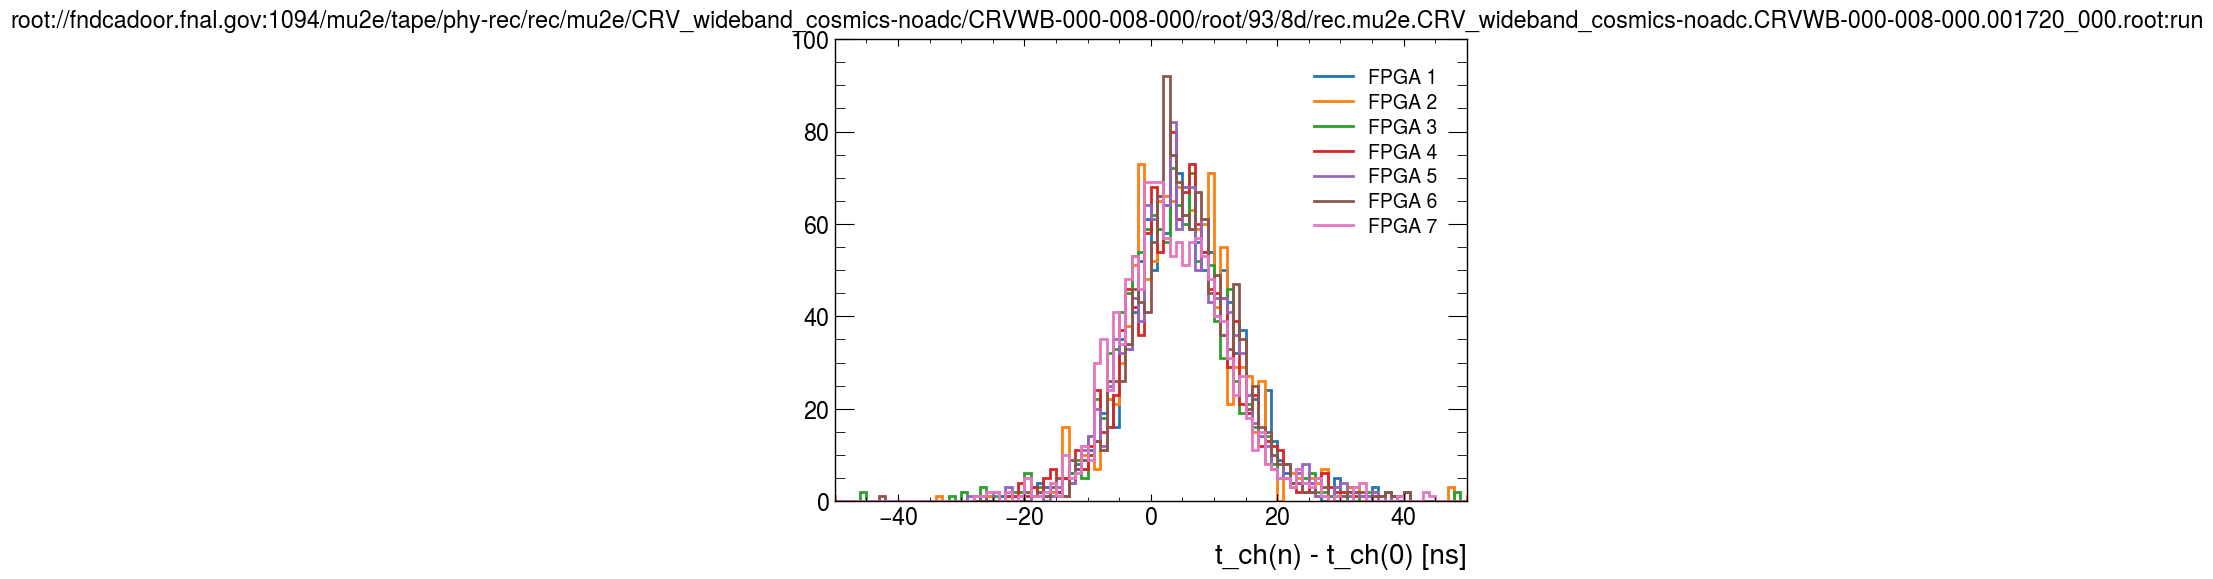

root://fndcadoor.fnal.gov:1094/mu2e/tape/phy-rec/rec/mu2e/CRV_wideband_cosmics-noadc/CRVWB-000-008-000/root/20/6c/rec.mu2e.CRV_wideband_cosmics-noadc.CRVWB-000-008-000.001721_000.root:run


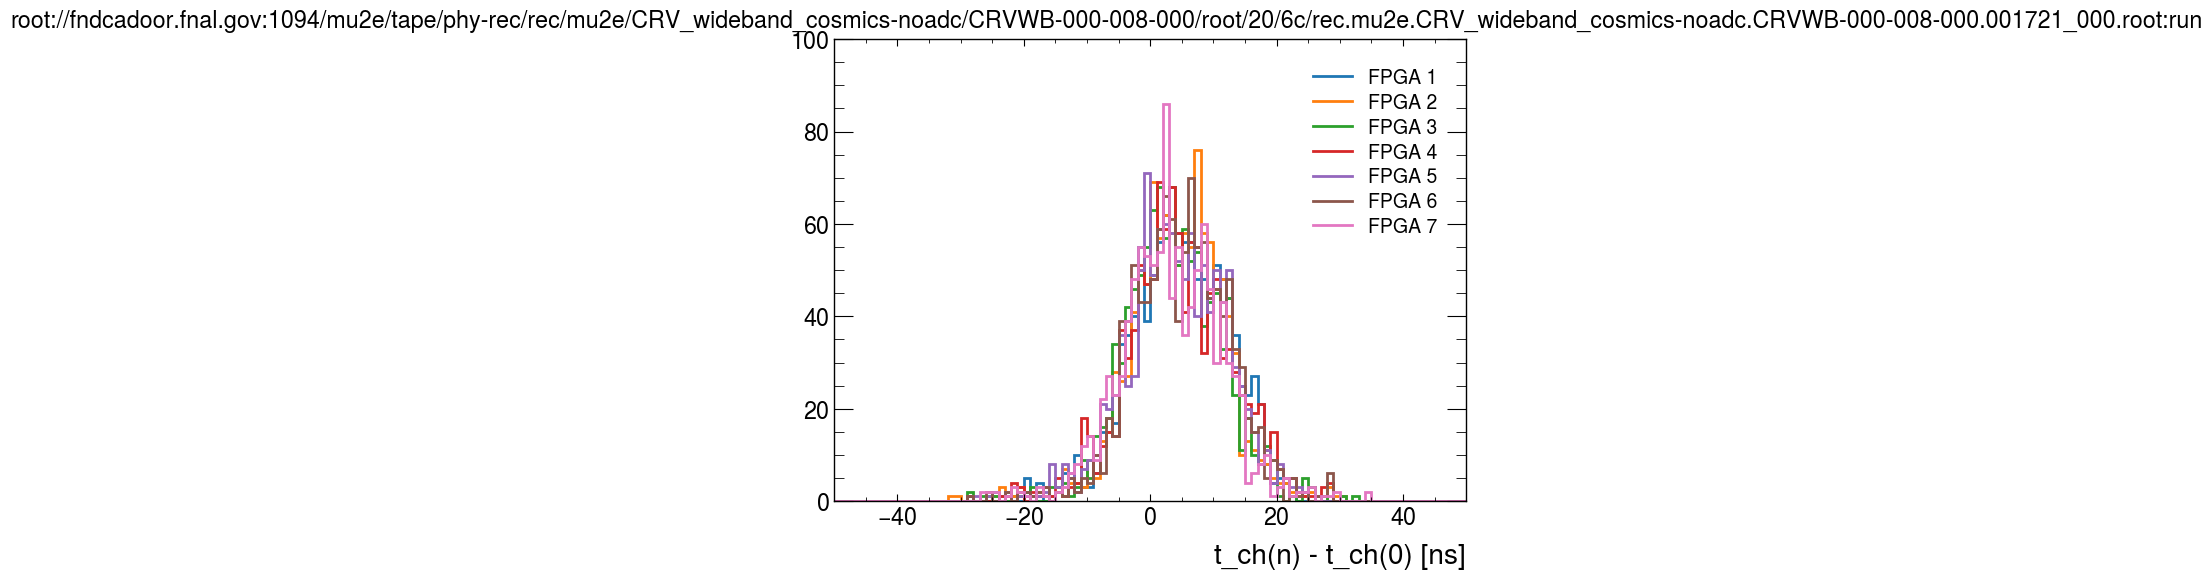

root://fndcadoor.fnal.gov:1094/mu2e/tape/phy-rec/rec/mu2e/CRV_wideband_cosmics-noadc/CRVWB-000-008-000/root/bc/49/rec.mu2e.CRV_wideband_cosmics-noadc.CRVWB-000-008-000.001721_001.root:run


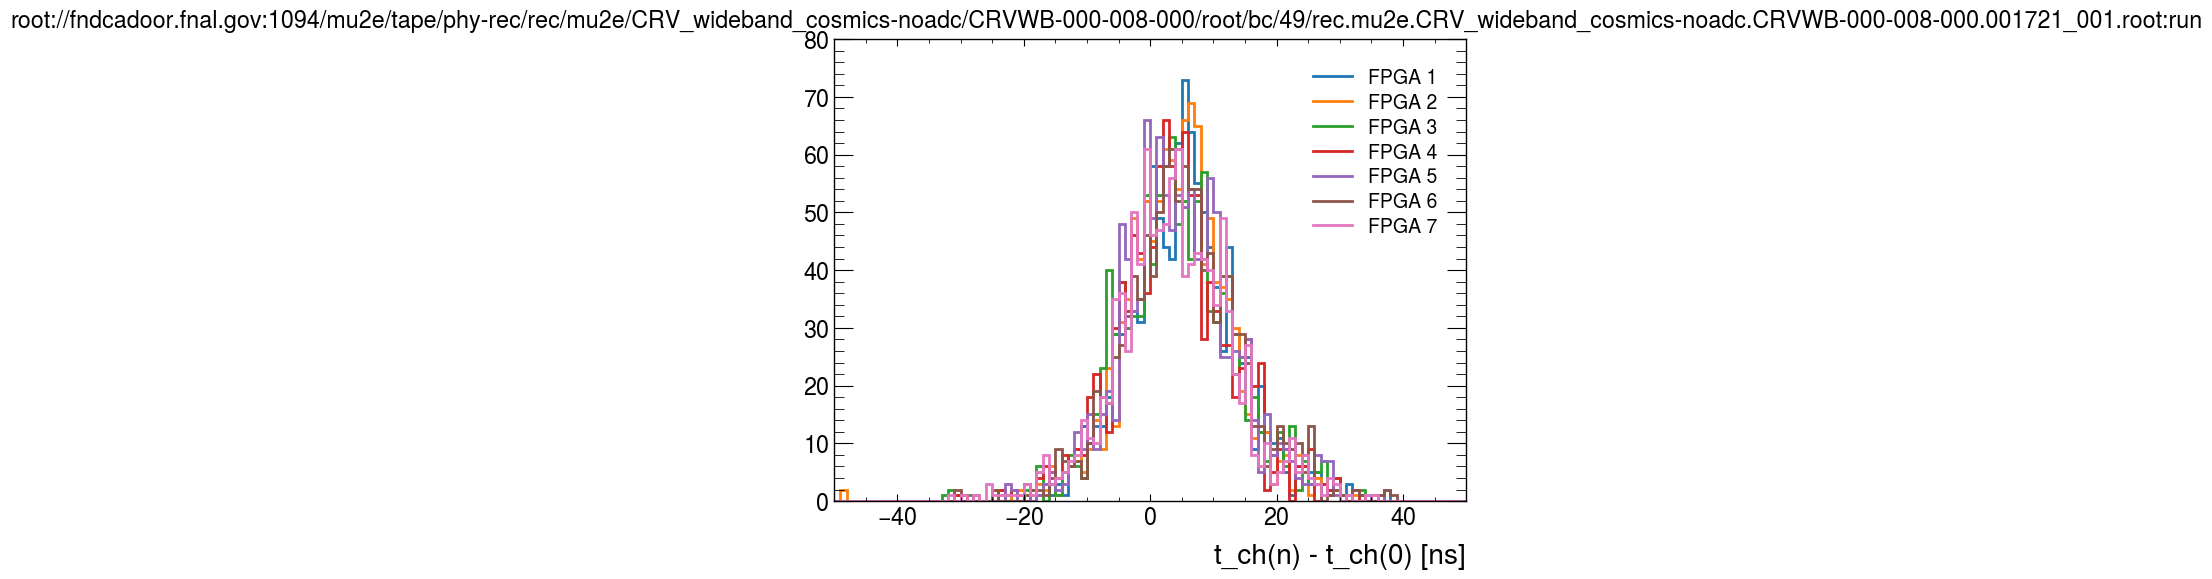

root://fndcadoor.fnal.gov:1094/mu2e/tape/phy-rec/rec/mu2e/CRV_wideband_cosmics-noadc/CRVWB-000-008-000/root/9f/fb/rec.mu2e.CRV_wideband_cosmics-noadc.CRVWB-000-008-000.001722_000.root:run


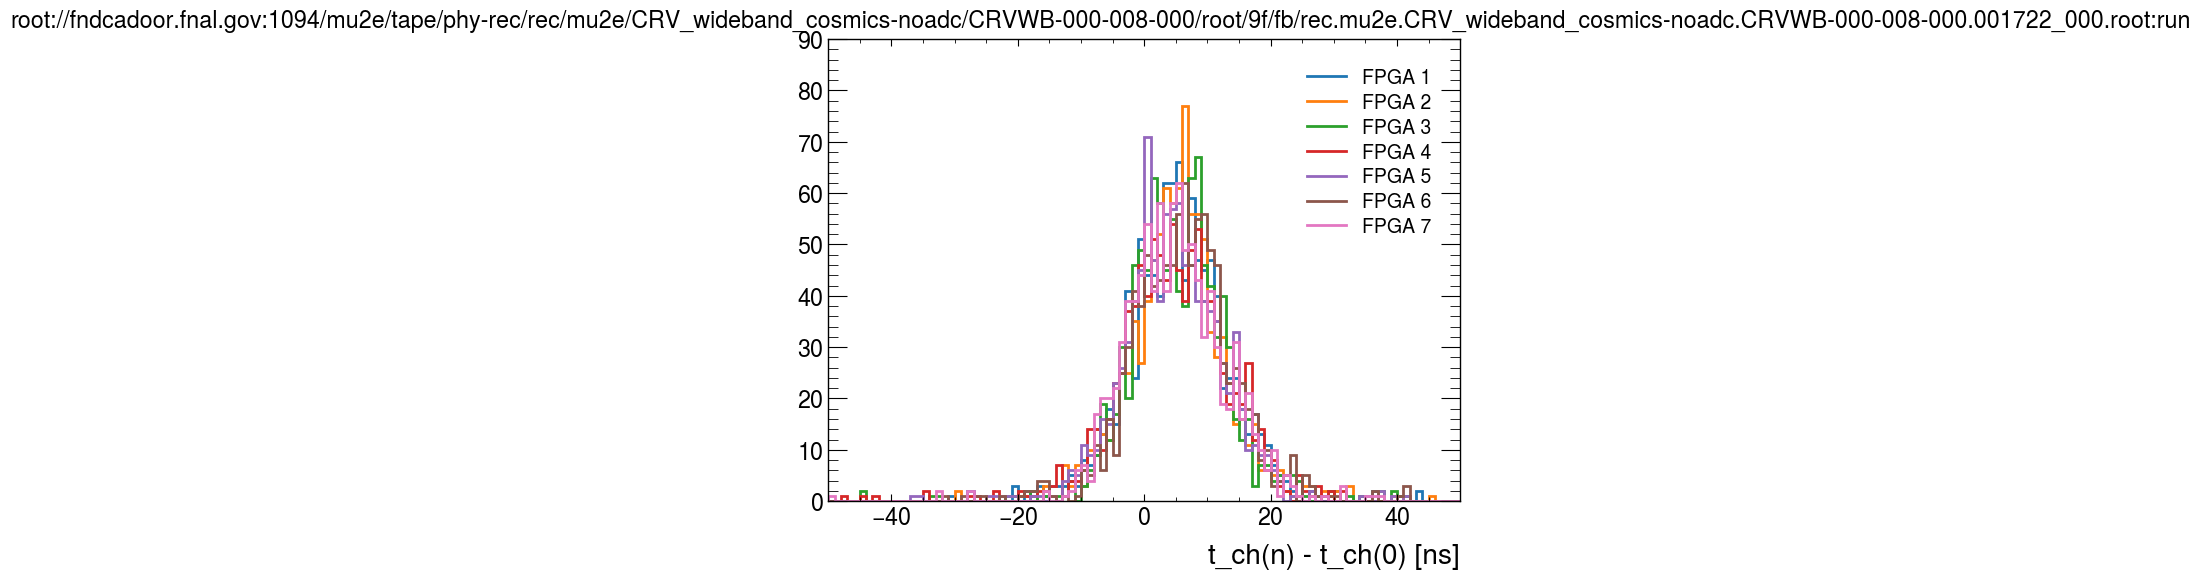

root://fndcadoor.fnal.gov:1094/mu2e/tape/phy-rec/rec/mu2e/CRV_wideband_cosmics-noadc/CRVWB-000-008-000/root/70/2e/rec.mu2e.CRV_wideband_cosmics-noadc.CRVWB-000-008-000.001723_000.root:run


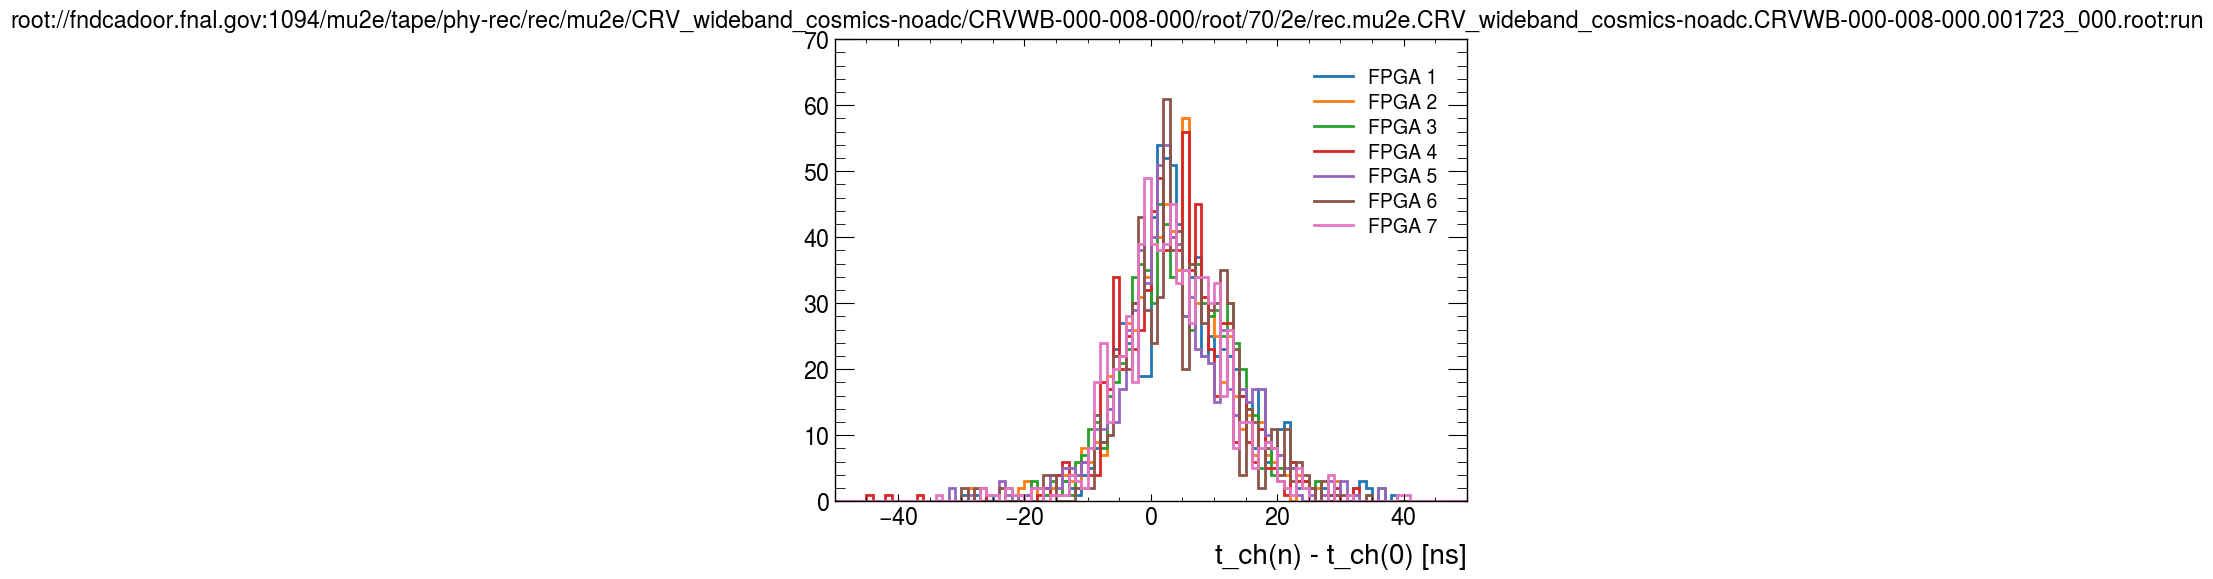

root://fndcadoor.fnal.gov:1094/mu2e/tape/phy-rec/rec/mu2e/CRV_wideband_cosmics-noadc/CRVWB-000-008-000/root/4b/b9/rec.mu2e.CRV_wideband_cosmics-noadc.CRVWB-000-008-000.001724_000.root:run


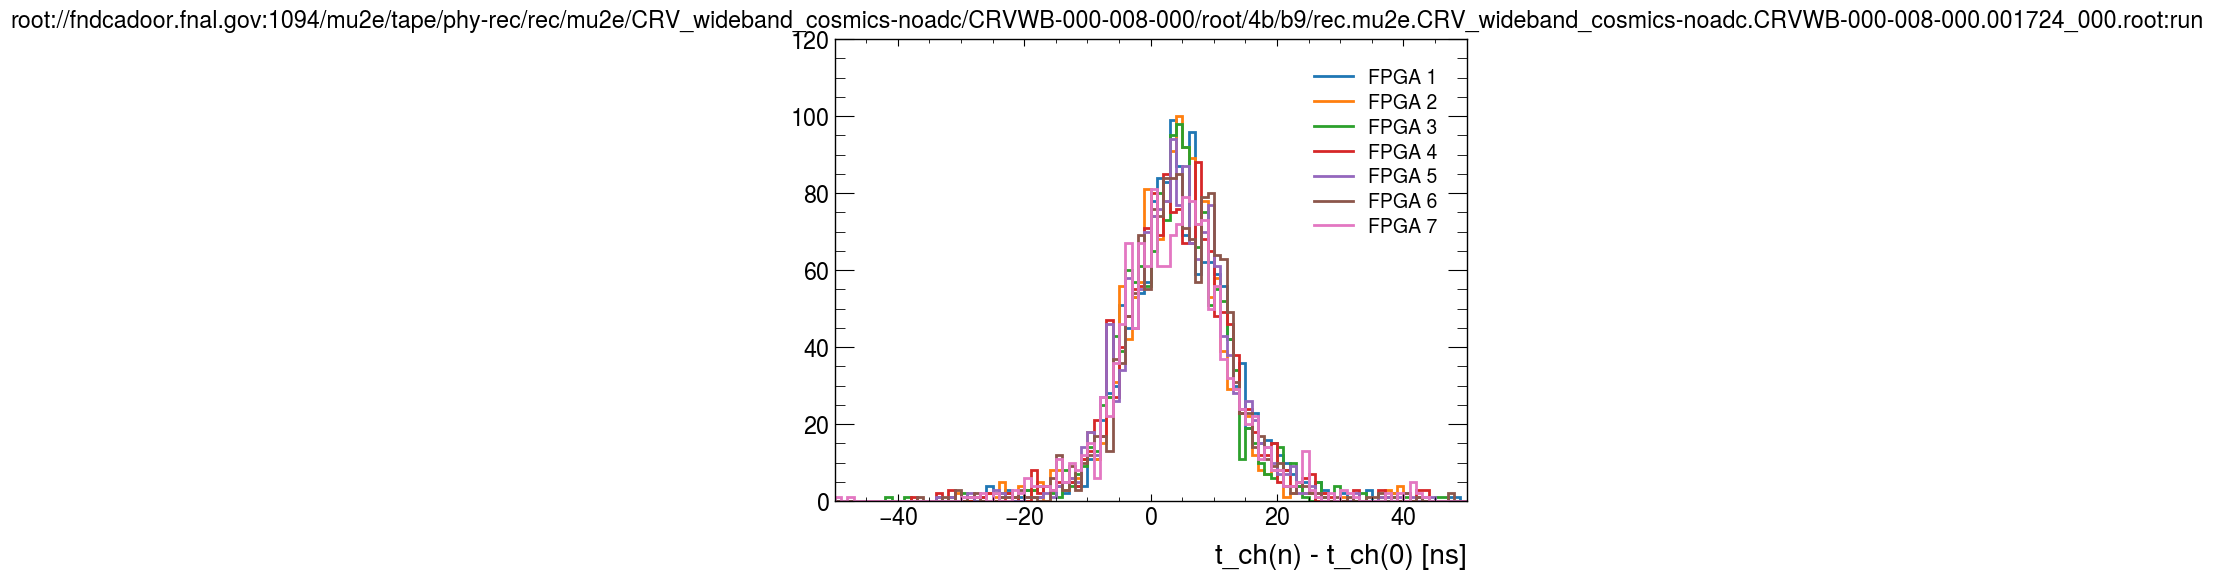

root://fndcadoor.fnal.gov:1094/mu2e/tape/phy-rec/rec/mu2e/CRV_wideband_cosmics-noadc/CRVWB-000-008-000/root/ca/b6/rec.mu2e.CRV_wideband_cosmics-noadc.CRVWB-000-008-000.001724_001.root:run


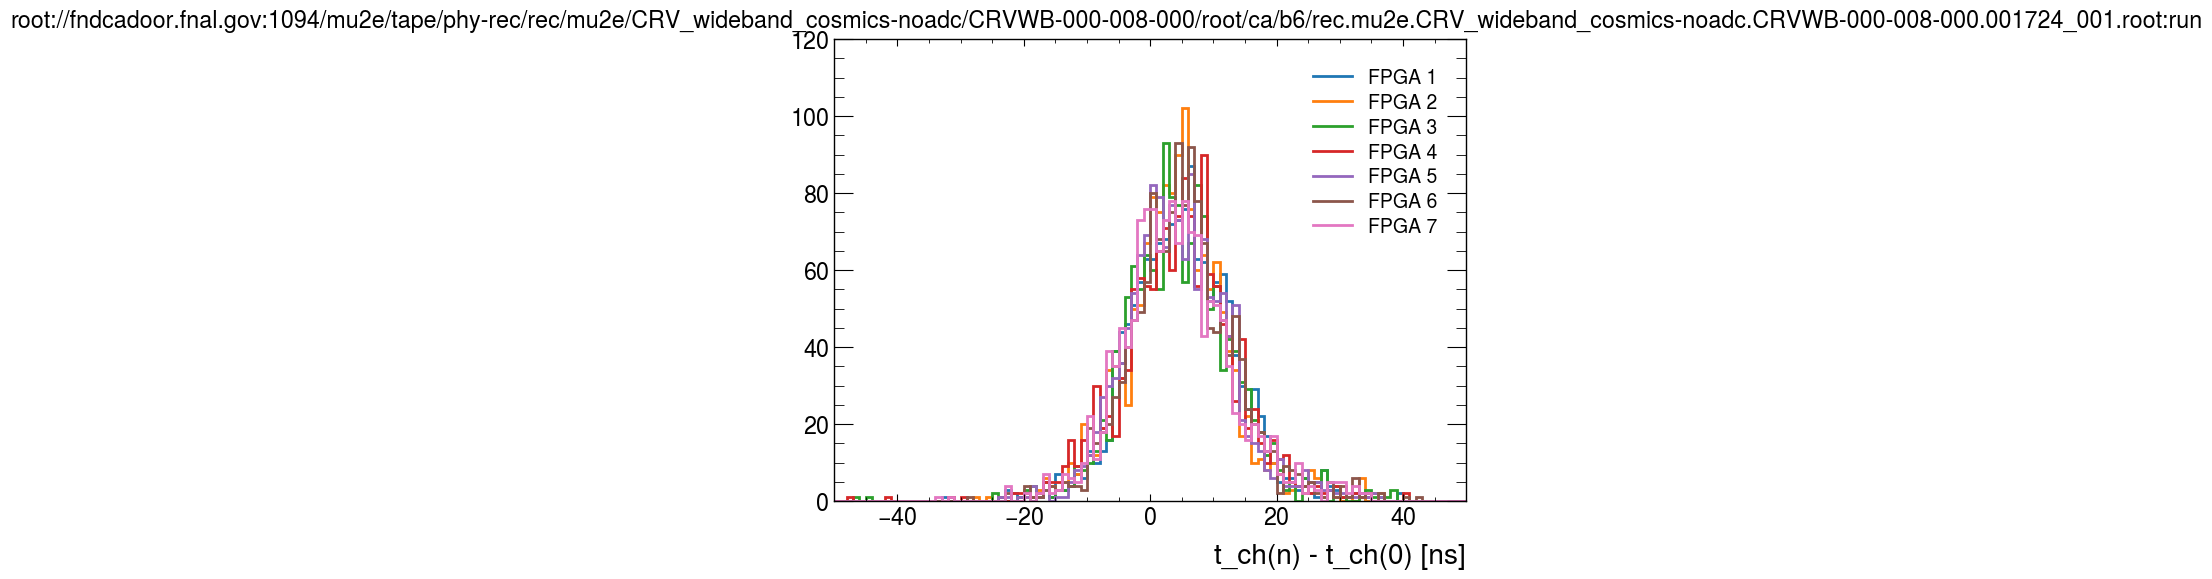

root://fndcadoor.fnal.gov:1094/mu2e/tape/phy-rec/rec/mu2e/CRV_wideband_cosmics-noadc/CRVWB-000-008-000/root/47/9b/rec.mu2e.CRV_wideband_cosmics-noadc.CRVWB-000-008-000.001724_002.root:run


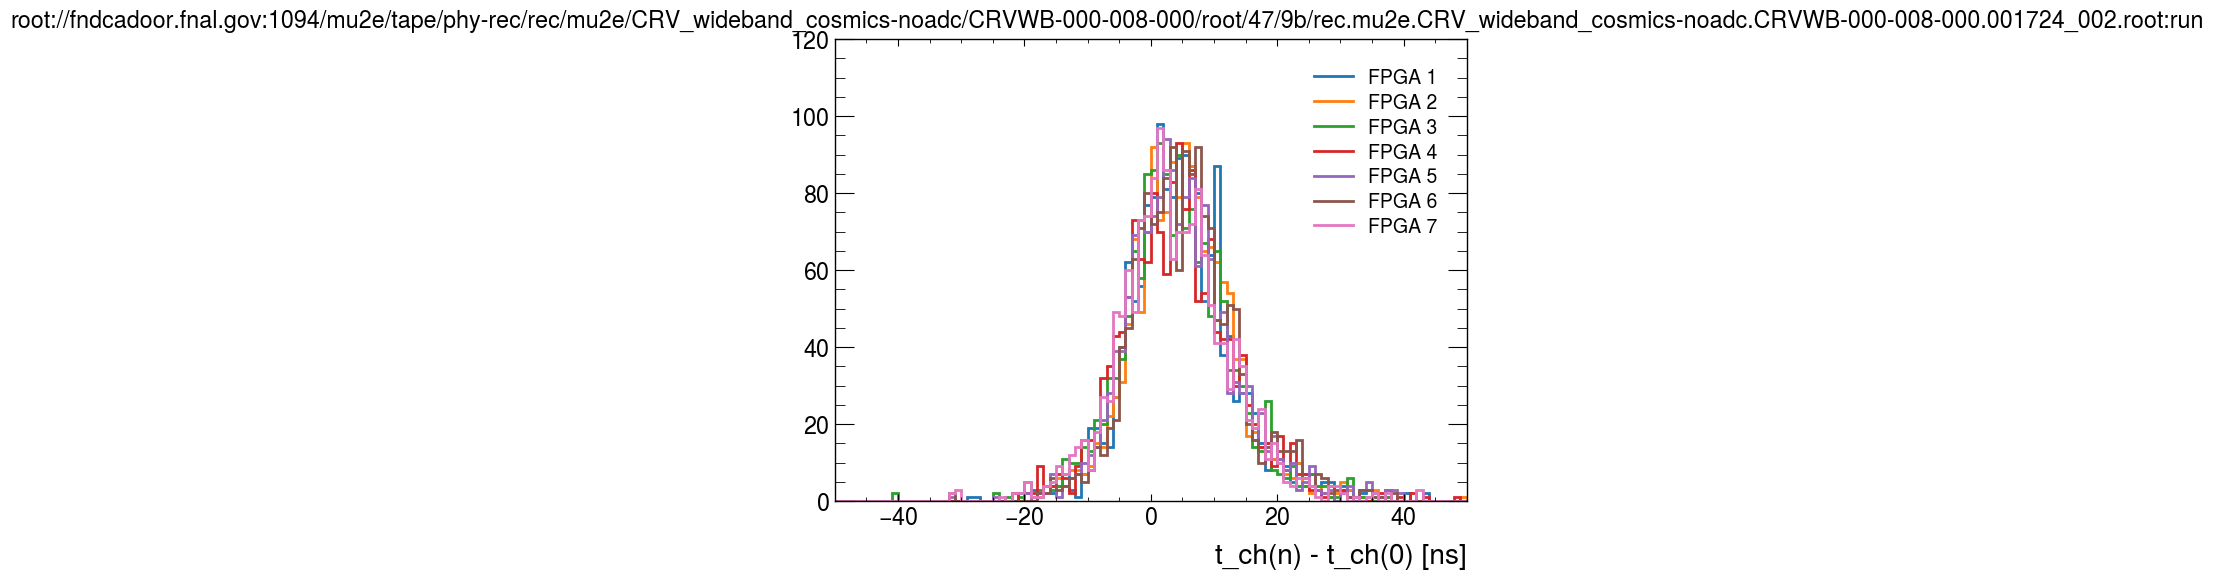

root://fndcadoor.fnal.gov:1094/mu2e/tape/phy-rec/rec/mu2e/CRV_wideband_cosmics-noadc/CRVWB-000-008-000/root/a2/b2/rec.mu2e.CRV_wideband_cosmics-noadc.CRVWB-000-008-000.001727_000.root:run


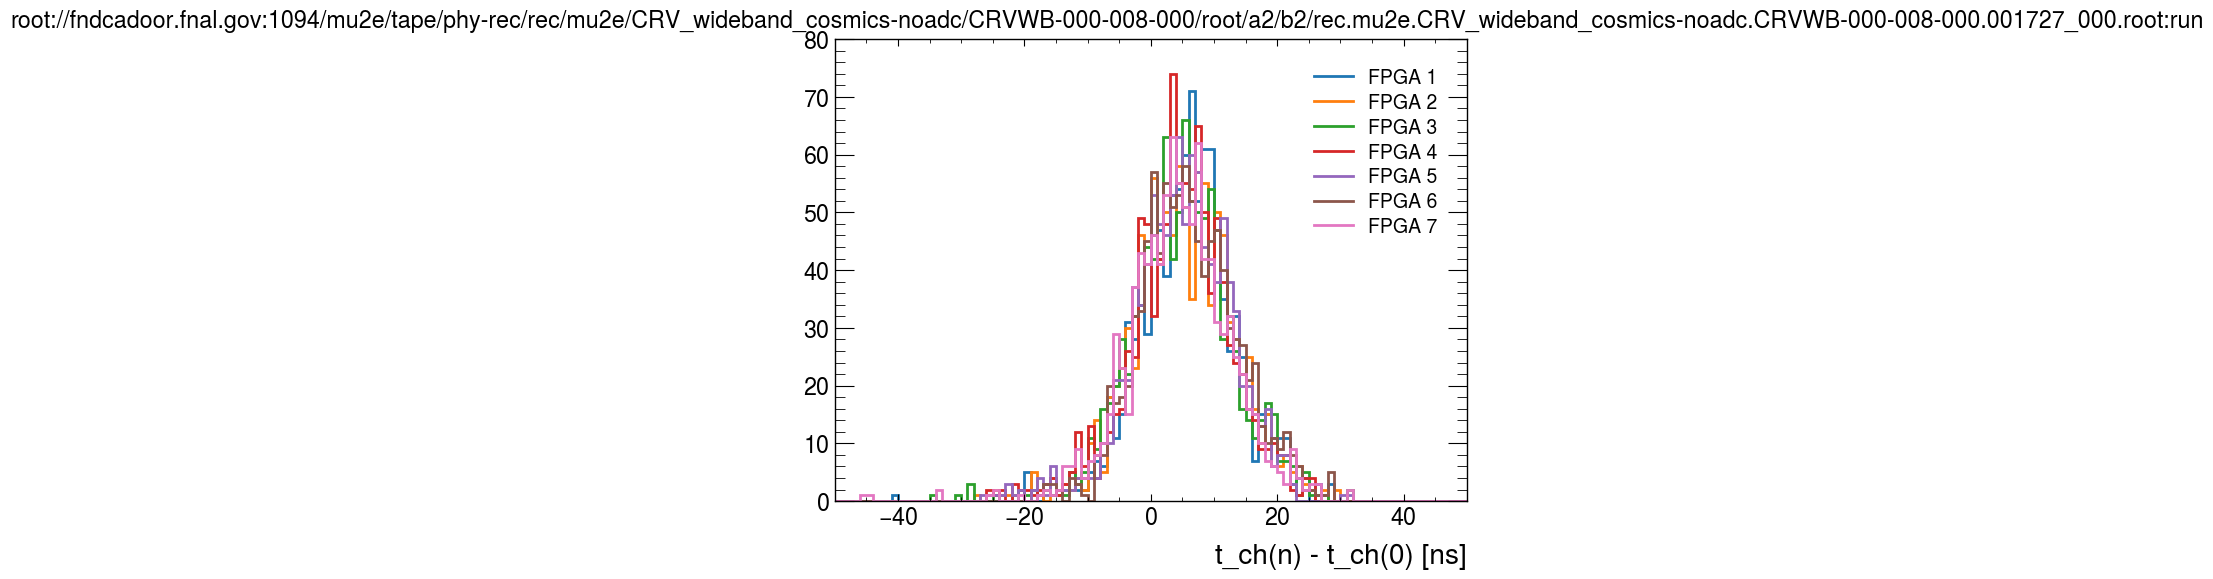

root://fndcadoor.fnal.gov:1094/mu2e/tape/phy-rec/rec/mu2e/CRV_wideband_cosmics-noadc/CRVWB-000-008-000/root/0c/4d/rec.mu2e.CRV_wideband_cosmics-noadc.CRVWB-000-008-000.001728_000.root:run


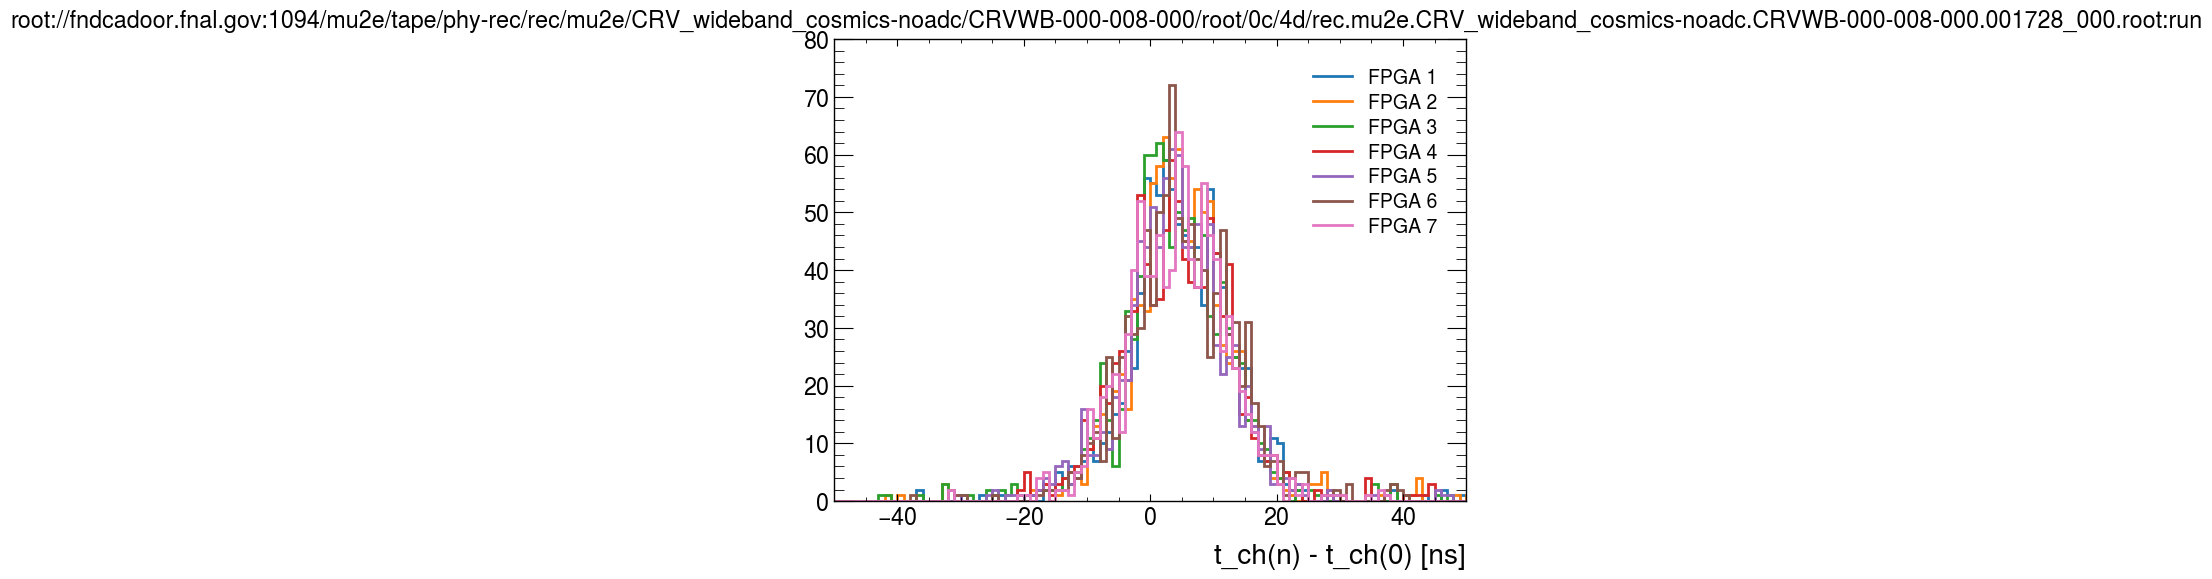

root://fndcadoor.fnal.gov:1094/mu2e/tape/phy-rec/rec/mu2e/CRV_wideband_cosmics-noadc/CRVWB-000-008-000/root/0a/3e/rec.mu2e.CRV_wideband_cosmics-noadc.CRVWB-000-008-000.001728_001.root:run


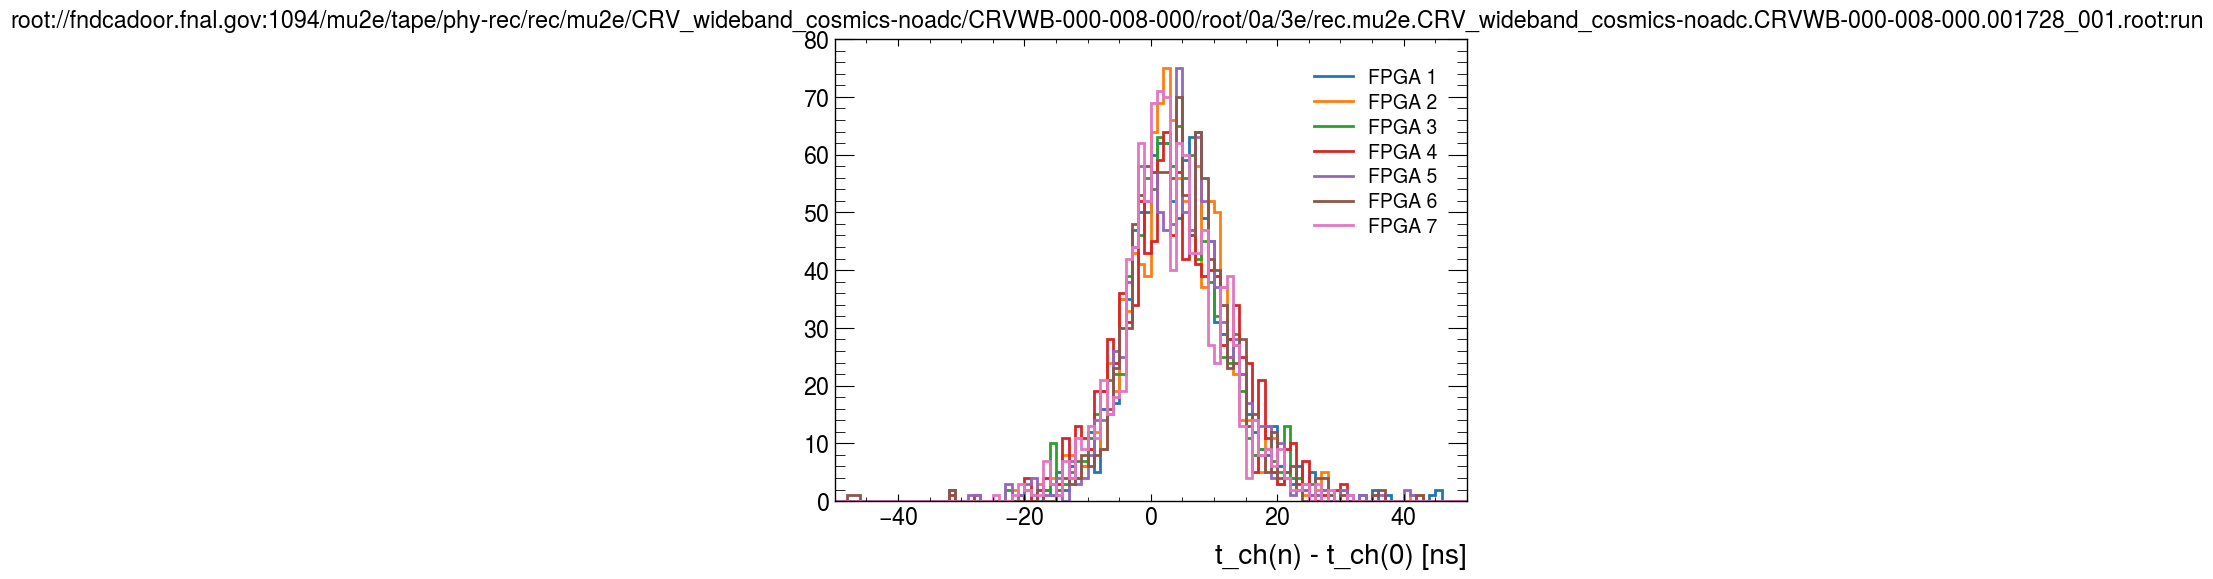

root://fndcadoor.fnal.gov:1094/mu2e/tape/phy-rec/rec/mu2e/CRV_wideband_cosmics-noadc/CRVWB-000-008-000/root/cd/c3/rec.mu2e.CRV_wideband_cosmics-noadc.CRVWB-000-008-000.001729_000.root:run


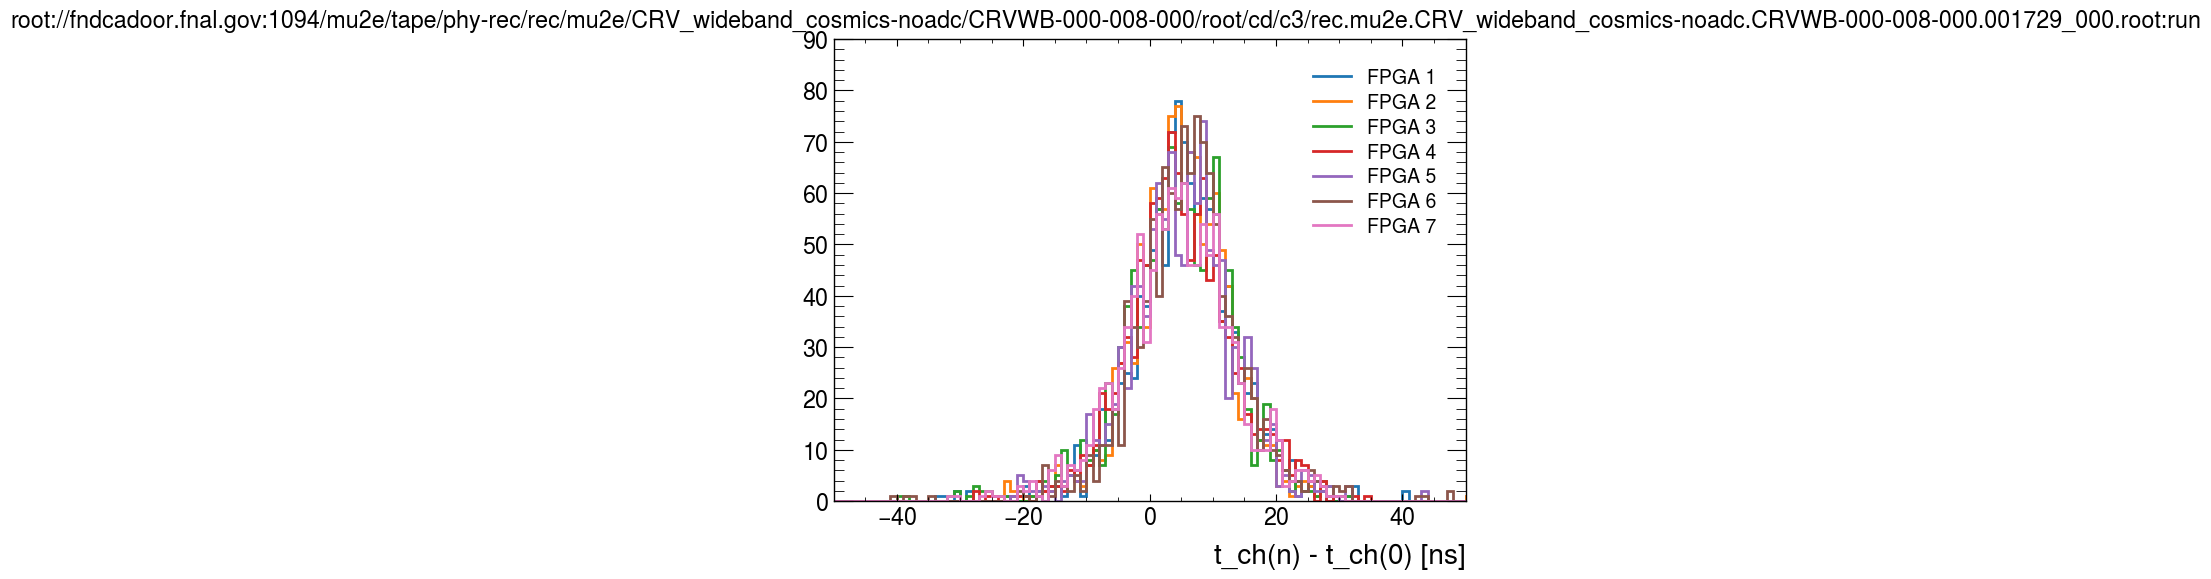

root://fndcadoor.fnal.gov:1094/mu2e/tape/phy-rec/rec/mu2e/CRV_wideband_cosmics-noadc/CRVWB-000-008-000/root/78/41/rec.mu2e.CRV_wideband_cosmics-noadc.CRVWB-000-008-000.001729_001.root:run


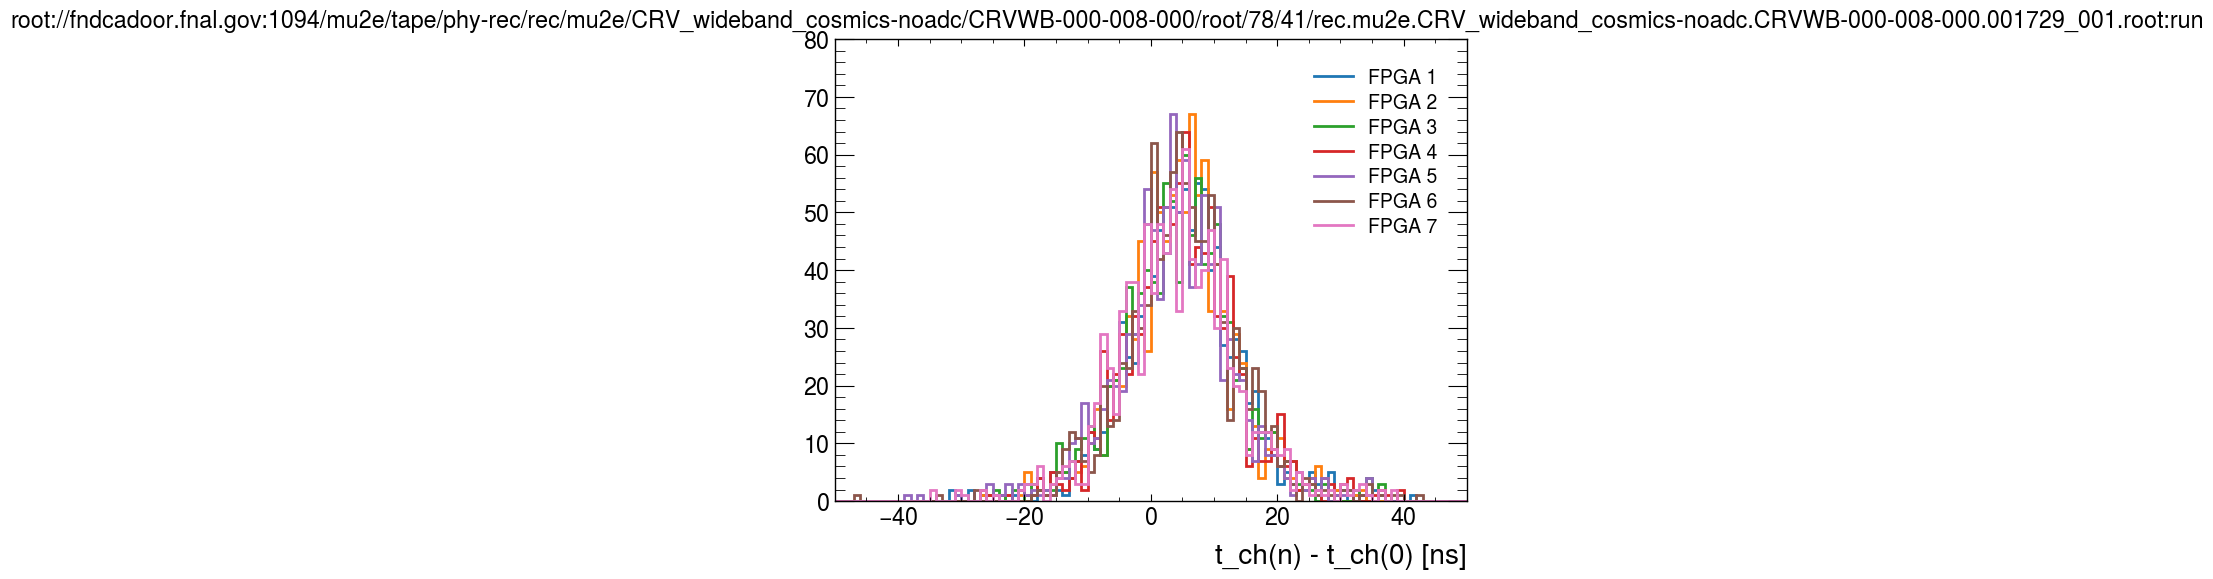

root://fndcadoor.fnal.gov:1094/mu2e/tape/phy-rec/rec/mu2e/CRV_wideband_cosmics-noadc/CRVWB-000-008-000/root/51/17/rec.mu2e.CRV_wideband_cosmics-noadc.CRVWB-000-008-000.001729_002.root:run


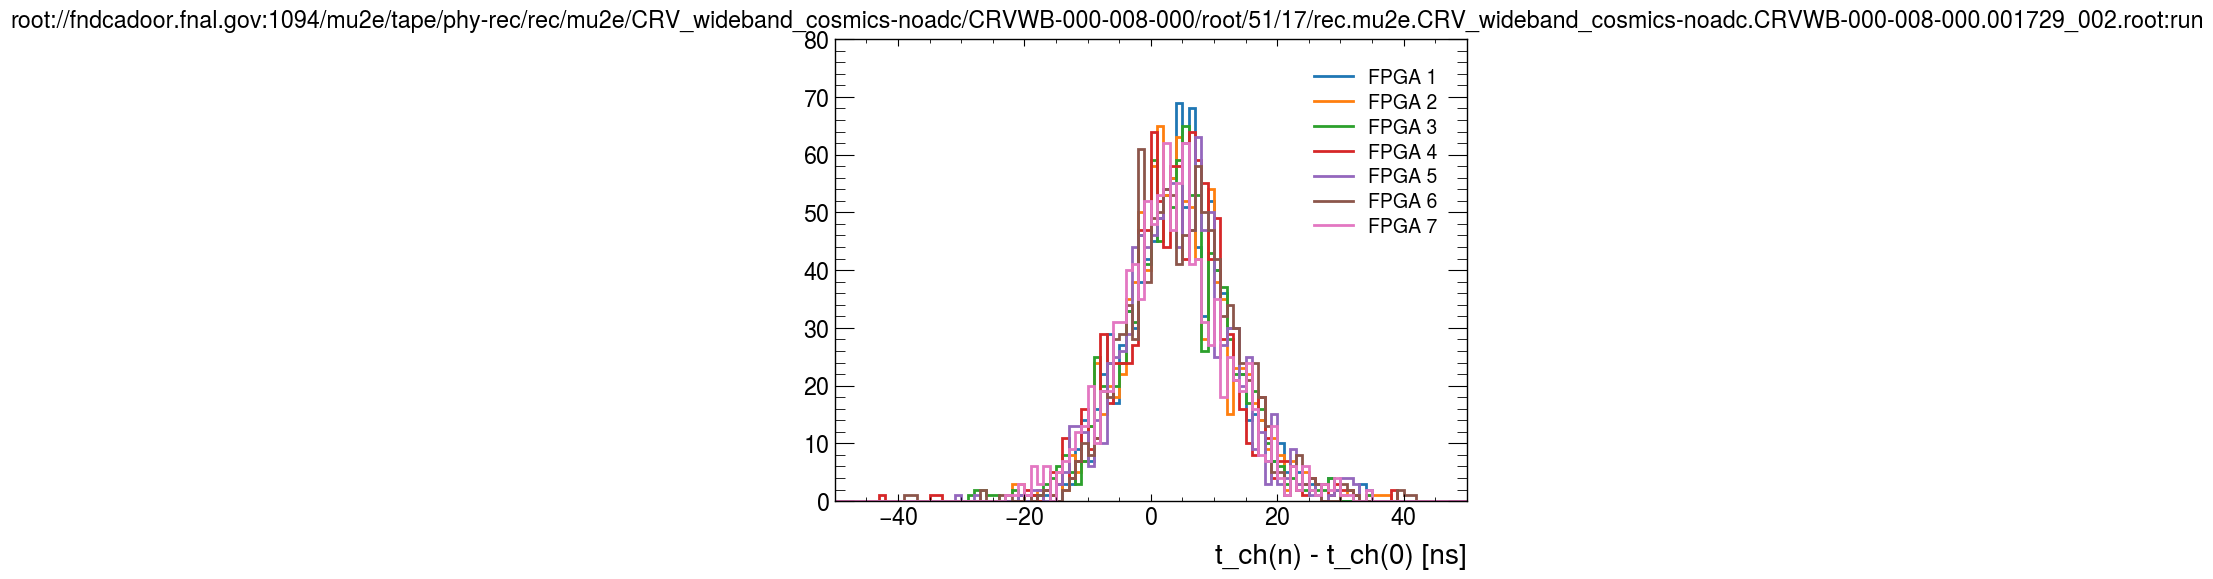

root://fndcadoor.fnal.gov:1094/mu2e/tape/phy-rec/rec/mu2e/CRV_wideband_cosmics-noadc/CRVWB-000-008-000/root/f0/54/rec.mu2e.CRV_wideband_cosmics-noadc.CRVWB-000-008-000.001729_003.root:run


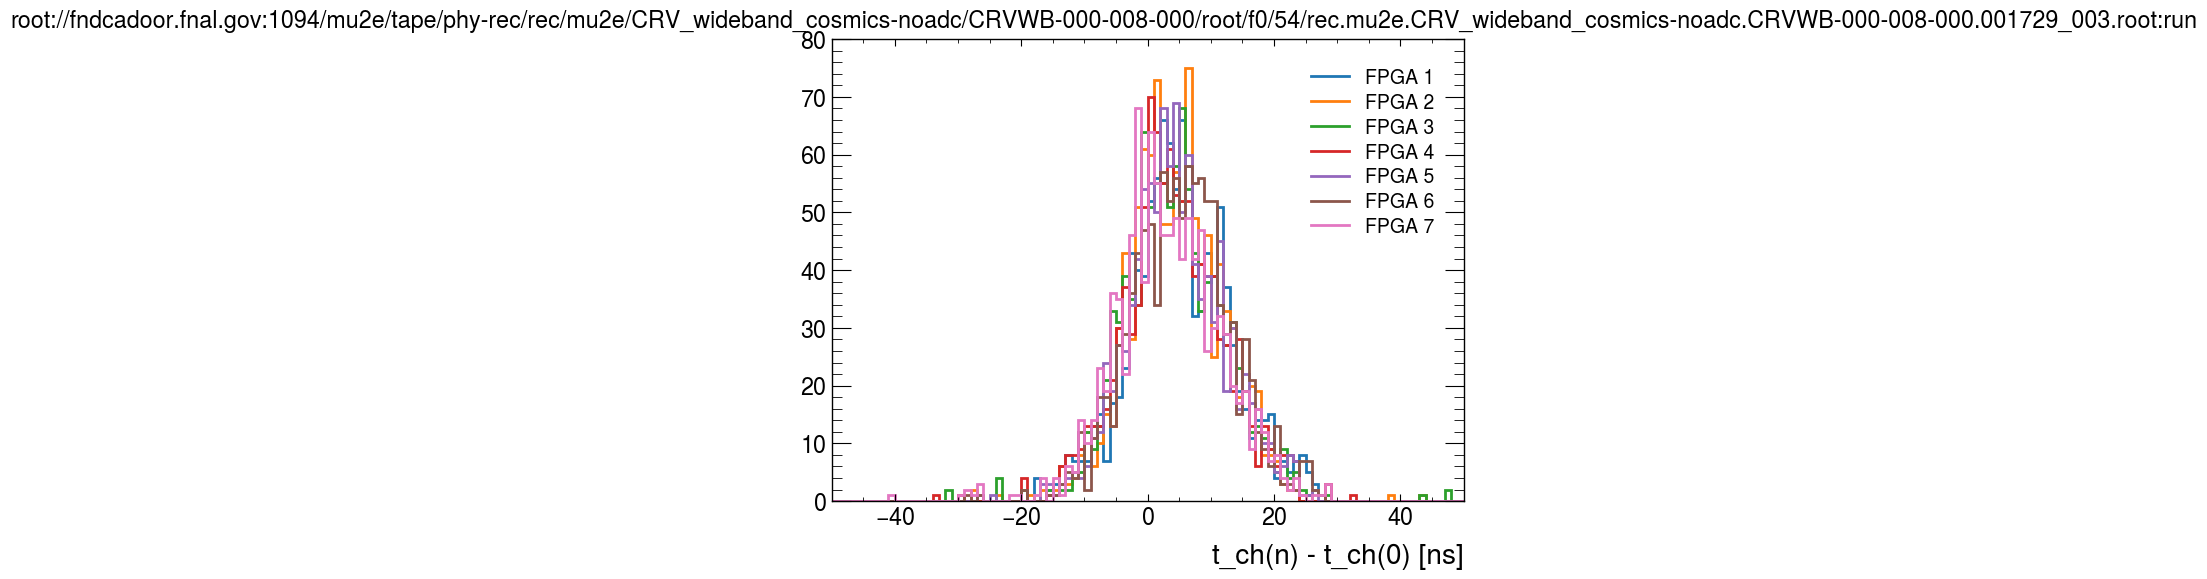

root://fndcadoor.fnal.gov:1094/mu2e/tape/phy-rec/rec/mu2e/CRV_wideband_cosmics-noadc/CRVWB-000-008-000/root/ba/1a/rec.mu2e.CRV_wideband_cosmics-noadc.CRVWB-000-008-000.001730_000.root:run


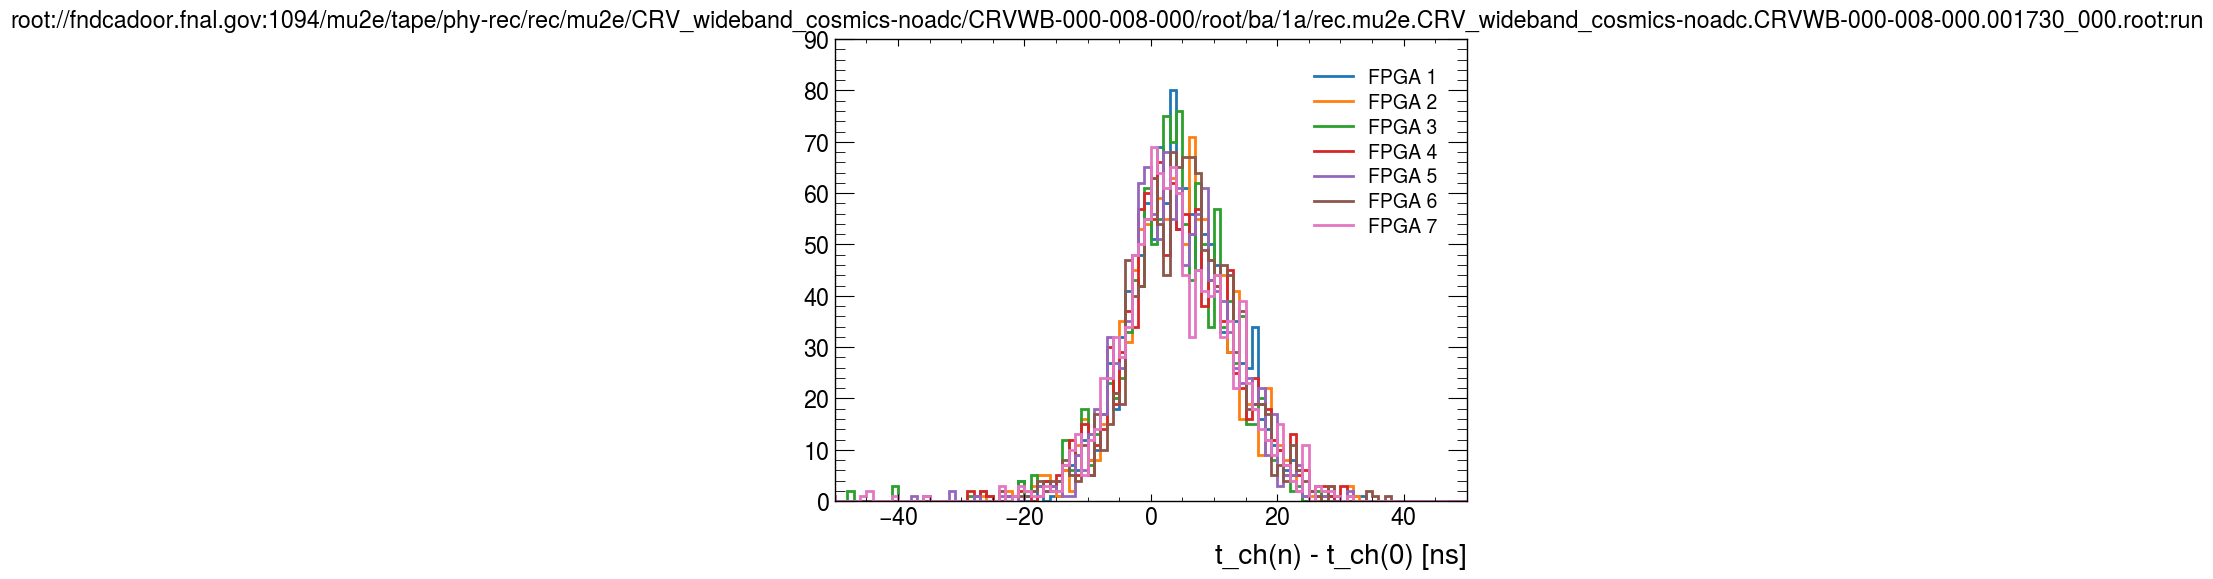

root://fndcadoor.fnal.gov:1094/mu2e/tape/phy-rec/rec/mu2e/CRV_wideband_cosmics-noadc/CRVWB-000-008-000/root/4c/50/rec.mu2e.CRV_wideband_cosmics-noadc.CRVWB-000-008-000.001730_001.root:run


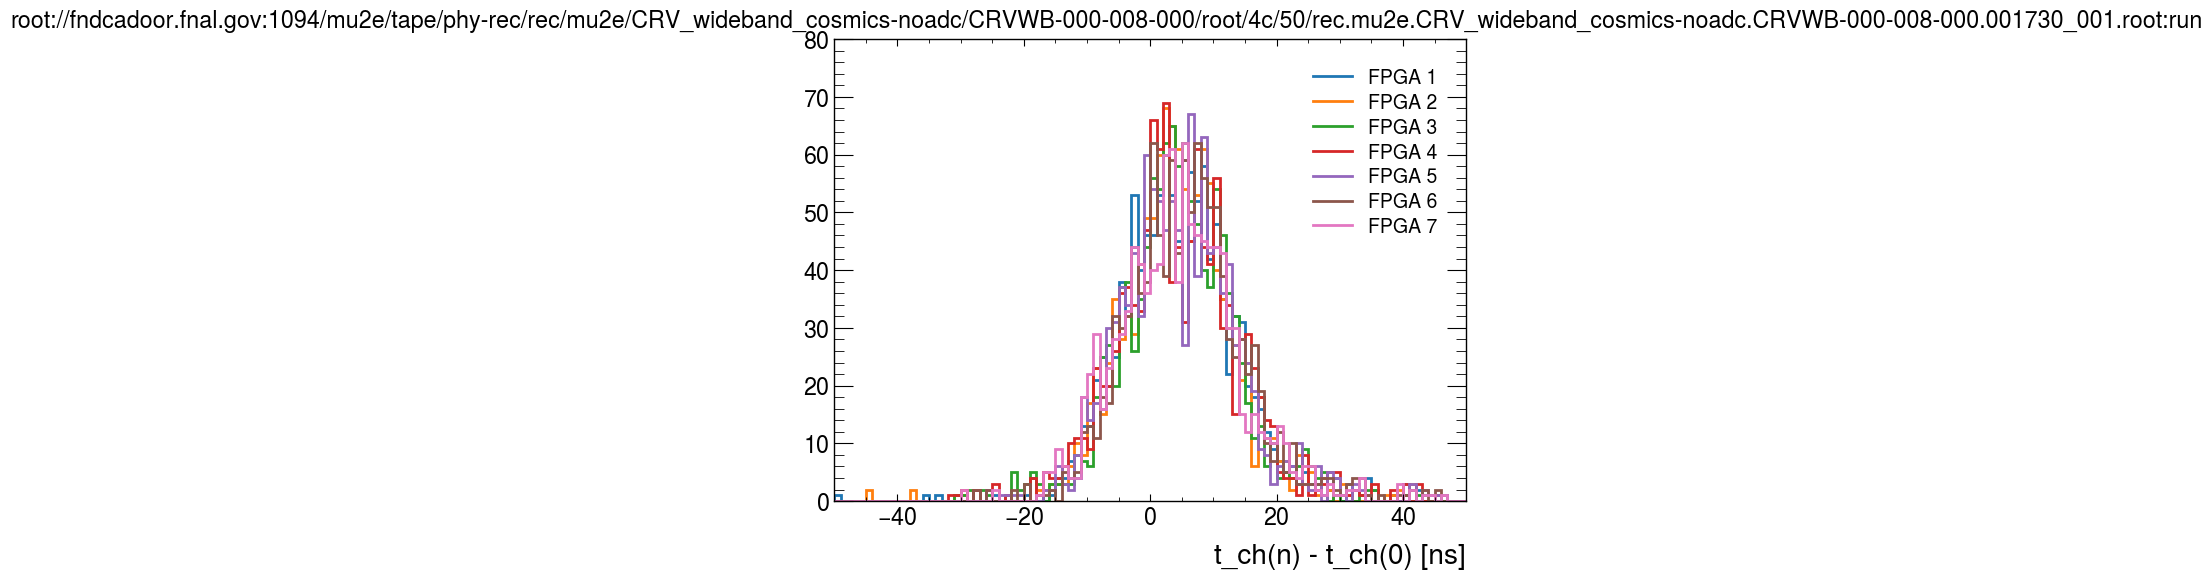

root://fndcadoor.fnal.gov:1094/mu2e/tape/phy-rec/rec/mu2e/CRV_wideband_cosmics-noadc/CRVWB-000-008-000/root/eb/ae/rec.mu2e.CRV_wideband_cosmics-noadc.CRVWB-000-008-000.001731_000.root:run


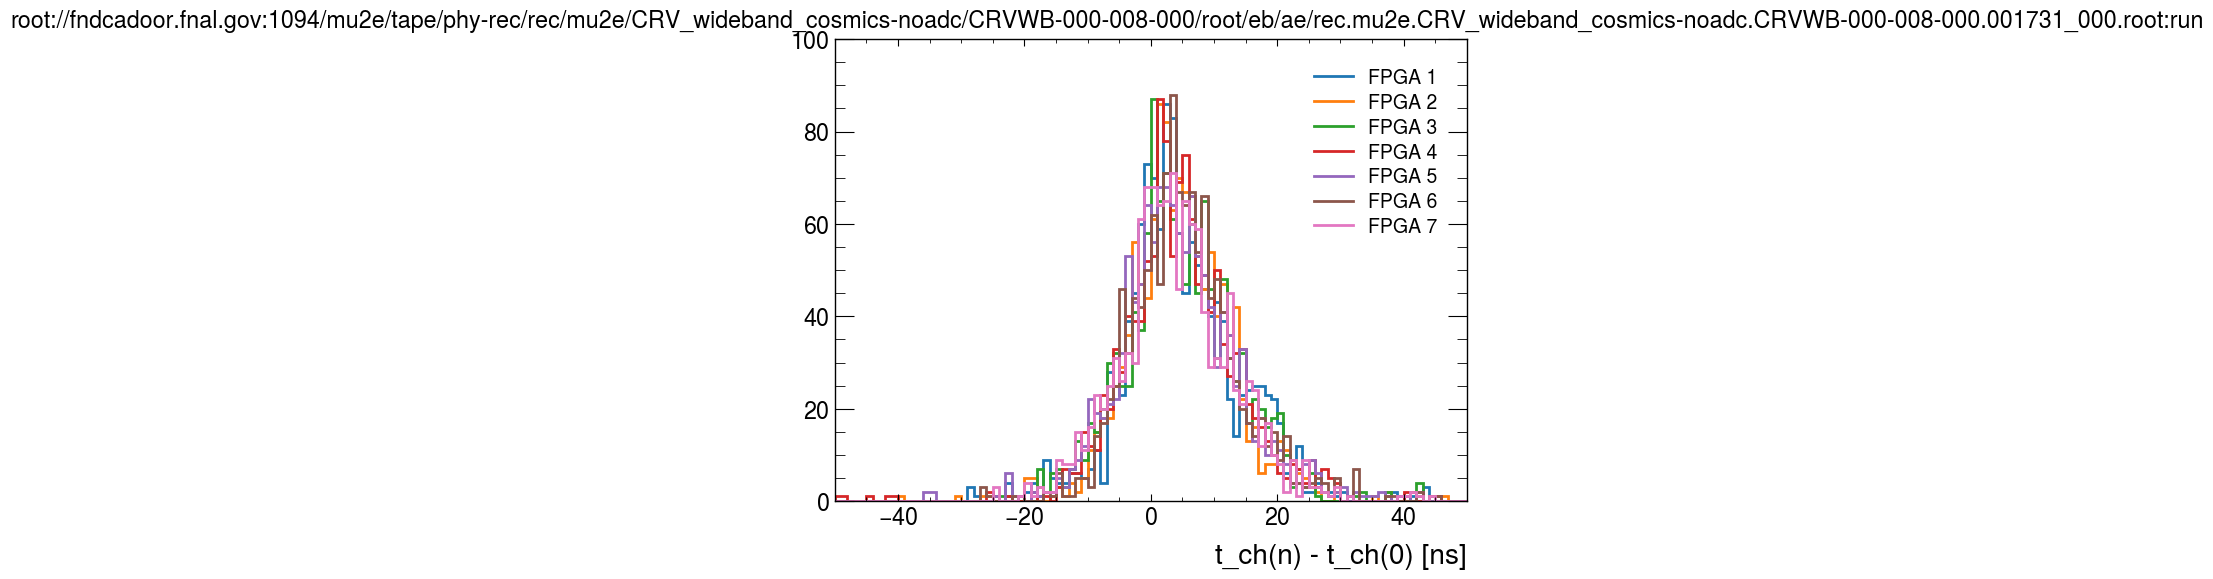

root://fndcadoor.fnal.gov:1094/mu2e/tape/phy-rec/rec/mu2e/CRV_wideband_cosmics-noadc/CRVWB-000-008-000/root/ae/66/rec.mu2e.CRV_wideband_cosmics-noadc.CRVWB-000-008-000.001731_001.root:run


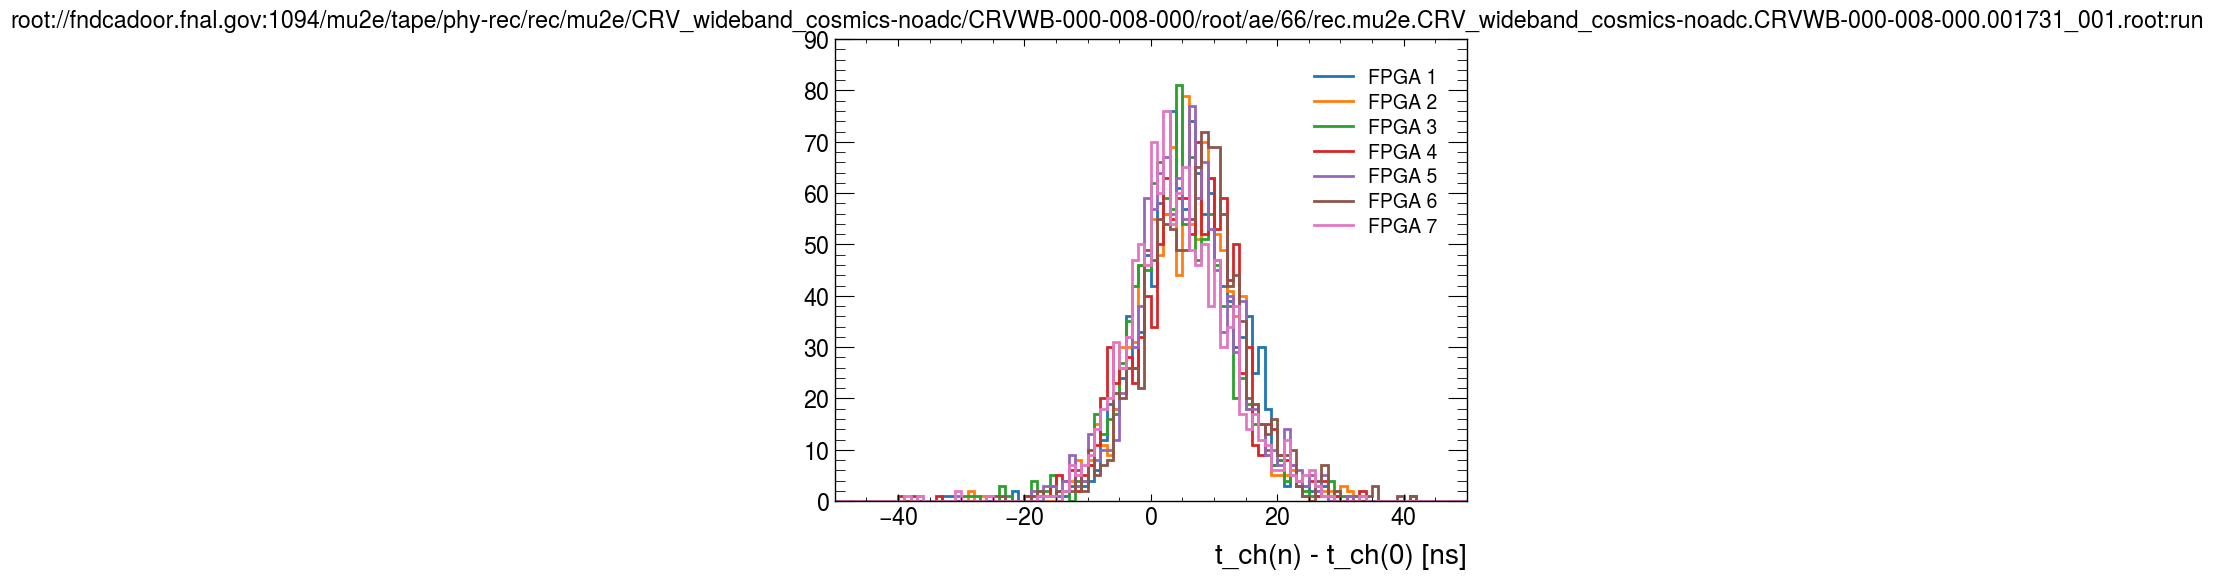

root://fndcadoor.fnal.gov:1094/mu2e/tape/phy-rec/rec/mu2e/CRV_wideband_cosmics-noadc/CRVWB-000-008-000/root/be/35/rec.mu2e.CRV_wideband_cosmics-noadc.CRVWB-000-008-000.001731_002.root:run


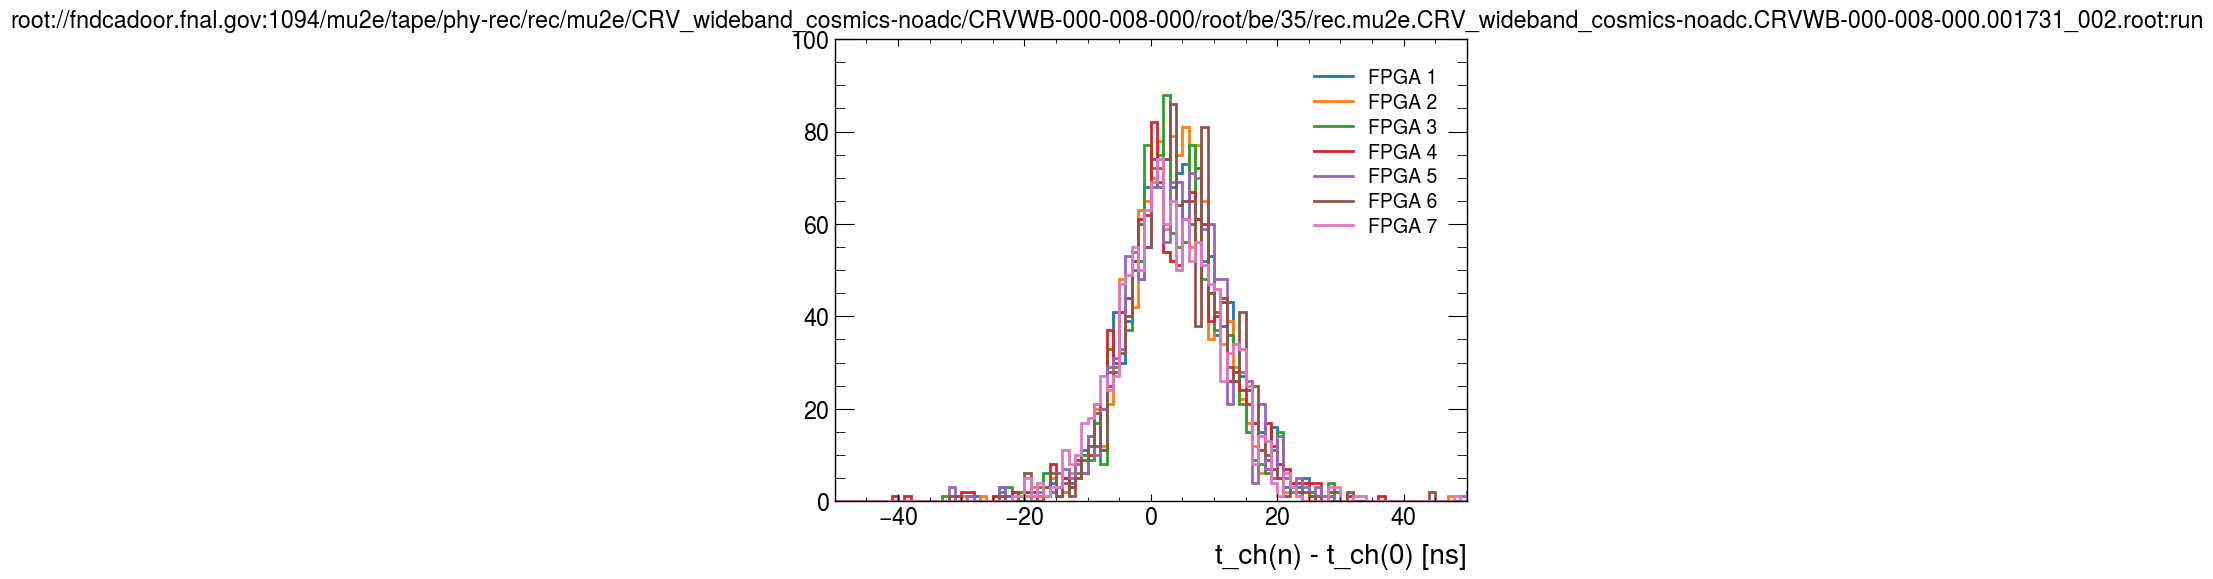

root://fndcadoor.fnal.gov:1094/mu2e/tape/phy-rec/rec/mu2e/CRV_wideband_cosmics-noadc/CRVWB-000-008-000/root/7f/9b/rec.mu2e.CRV_wideband_cosmics-noadc.CRVWB-000-008-000.001731_003.root:run


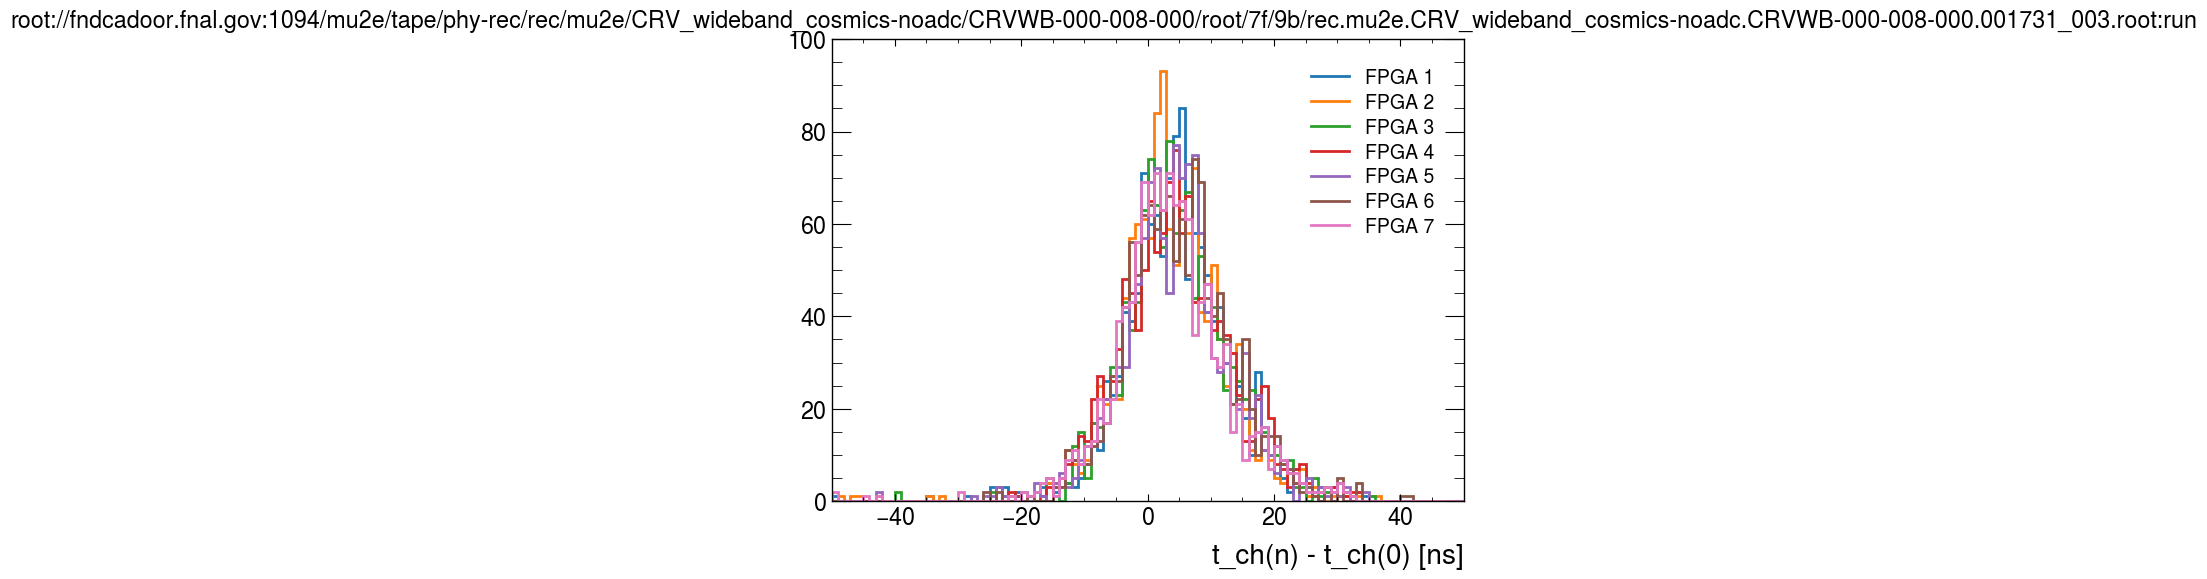

root://fndcadoor.fnal.gov:1094/mu2e/tape/phy-rec/rec/mu2e/CRV_wideband_cosmics-noadc/CRVWB-000-008-000/root/02/6b/rec.mu2e.CRV_wideband_cosmics-noadc.CRVWB-000-008-000.001731_004.root:run


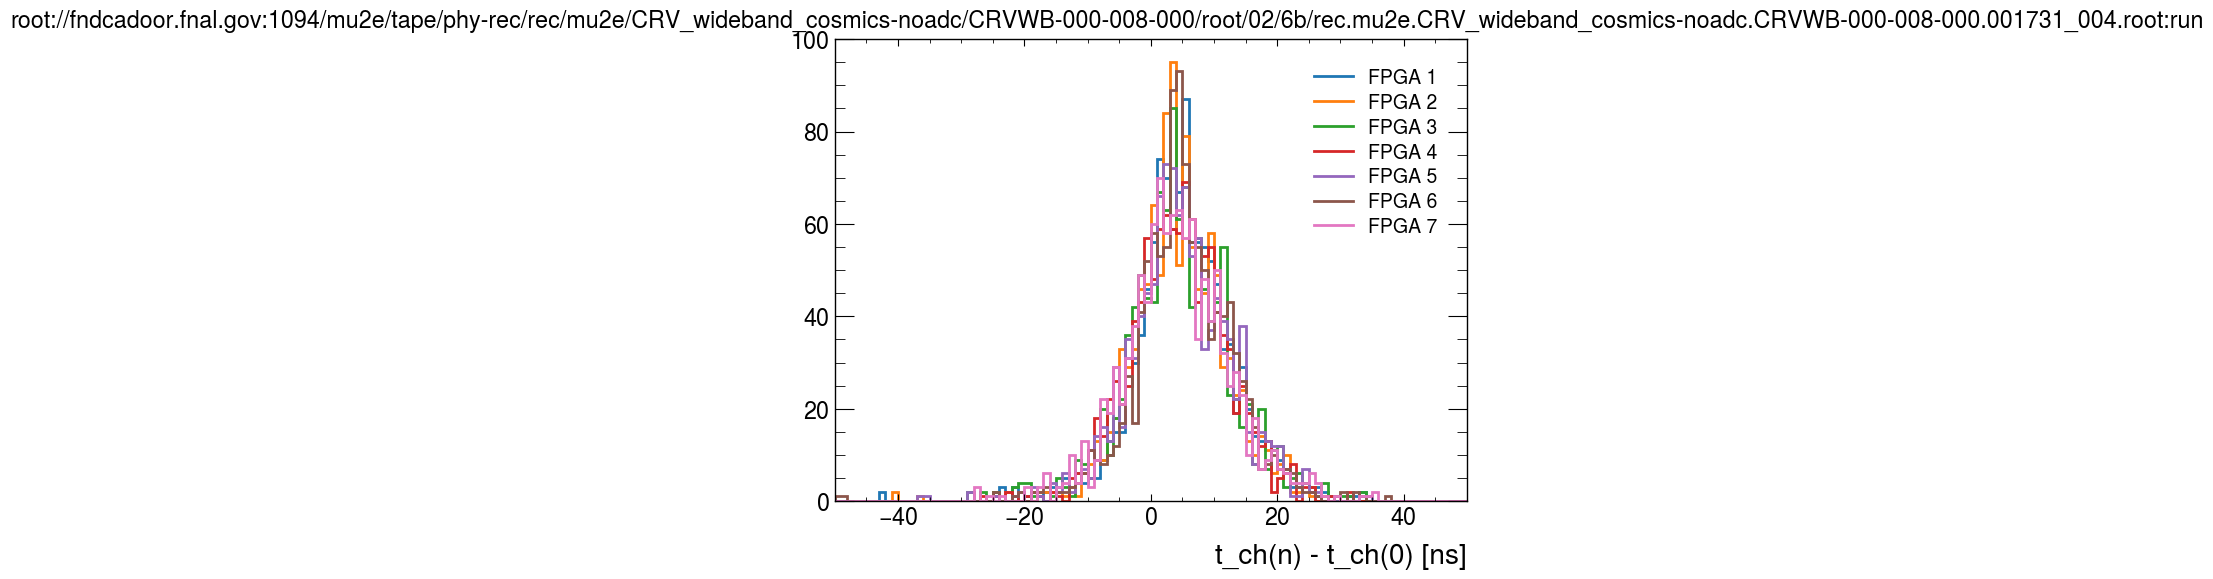

In [82]:
#runs = [2070, 2071, 2072, 2073, 2074, 2075]
runs = [1720, 1721, 1722, 1723, 1724, 1725, 1726, 1727, 1728, 1729, 1730, 1731]
processor = wideband.DataProcessor(treename='run', runlist=runs, userunlist=True, remove=False,fixtimes=True)
filelist = processor.getFilelist(DATASET, root_schema=True)
filelist = ["{}{}".format(i, ":run") for i in filelist]

varlist = ['PEs','time','fitStatus',#'LEtime',
           'subrunNumber','spillNumber','eventNumber']

for idx, filename in enumerate(filelist):
    d_ch0 = {}
    for chan in range(64):
        d_ch0['hist_{0}'.format(chan)] = Hist(hist.axis.Regular(bins=200, start=-100, stop=100, name="time"))
    print(filename)
    with uproot.open(filename) as file:
        for ar in file.iterate(step_size="10MB", 
                               filter_name=varlist, 
                               report=False, library='ak'):
            ar['PEs'] = ak.where(ar['PEs'] >= 20, ar['PEs'], 0) # much more strict cut
            ar['hits'] = ak.where(ar['PEs'] > 0, 1, 0)
            ar = ar[(ak.sum(ar['hits'][:,0,0:64], axis=-1) > 50) & (ak.sum(ar['hits'][:,4,0:64], axis=-1) > 50)]

            if len(ar['eventNumber']) > 0:
                for i in range(len(ar['eventNumber'])):
                    for chan in range(64):
                        if chan == 0:
                            continue
                        if ar['PEs'][i,0,chan] > 0 and ar['PEs'][i,0,0] > 0:
                            if ar['fitStatus'][i,0,chan] == 1 and ar['fitStatus'][i,0,0] == 1:
                                timediff = np.subtract(ar['time'][i,0,0], ar['time'][i,0,chan])
                                d_ch0['hist_{0}'.format(chan)].fill(timediff)
            else:
                continue

    for FPGA in range(8):
        if FPGA == 0:
            continue
        d_ch0['hFPGA_{0}'.format(FPGA)] = d_ch0['hist_{0}'.format(8*FPGA)] + d_ch0['hist_{0}'.format(8*FPGA+1)] + d_ch0['hist_{0}'.format(8*FPGA+2)]\
                                        + d_ch0['hist_{0}'.format(8*FPGA+3)] + d_ch0['hist_{0}'.format(8*FPGA+4)] + d_ch0['hist_{0}'.format(8*FPGA+5)]\
                                        + d_ch0['hist_{0}'.format(8*FPGA+6)] + d_ch0['hist_{0}'.format(8*FPGA+6)]

    fig, ax = plt.subplots()
    for FPGA in range(8):
        if FPGA == 0:
            continue
        d_ch0['hFPGA_{0}'.format(FPGA)].plot1d(linewidth=2.0, ax=ax, label='FPGA {0}'.format(FPGA))
    
    fig.suptitle(filename)
    ax.legend()
    ax.set_xlabel('t_ch(n) - t_ch(0) [ns]')
    ax.set_xlim(-50, 50)
    plt.show()